In [1]:
# importing the libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from itertools import chain
import seaborn as sns
from datetime import datetime

# for reading and displaying images
# from skimage.io import imread
import matplotlib.pyplot as plt
import nibabel as nib
# from nilearn.image import resample_img
# from nilearn.image import new_img_like, load_img, clean_img, crop_img
# from nilearn.input_data import NiftiMasker
from scipy.stats import zscore
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split
# for evaluating the model
from sklearn.metrics import accuracy_score

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import *
import torch.optim as optim
import h5py
# from torchsummary import summary
from tensorboardX import SummaryWriter

from IPython import display
%matplotlib inline

In [2]:
from src.dataloader import *

train_dset = MyDataset(task_type='age')
test_dset = MyDataset(task_type='age', test=True)

train_loader = DataLoader(train_dset, batch_size=8)
test_loader = DataLoader(test_dset, batch_size=8)

In [3]:
model = 'inception'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Model {model.capitalize()} is selected.')


if model == 'resnet':
    from src.architectures.resnet import *

    opt = Option()
    model = generate_model(model_depth=opt.model_depth,
                                n_classes=opt.n_classes,
                                n_input_channels=opt.n_input_channels,
                                shortcut_type=opt.shortcut_type,
                                conv1_t_size=opt.conv1_t_size,
                                conv1_t_stride=opt.conv1_t_stride,
                                no_max_pool=opt.no_max_pool,
                                widen_factor=opt.resnet_widen_factor)
    
    
elif model == 'levakov':
    
    from src.architectures.levakov_96 import *
    model = Levakov(task_type='age')
    
    
elif model == 'inception':
    
    from src.architectures.inception import *
    model = Inception3()
else: pass
model.to(device)

Model Inception is selected.


Inception3(
  (Conv3d_1a_3x3x3): BasicConv3d(
    (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), bias=False)
    (bn): BatchNorm3d(8, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv3d_2a_3x3x3): BasicConv3d(
    (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv3d_2b_3x3x3): BasicConv3d(
    (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool3d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv3d_3b_1x1x1): BasicConv3d(
    (conv): Conv3d(16, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv3d_4a_3x3x3): BasicConv3d(
    (conv): Conv3d

In [4]:
task_type = 'age'
resize = True
scheduler = False
epochs = range(100)
folds = range(10)

In [5]:
# summary = SummaryWriter(f'./tensorboard/{datetime.now().strftime("%Y-%m-%d_%H%M")}')

In [6]:
from src.losses import RMSELoss

LOSS = {
    'RMSE': RMSELoss(),
    'MSE': nn.MSELoss(),
}

# loss_fn = nn.MSELoss()
loss = 'RMSE'

loss_fn = LOSS[loss]
optimizer = optim.Adam(model.parameters(), lr=1e-4)

FOLD 0
EPOCHS 0
RMSE :: [TRAIN] 47.020 | [VALID] 32.201
CORR :: [TRAIN] 0.123 | [VALID] 0.631


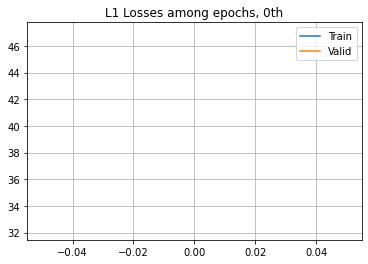

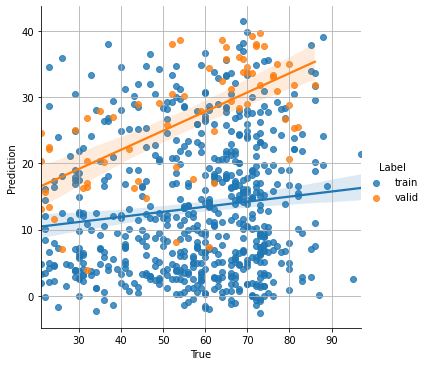

FOLD 0
EPOCHS 1
RMSE :: [TRAIN] 18.633 | [VALID] 13.080
CORR :: [TRAIN] 0.400 | [VALID] 0.779
FOLD 0
EPOCHS 2
RMSE :: [TRAIN] 13.255 | [VALID] 18.545
CORR :: [TRAIN] 0.600 | [VALID] 0.775
FOLD 0
EPOCHS 3
RMSE :: [TRAIN] 12.205 | [VALID] 16.669
CORR :: [TRAIN] 0.671 | [VALID] 0.807
FOLD 0
EPOCHS 4
RMSE :: [TRAIN] 11.052 | [VALID] 15.598
CORR :: [TRAIN] 0.736 | [VALID] 0.808
FOLD 0
EPOCHS 5
RMSE :: [TRAIN] 10.293 | [VALID] 13.420
CORR :: [TRAIN] 0.771 | [VALID] 0.859
FOLD 0
EPOCHS 6
RMSE :: [TRAIN] 9.758 | [VALID] 11.041
CORR :: [TRAIN] 0.797 | [VALID] 0.824
FOLD 0
EPOCHS 7
RMSE :: [TRAIN] 9.250 | [VALID] 11.368
CORR :: [TRAIN] 0.825 | [VALID] 0.832
FOLD 0
EPOCHS 8
RMSE :: [TRAIN] 9.206 | [VALID] 16.147
CORR :: [TRAIN] 0.833 | [VALID] 0.834
FOLD 0
EPOCHS 9
RMSE :: [TRAIN] 9.040 | [VALID] 10.289
CORR :: [TRAIN] 0.832 | [VALID] 0.848
FOLD 0
EPOCHS 10
RMSE :: [TRAIN] 8.304 | [VALID] 12.969
CORR :: [TRAIN] 0.862 | [VALID] 0.823


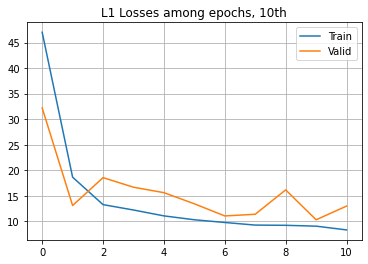

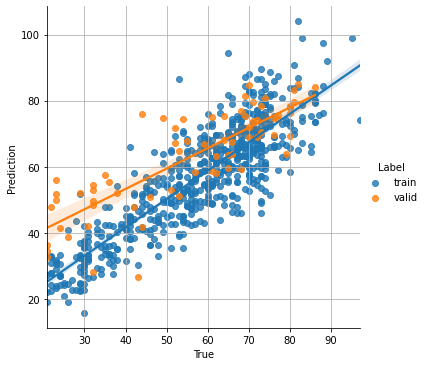

FOLD 0
EPOCHS 11
RMSE :: [TRAIN] 8.007 | [VALID] 16.855
CORR :: [TRAIN] 0.869 | [VALID] 0.806
FOLD 0
EPOCHS 12
RMSE :: [TRAIN] 8.411 | [VALID] 11.746
CORR :: [TRAIN] 0.859 | [VALID] 0.844
FOLD 0
EPOCHS 13
RMSE :: [TRAIN] 7.824 | [VALID] 10.423
CORR :: [TRAIN] 0.879 | [VALID] 0.856
FOLD 0
EPOCHS 14
RMSE :: [TRAIN] 7.740 | [VALID] 10.321
CORR :: [TRAIN] 0.881 | [VALID] 0.865
FOLD 0
EPOCHS 15
RMSE :: [TRAIN] 7.669 | [VALID] 10.057
CORR :: [TRAIN] 0.883 | [VALID] 0.870
FOLD 0
EPOCHS 16
RMSE :: [TRAIN] 7.366 | [VALID] 10.099
CORR :: [TRAIN] 0.893 | [VALID] 0.855
FOLD 0
EPOCHS 17
RMSE :: [TRAIN] 7.138 | [VALID] 10.504
CORR :: [TRAIN] 0.898 | [VALID] 0.860
FOLD 0
EPOCHS 18
RMSE :: [TRAIN] 6.871 | [VALID] 10.564
CORR :: [TRAIN] 0.908 | [VALID] 0.859
FOLD 0
EPOCHS 19
RMSE :: [TRAIN] 7.143 | [VALID] 10.174
CORR :: [TRAIN] 0.897 | [VALID] 0.866
FOLD 0
EPOCHS 20
RMSE :: [TRAIN] 7.640 | [VALID] 9.997
CORR :: [TRAIN] 0.883 | [VALID] 0.858


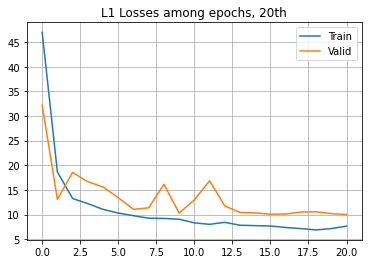

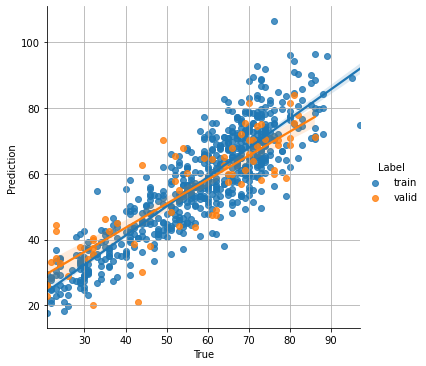

FOLD 0
EPOCHS 21
RMSE :: [TRAIN] 6.887 | [VALID] 10.648
CORR :: [TRAIN] 0.908 | [VALID] 0.867
FOLD 0
EPOCHS 22
RMSE :: [TRAIN] 7.067 | [VALID] 10.280
CORR :: [TRAIN] 0.899 | [VALID] 0.858
FOLD 0
EPOCHS 23
RMSE :: [TRAIN] 6.924 | [VALID] 10.128
CORR :: [TRAIN] 0.905 | [VALID] 0.861
FOLD 0
EPOCHS 24
RMSE :: [TRAIN] 6.700 | [VALID] 10.727
CORR :: [TRAIN] 0.913 | [VALID] 0.871
FOLD 0
EPOCHS 25
RMSE :: [TRAIN] 6.901 | [VALID] 10.402
CORR :: [TRAIN] 0.908 | [VALID] 0.870
FOLD 0
EPOCHS 26
RMSE :: [TRAIN] 6.566 | [VALID] 9.703
CORR :: [TRAIN] 0.916 | [VALID] 0.875
FOLD 0
EPOCHS 27
RMSE :: [TRAIN] 6.513 | [VALID] 11.185
CORR :: [TRAIN] 0.919 | [VALID] 0.863
FOLD 0
EPOCHS 28
RMSE :: [TRAIN] 6.792 | [VALID] 10.377
CORR :: [TRAIN] 0.909 | [VALID] 0.856
FOLD 0
EPOCHS 29
RMSE :: [TRAIN] 6.790 | [VALID] 9.564
CORR :: [TRAIN] 0.911 | [VALID] 0.877
FOLD 0
EPOCHS 30
RMSE :: [TRAIN] 6.702 | [VALID] 9.798
CORR :: [TRAIN] 0.911 | [VALID] 0.874


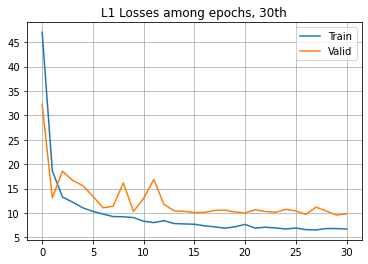

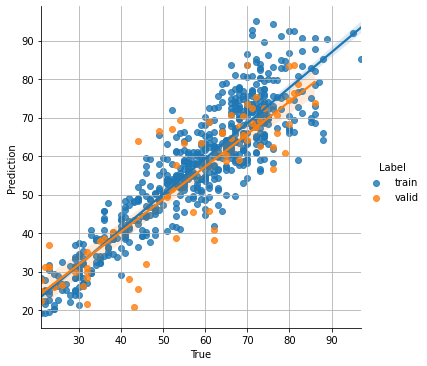

FOLD 0
EPOCHS 31
RMSE :: [TRAIN] 6.467 | [VALID] 9.543
CORR :: [TRAIN] 0.920 | [VALID] 0.874
FOLD 0
EPOCHS 32
RMSE :: [TRAIN] 6.153 | [VALID] 9.808
CORR :: [TRAIN] 0.925 | [VALID] 0.869
FOLD 0
EPOCHS 33
RMSE :: [TRAIN] 6.345 | [VALID] 12.325
CORR :: [TRAIN] 0.923 | [VALID] 0.879
FOLD 0
EPOCHS 34
RMSE :: [TRAIN] 6.224 | [VALID] 9.276
CORR :: [TRAIN] 0.924 | [VALID] 0.879
FOLD 0
EPOCHS 35
RMSE :: [TRAIN] 6.197 | [VALID] 9.642
CORR :: [TRAIN] 0.927 | [VALID] 0.869
FOLD 0
EPOCHS 36
RMSE :: [TRAIN] 6.275 | [VALID] 10.624
CORR :: [TRAIN] 0.925 | [VALID] 0.835
FOLD 0
EPOCHS 37
RMSE :: [TRAIN] 6.210 | [VALID] 12.831
CORR :: [TRAIN] 0.924 | [VALID] 0.859
FOLD 0
EPOCHS 38
RMSE :: [TRAIN] 6.432 | [VALID] 10.980
CORR :: [TRAIN] 0.918 | [VALID] 0.845
FOLD 0
EPOCHS 39
RMSE :: [TRAIN] 6.196 | [VALID] 9.509
CORR :: [TRAIN] 0.925 | [VALID] 0.880
FOLD 0
EPOCHS 40
RMSE :: [TRAIN] 6.093 | [VALID] 10.094
CORR :: [TRAIN] 0.929 | [VALID] 0.868


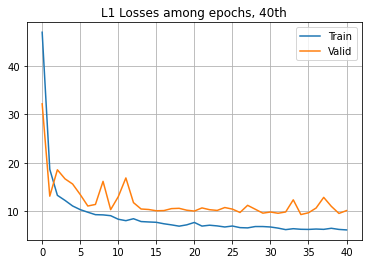

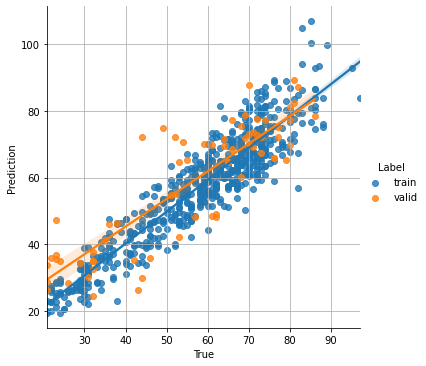

FOLD 0
EPOCHS 41
RMSE :: [TRAIN] 6.596 | [VALID] 9.885
CORR :: [TRAIN] 0.915 | [VALID] 0.870
FOLD 0
EPOCHS 42
RMSE :: [TRAIN] 6.089 | [VALID] 10.291
CORR :: [TRAIN] 0.928 | [VALID] 0.865
FOLD 0
EPOCHS 43
RMSE :: [TRAIN] 6.142 | [VALID] 9.667
CORR :: [TRAIN] 0.926 | [VALID] 0.872
FOLD 0
EPOCHS 44
RMSE :: [TRAIN] 6.008 | [VALID] 9.983
CORR :: [TRAIN] 0.929 | [VALID] 0.858
FOLD 0
EPOCHS 45
RMSE :: [TRAIN] 5.856 | [VALID] 10.227
CORR :: [TRAIN] 0.933 | [VALID] 0.863
FOLD 0
EPOCHS 46
RMSE :: [TRAIN] 6.230 | [VALID] 10.086
CORR :: [TRAIN] 0.926 | [VALID] 0.864
FOLD 0
EPOCHS 47
RMSE :: [TRAIN] 5.866 | [VALID] 9.717
CORR :: [TRAIN] 0.932 | [VALID] 0.869
FOLD 0
EPOCHS 48
RMSE :: [TRAIN] 6.139 | [VALID] 10.205
CORR :: [TRAIN] 0.927 | [VALID] 0.875
FOLD 0
EPOCHS 49
RMSE :: [TRAIN] 5.816 | [VALID] 9.489
CORR :: [TRAIN] 0.934 | [VALID] 0.880
FOLD 0
EPOCHS 50
RMSE :: [TRAIN] 6.198 | [VALID] 10.250
CORR :: [TRAIN] 0.926 | [VALID] 0.869


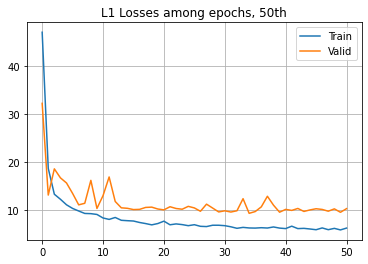

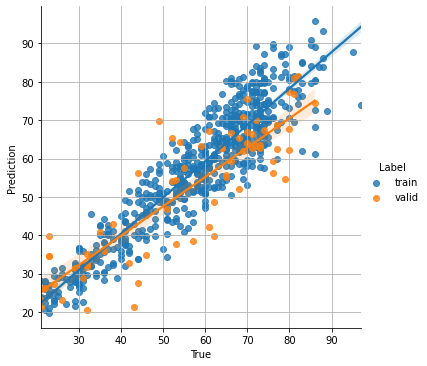

FOLD 0
EPOCHS 51
RMSE :: [TRAIN] 6.078 | [VALID] 9.452
CORR :: [TRAIN] 0.929 | [VALID] 0.884
FOLD 0
EPOCHS 52
RMSE :: [TRAIN] 5.885 | [VALID] 10.424
CORR :: [TRAIN] 0.932 | [VALID] 0.873
FOLD 0
EPOCHS 53
RMSE :: [TRAIN] 6.440 | [VALID] 9.910
CORR :: [TRAIN] 0.920 | [VALID] 0.865
FOLD 0
EPOCHS 54
RMSE :: [TRAIN] 5.680 | [VALID] 9.244
CORR :: [TRAIN] 0.937 | [VALID] 0.881
FOLD 0
EPOCHS 55
RMSE :: [TRAIN] 5.635 | [VALID] 10.015
CORR :: [TRAIN] 0.938 | [VALID] 0.877
FOLD 0
EPOCHS 56
RMSE :: [TRAIN] 5.932 | [VALID] 9.653
CORR :: [TRAIN] 0.933 | [VALID] 0.884
FOLD 0
EPOCHS 57
RMSE :: [TRAIN] 5.901 | [VALID] 9.341
CORR :: [TRAIN] 0.932 | [VALID] 0.884
FOLD 0
EPOCHS 58
RMSE :: [TRAIN] 6.249 | [VALID] 10.546
CORR :: [TRAIN] 0.926 | [VALID] 0.882
FOLD 0
EPOCHS 59
RMSE :: [TRAIN] 5.965 | [VALID] 10.109
CORR :: [TRAIN] 0.931 | [VALID] 0.882
FOLD 0
EPOCHS 60
RMSE :: [TRAIN] 5.559 | [VALID] 10.407
CORR :: [TRAIN] 0.939 | [VALID] 0.890


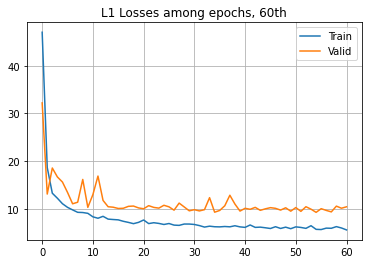

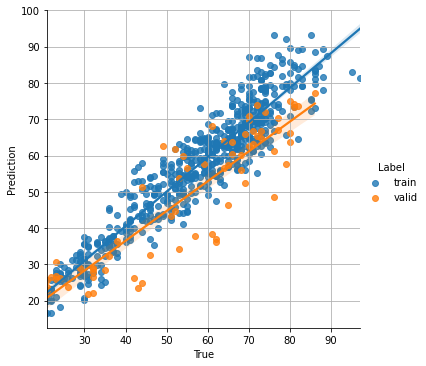

FOLD 0
EPOCHS 61
RMSE :: [TRAIN] 6.051 | [VALID] 10.004
CORR :: [TRAIN] 0.928 | [VALID] 0.885
FOLD 0
EPOCHS 62
RMSE :: [TRAIN] 5.820 | [VALID] 9.924
CORR :: [TRAIN] 0.934 | [VALID] 0.881
FOLD 0
EPOCHS 63
RMSE :: [TRAIN] 5.608 | [VALID] 11.183
CORR :: [TRAIN] 0.939 | [VALID] 0.874
FOLD 0
EPOCHS 64
RMSE :: [TRAIN] 5.870 | [VALID] 10.995
CORR :: [TRAIN] 0.933 | [VALID] 0.884
FOLD 0
EPOCHS 65
RMSE :: [TRAIN] 5.848 | [VALID] 10.942
CORR :: [TRAIN] 0.934 | [VALID] 0.881
FOLD 0
EPOCHS 66
RMSE :: [TRAIN] 6.303 | [VALID] 11.522
CORR :: [TRAIN] 0.922 | [VALID] 0.884
FOLD 0
EPOCHS 67
RMSE :: [TRAIN] 5.564 | [VALID] 12.234
CORR :: [TRAIN] 0.939 | [VALID] 0.876
FOLD 0
EPOCHS 68
RMSE :: [TRAIN] 5.926 | [VALID] 10.491
CORR :: [TRAIN] 0.933 | [VALID] 0.884
FOLD 0
EPOCHS 69
RMSE :: [TRAIN] 5.611 | [VALID] 11.085
CORR :: [TRAIN] 0.937 | [VALID] 0.886
FOLD 0
EPOCHS 70
RMSE :: [TRAIN] 5.550 | [VALID] 11.365
CORR :: [TRAIN] 0.940 | [VALID] 0.880


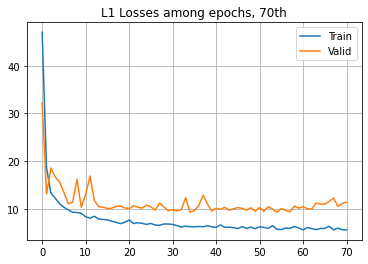

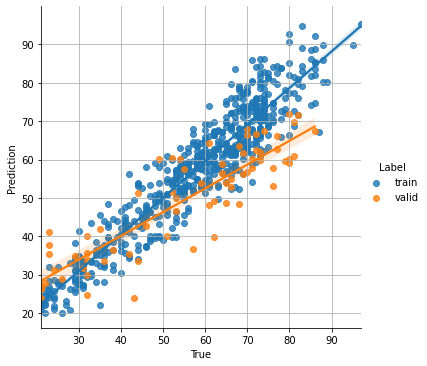

FOLD 0
EPOCHS 71
RMSE :: [TRAIN] 5.852 | [VALID] 10.127
CORR :: [TRAIN] 0.934 | [VALID] 0.872
FOLD 0
EPOCHS 72
RMSE :: [TRAIN] 5.763 | [VALID] 10.747
CORR :: [TRAIN] 0.934 | [VALID] 0.882
FOLD 0
EPOCHS 73
RMSE :: [TRAIN] 5.770 | [VALID] 9.511
CORR :: [TRAIN] 0.935 | [VALID] 0.881
FOLD 0
EPOCHS 74
RMSE :: [TRAIN] 5.750 | [VALID] 9.345
CORR :: [TRAIN] 0.935 | [VALID] 0.877
FOLD 0
EPOCHS 75
RMSE :: [TRAIN] 5.662 | [VALID] 10.346
CORR :: [TRAIN] 0.936 | [VALID] 0.870
FOLD 0
EPOCHS 76
RMSE :: [TRAIN] 5.987 | [VALID] 11.252
CORR :: [TRAIN] 0.930 | [VALID] 0.847
FOLD 0
EPOCHS 77
RMSE :: [TRAIN] 5.534 | [VALID] 9.819
CORR :: [TRAIN] 0.939 | [VALID] 0.867
FOLD 0
EPOCHS 78
RMSE :: [TRAIN] 5.632 | [VALID] 9.681
CORR :: [TRAIN] 0.938 | [VALID] 0.870
FOLD 0
EPOCHS 79
RMSE :: [TRAIN] 5.313 | [VALID] 9.902
CORR :: [TRAIN] 0.943 | [VALID] 0.865
FOLD 0
EPOCHS 80
RMSE :: [TRAIN] 5.414 | [VALID] 9.977
CORR :: [TRAIN] 0.942 | [VALID] 0.873


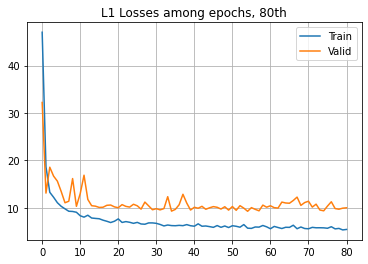

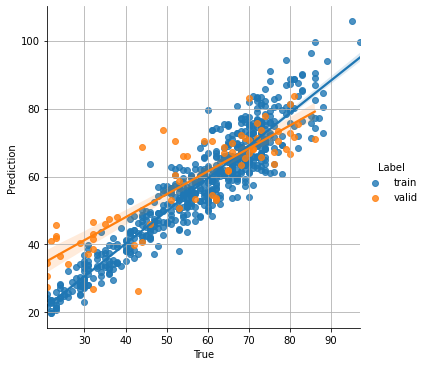

FOLD 0
EPOCHS 81
RMSE :: [TRAIN] 5.563 | [VALID] 9.586
CORR :: [TRAIN] 0.938 | [VALID] 0.870
FOLD 0
EPOCHS 82
RMSE :: [TRAIN] 6.138 | [VALID] 9.200
CORR :: [TRAIN] 0.924 | [VALID] 0.883
FOLD 0
EPOCHS 83
RMSE :: [TRAIN] 5.267 | [VALID] 9.101
CORR :: [TRAIN] 0.945 | [VALID] 0.884
FOLD 0
EPOCHS 84
RMSE :: [TRAIN] 5.701 | [VALID] 9.104
CORR :: [TRAIN] 0.936 | [VALID] 0.885
FOLD 0
EPOCHS 85
RMSE :: [TRAIN] 5.420 | [VALID] 9.392
CORR :: [TRAIN] 0.942 | [VALID] 0.880
FOLD 0
EPOCHS 86
RMSE :: [TRAIN] 5.637 | [VALID] 8.966
CORR :: [TRAIN] 0.937 | [VALID] 0.889
FOLD 0
EPOCHS 87
RMSE :: [TRAIN] 5.325 | [VALID] 9.474
CORR :: [TRAIN] 0.945 | [VALID] 0.881
FOLD 0
EPOCHS 88
RMSE :: [TRAIN] 5.152 | [VALID] 10.830
CORR :: [TRAIN] 0.949 | [VALID] 0.873
FOLD 0
EPOCHS 89
RMSE :: [TRAIN] 5.228 | [VALID] 9.399
CORR :: [TRAIN] 0.945 | [VALID] 0.879
FOLD 0
EPOCHS 90
RMSE :: [TRAIN] 5.092 | [VALID] 9.735
CORR :: [TRAIN] 0.949 | [VALID] 0.872


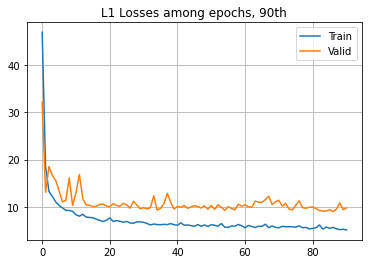

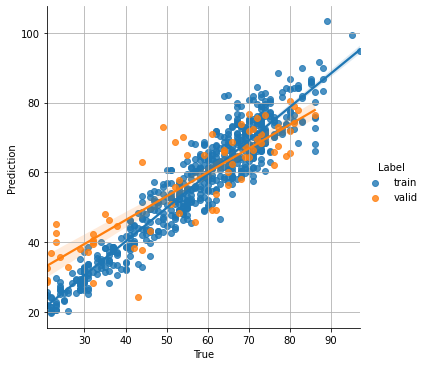

FOLD 0
EPOCHS 91
RMSE :: [TRAIN] 5.579 | [VALID] 9.989
CORR :: [TRAIN] 0.941 | [VALID] 0.880
FOLD 0
EPOCHS 92
RMSE :: [TRAIN] 5.183 | [VALID] 10.419
CORR :: [TRAIN] 0.946 | [VALID] 0.864
FOLD 0
EPOCHS 93
RMSE :: [TRAIN] 5.610 | [VALID] 10.476
CORR :: [TRAIN] 0.939 | [VALID] 0.874
FOLD 0
EPOCHS 94
RMSE :: [TRAIN] 5.285 | [VALID] 9.269
CORR :: [TRAIN] 0.945 | [VALID] 0.880
FOLD 0
EPOCHS 95
RMSE :: [TRAIN] 5.234 | [VALID] 10.058
CORR :: [TRAIN] 0.946 | [VALID] 0.866
FOLD 0
EPOCHS 96
RMSE :: [TRAIN] 5.340 | [VALID] 9.627
CORR :: [TRAIN] 0.944 | [VALID] 0.869
FOLD 0
EPOCHS 97
RMSE :: [TRAIN] 4.930 | [VALID] 9.662
CORR :: [TRAIN] 0.952 | [VALID] 0.872
FOLD 0
EPOCHS 98
RMSE :: [TRAIN] 4.923 | [VALID] 9.216
CORR :: [TRAIN] 0.952 | [VALID] 0.884
FOLD 0
EPOCHS 99
RMSE :: [TRAIN] 5.304 | [VALID] 9.379
CORR :: [TRAIN] 0.946 | [VALID] 0.878
FOLD 0
RMSE :: [TEST] 10.061
CORR :: [TEST] 0.768


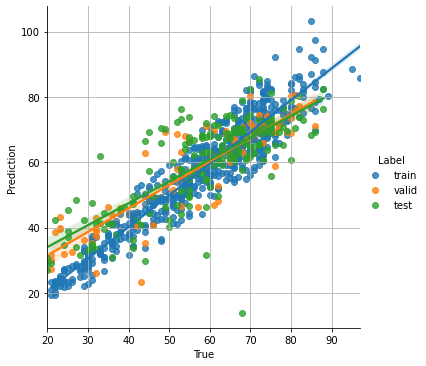

FOLD 1
EPOCHS 0
RMSE :: [TRAIN] 5.880 | [VALID] 5.805
CORR :: [TRAIN] 0.929 | [VALID] 0.977


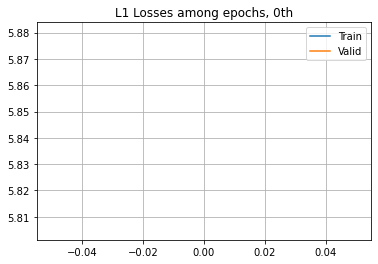

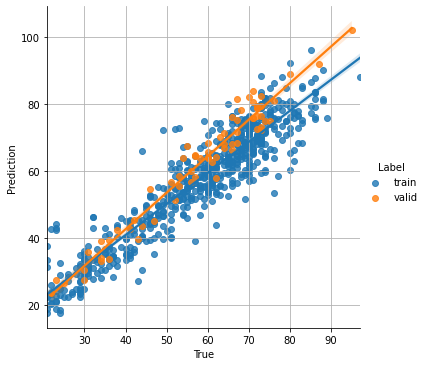

FOLD 1
EPOCHS 1
RMSE :: [TRAIN] 5.849 | [VALID] 3.514
CORR :: [TRAIN] 0.928 | [VALID] 0.975
FOLD 1
EPOCHS 2
RMSE :: [TRAIN] 5.724 | [VALID] 2.886
CORR :: [TRAIN] 0.936 | [VALID] 0.983
FOLD 1
EPOCHS 3
RMSE :: [TRAIN] 5.376 | [VALID] 3.532
CORR :: [TRAIN] 0.946 | [VALID] 0.975
FOLD 1
EPOCHS 4
RMSE :: [TRAIN] 5.470 | [VALID] 4.117
CORR :: [TRAIN] 0.943 | [VALID] 0.972
FOLD 1
EPOCHS 5
RMSE :: [TRAIN] 5.238 | [VALID] 3.805
CORR :: [TRAIN] 0.949 | [VALID] 0.974
FOLD 1
EPOCHS 6
RMSE :: [TRAIN] 5.419 | [VALID] 4.933
CORR :: [TRAIN] 0.943 | [VALID] 0.967
FOLD 1
EPOCHS 7
RMSE :: [TRAIN] 5.060 | [VALID] 4.029
CORR :: [TRAIN] 0.953 | [VALID] 0.970
FOLD 1
EPOCHS 8
RMSE :: [TRAIN] 5.216 | [VALID] 4.372
CORR :: [TRAIN] 0.949 | [VALID] 0.960
FOLD 1
EPOCHS 9
RMSE :: [TRAIN] 5.438 | [VALID] 3.382
CORR :: [TRAIN] 0.945 | [VALID] 0.977
FOLD 1
EPOCHS 10
RMSE :: [TRAIN] 5.182 | [VALID] 3.573
CORR :: [TRAIN] 0.949 | [VALID] 0.973


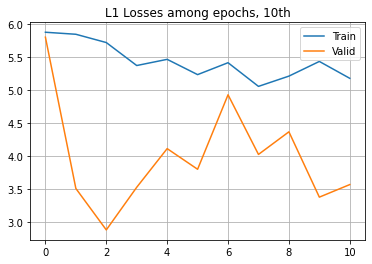

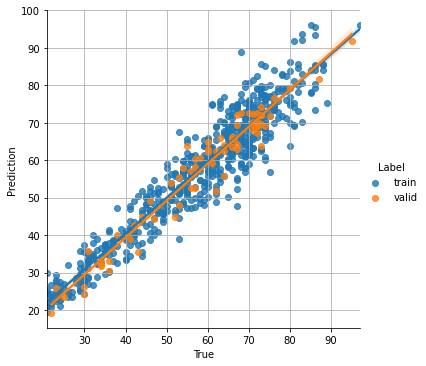

FOLD 1
EPOCHS 11
RMSE :: [TRAIN] 4.870 | [VALID] 3.663
CORR :: [TRAIN] 0.957 | [VALID] 0.974
FOLD 1
EPOCHS 12
RMSE :: [TRAIN] 5.270 | [VALID] 3.394
CORR :: [TRAIN] 0.949 | [VALID] 0.976
FOLD 1
EPOCHS 13
RMSE :: [TRAIN] 5.215 | [VALID] 4.198
CORR :: [TRAIN] 0.950 | [VALID] 0.963
FOLD 1
EPOCHS 14
RMSE :: [TRAIN] 5.085 | [VALID] 4.205
CORR :: [TRAIN] 0.952 | [VALID] 0.971
FOLD 1
EPOCHS 15
RMSE :: [TRAIN] 5.200 | [VALID] 6.078
CORR :: [TRAIN] 0.949 | [VALID] 0.953
FOLD 1
EPOCHS 16
RMSE :: [TRAIN] 5.104 | [VALID] 3.361
CORR :: [TRAIN] 0.952 | [VALID] 0.976
FOLD 1
EPOCHS 17
RMSE :: [TRAIN] 5.345 | [VALID] 4.883
CORR :: [TRAIN] 0.947 | [VALID] 0.955
FOLD 1
EPOCHS 18
RMSE :: [TRAIN] 4.989 | [VALID] 4.122
CORR :: [TRAIN] 0.953 | [VALID] 0.968
FOLD 1
EPOCHS 19
RMSE :: [TRAIN] 4.971 | [VALID] 3.982
CORR :: [TRAIN] 0.954 | [VALID] 0.971
FOLD 1
EPOCHS 20
RMSE :: [TRAIN] 4.997 | [VALID] 4.310
CORR :: [TRAIN] 0.954 | [VALID] 0.969


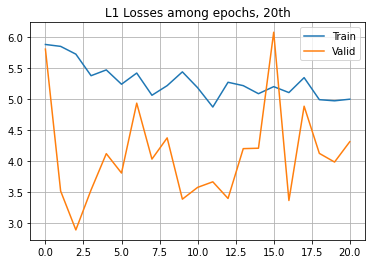

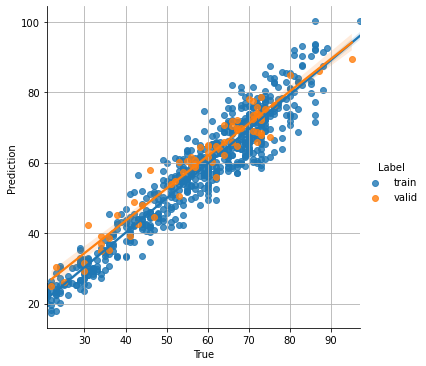

FOLD 1
EPOCHS 21
RMSE :: [TRAIN] 5.068 | [VALID] 3.744
CORR :: [TRAIN] 0.950 | [VALID] 0.972
FOLD 1
EPOCHS 22
RMSE :: [TRAIN] 4.904 | [VALID] 4.391
CORR :: [TRAIN] 0.956 | [VALID] 0.967
FOLD 1
EPOCHS 23
RMSE :: [TRAIN] 4.979 | [VALID] 4.313
CORR :: [TRAIN] 0.955 | [VALID] 0.962
FOLD 1
EPOCHS 24
RMSE :: [TRAIN] 5.128 | [VALID] 3.779
CORR :: [TRAIN] 0.951 | [VALID] 0.974
FOLD 1
EPOCHS 25
RMSE :: [TRAIN] 5.016 | [VALID] 4.281
CORR :: [TRAIN] 0.953 | [VALID] 0.969
FOLD 1
EPOCHS 26
RMSE :: [TRAIN] 4.900 | [VALID] 4.128
CORR :: [TRAIN] 0.956 | [VALID] 0.971
FOLD 1
EPOCHS 27
RMSE :: [TRAIN] 5.150 | [VALID] 3.916
CORR :: [TRAIN] 0.950 | [VALID] 0.971
FOLD 1
EPOCHS 28
RMSE :: [TRAIN] 4.969 | [VALID] 4.108
CORR :: [TRAIN] 0.954 | [VALID] 0.966
FOLD 1
EPOCHS 29
RMSE :: [TRAIN] 5.125 | [VALID] 4.071
CORR :: [TRAIN] 0.951 | [VALID] 0.968
FOLD 1
EPOCHS 30
RMSE :: [TRAIN] 4.662 | [VALID] 4.155
CORR :: [TRAIN] 0.961 | [VALID] 0.966


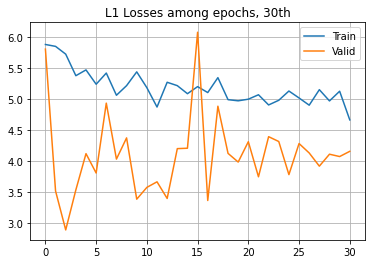

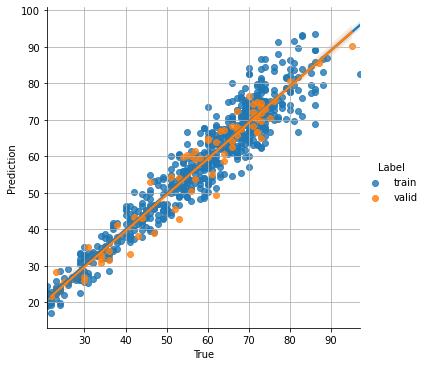

FOLD 1
EPOCHS 31
RMSE :: [TRAIN] 5.091 | [VALID] 4.998
CORR :: [TRAIN] 0.951 | [VALID] 0.960
FOLD 1
EPOCHS 32
RMSE :: [TRAIN] 5.080 | [VALID] 4.522
CORR :: [TRAIN] 0.953 | [VALID] 0.962
FOLD 1
EPOCHS 33
RMSE :: [TRAIN] 4.993 | [VALID] 3.912
CORR :: [TRAIN] 0.954 | [VALID] 0.969
FOLD 1
EPOCHS 34
RMSE :: [TRAIN] 4.945 | [VALID] 4.174
CORR :: [TRAIN] 0.954 | [VALID] 0.966
FOLD 1
EPOCHS 35
RMSE :: [TRAIN] 4.944 | [VALID] 3.967
CORR :: [TRAIN] 0.954 | [VALID] 0.968
FOLD 1
EPOCHS 36
RMSE :: [TRAIN] 5.004 | [VALID] 4.400
CORR :: [TRAIN] 0.953 | [VALID] 0.964
FOLD 1
EPOCHS 37
RMSE :: [TRAIN] 4.947 | [VALID] 4.475
CORR :: [TRAIN] 0.953 | [VALID] 0.962
FOLD 1
EPOCHS 38
RMSE :: [TRAIN] 5.044 | [VALID] 4.934
CORR :: [TRAIN] 0.952 | [VALID] 0.951
FOLD 1
EPOCHS 39
RMSE :: [TRAIN] 4.668 | [VALID] 5.223
CORR :: [TRAIN] 0.959 | [VALID] 0.961
FOLD 1
EPOCHS 40
RMSE :: [TRAIN] 4.887 | [VALID] 6.046
CORR :: [TRAIN] 0.956 | [VALID] 0.964


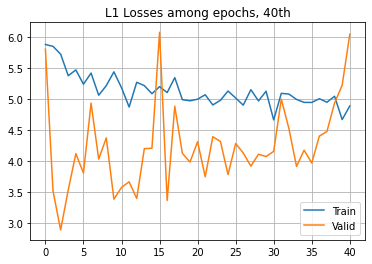

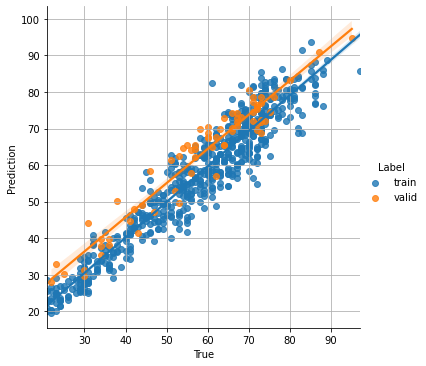

FOLD 1
EPOCHS 41
RMSE :: [TRAIN] 5.340 | [VALID] 4.918
CORR :: [TRAIN] 0.947 | [VALID] 0.955
FOLD 1
EPOCHS 42
RMSE :: [TRAIN] 4.950 | [VALID] 4.743
CORR :: [TRAIN] 0.955 | [VALID] 0.957
FOLD 1
EPOCHS 43
RMSE :: [TRAIN] 4.939 | [VALID] 4.804
CORR :: [TRAIN] 0.955 | [VALID] 0.953
FOLD 1
EPOCHS 44
RMSE :: [TRAIN] 4.829 | [VALID] 4.885
CORR :: [TRAIN] 0.956 | [VALID] 0.961
FOLD 1
EPOCHS 45
RMSE :: [TRAIN] 4.708 | [VALID] 4.952
CORR :: [TRAIN] 0.959 | [VALID] 0.949
FOLD 1
EPOCHS 46
RMSE :: [TRAIN] 4.953 | [VALID] 4.654
CORR :: [TRAIN] 0.954 | [VALID] 0.957
FOLD 1
EPOCHS 47
RMSE :: [TRAIN] 4.878 | [VALID] 4.313
CORR :: [TRAIN] 0.955 | [VALID] 0.962
FOLD 1
EPOCHS 48
RMSE :: [TRAIN] 5.026 | [VALID] 5.221
CORR :: [TRAIN] 0.953 | [VALID] 0.965
FOLD 1
EPOCHS 49
RMSE :: [TRAIN] 4.791 | [VALID] 4.812
CORR :: [TRAIN] 0.956 | [VALID] 0.953
FOLD 1
EPOCHS 50
RMSE :: [TRAIN] 4.990 | [VALID] 5.704
CORR :: [TRAIN] 0.956 | [VALID] 0.956


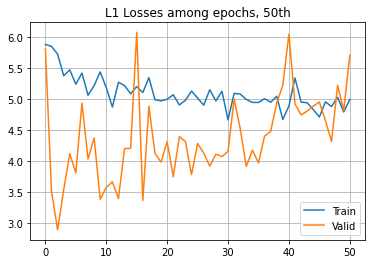

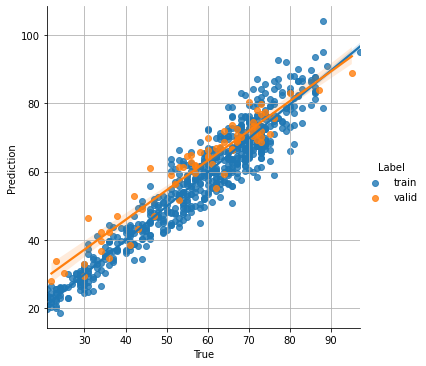

FOLD 1
EPOCHS 51
RMSE :: [TRAIN] 4.895 | [VALID] 4.961
CORR :: [TRAIN] 0.955 | [VALID] 0.958
FOLD 1
EPOCHS 52
RMSE :: [TRAIN] 4.417 | [VALID] 5.545
CORR :: [TRAIN] 0.964 | [VALID] 0.950
FOLD 1
EPOCHS 53
RMSE :: [TRAIN] 4.729 | [VALID] 5.536
CORR :: [TRAIN] 0.958 | [VALID] 0.954
FOLD 1
EPOCHS 54
RMSE :: [TRAIN] 5.064 | [VALID] 4.624
CORR :: [TRAIN] 0.952 | [VALID] 0.962
FOLD 1
EPOCHS 55
RMSE :: [TRAIN] 4.921 | [VALID] 4.651
CORR :: [TRAIN] 0.956 | [VALID] 0.956
FOLD 1
EPOCHS 56
RMSE :: [TRAIN] 5.081 | [VALID] 4.555
CORR :: [TRAIN] 0.951 | [VALID] 0.959
FOLD 1
EPOCHS 57
RMSE :: [TRAIN] 5.105 | [VALID] 5.114
CORR :: [TRAIN] 0.951 | [VALID] 0.948
FOLD 1
EPOCHS 58
RMSE :: [TRAIN] 4.901 | [VALID] 4.877
CORR :: [TRAIN] 0.956 | [VALID] 0.956
FOLD 1
EPOCHS 59
RMSE :: [TRAIN] 5.029 | [VALID] 4.921
CORR :: [TRAIN] 0.953 | [VALID] 0.960
FOLD 1
EPOCHS 60
RMSE :: [TRAIN] 4.987 | [VALID] 5.381
CORR :: [TRAIN] 0.954 | [VALID] 0.949


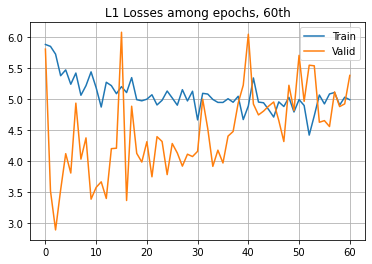

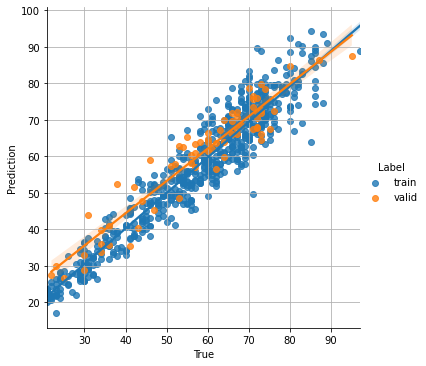

FOLD 1
EPOCHS 61
RMSE :: [TRAIN] 4.807 | [VALID] 6.634
CORR :: [TRAIN] 0.957 | [VALID] 0.948
FOLD 1
EPOCHS 62
RMSE :: [TRAIN] 4.805 | [VALID] 5.102
CORR :: [TRAIN] 0.957 | [VALID] 0.952
FOLD 1
EPOCHS 63
RMSE :: [TRAIN] 4.971 | [VALID] 6.276
CORR :: [TRAIN] 0.954 | [VALID] 0.931
FOLD 1
EPOCHS 64
RMSE :: [TRAIN] 4.819 | [VALID] 5.629
CORR :: [TRAIN] 0.958 | [VALID] 0.955
FOLD 1
EPOCHS 65
RMSE :: [TRAIN] 4.886 | [VALID] 5.100
CORR :: [TRAIN] 0.956 | [VALID] 0.948
FOLD 1
EPOCHS 66
RMSE :: [TRAIN] 4.742 | [VALID] 5.258
CORR :: [TRAIN] 0.958 | [VALID] 0.952
FOLD 1
EPOCHS 67
RMSE :: [TRAIN] 5.003 | [VALID] 4.929
CORR :: [TRAIN] 0.953 | [VALID] 0.954
FOLD 1
EPOCHS 68
RMSE :: [TRAIN] 4.935 | [VALID] 5.018
CORR :: [TRAIN] 0.955 | [VALID] 0.947
FOLD 1
EPOCHS 69
RMSE :: [TRAIN] 4.752 | [VALID] 4.628
CORR :: [TRAIN] 0.958 | [VALID] 0.957
FOLD 1
EPOCHS 70
RMSE :: [TRAIN] 4.972 | [VALID] 4.822
CORR :: [TRAIN] 0.953 | [VALID] 0.952


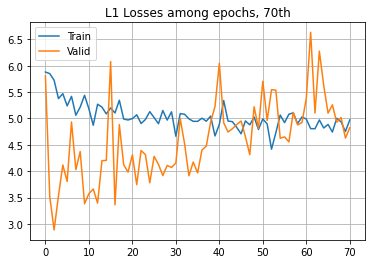

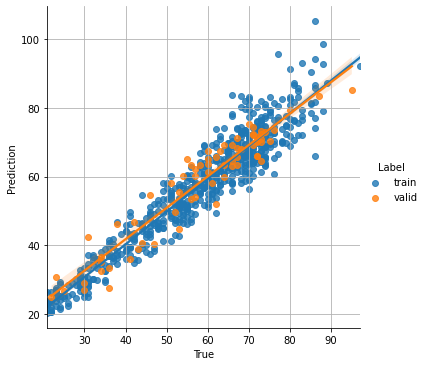

FOLD 1
EPOCHS 71
RMSE :: [TRAIN] 4.752 | [VALID] 5.896
CORR :: [TRAIN] 0.959 | [VALID] 0.939
FOLD 1
EPOCHS 72
RMSE :: [TRAIN] 4.904 | [VALID] 5.323
CORR :: [TRAIN] 0.954 | [VALID] 0.946
FOLD 1
EPOCHS 73
RMSE :: [TRAIN] 4.760 | [VALID] 5.039
CORR :: [TRAIN] 0.958 | [VALID] 0.949
FOLD 1
EPOCHS 74
RMSE :: [TRAIN] 5.078 | [VALID] 5.134
CORR :: [TRAIN] 0.952 | [VALID] 0.945
FOLD 1
EPOCHS 75
RMSE :: [TRAIN] 4.704 | [VALID] 5.252
CORR :: [TRAIN] 0.959 | [VALID] 0.944
FOLD 1
EPOCHS 76
RMSE :: [TRAIN] 4.953 | [VALID] 4.748
CORR :: [TRAIN] 0.954 | [VALID] 0.955
FOLD 1
EPOCHS 77
RMSE :: [TRAIN] 4.882 | [VALID] 4.751
CORR :: [TRAIN] 0.956 | [VALID] 0.954
FOLD 1
EPOCHS 78
RMSE :: [TRAIN] 4.797 | [VALID] 4.814
CORR :: [TRAIN] 0.957 | [VALID] 0.951
FOLD 1
EPOCHS 79
RMSE :: [TRAIN] 4.863 | [VALID] 5.348
CORR :: [TRAIN] 0.956 | [VALID] 0.945
FOLD 1
EPOCHS 80
RMSE :: [TRAIN] 4.617 | [VALID] 4.903
CORR :: [TRAIN] 0.960 | [VALID] 0.950


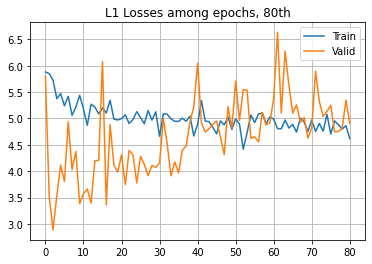

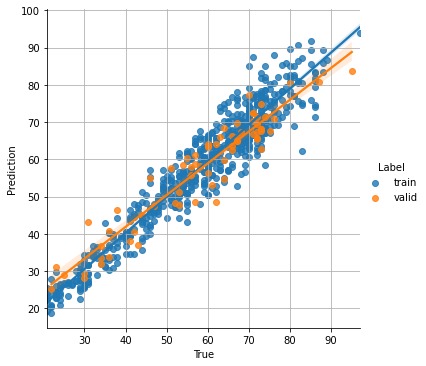

FOLD 1
EPOCHS 81
RMSE :: [TRAIN] 4.763 | [VALID] 4.754
CORR :: [TRAIN] 0.958 | [VALID] 0.953
FOLD 1
EPOCHS 82
RMSE :: [TRAIN] 4.599 | [VALID] 5.321
CORR :: [TRAIN] 0.961 | [VALID] 0.949
FOLD 1
EPOCHS 83
RMSE :: [TRAIN] 4.827 | [VALID] 4.728
CORR :: [TRAIN] 0.956 | [VALID] 0.952
FOLD 1
EPOCHS 84
RMSE :: [TRAIN] 4.825 | [VALID] 4.863
CORR :: [TRAIN] 0.957 | [VALID] 0.952
FOLD 1
EPOCHS 85
RMSE :: [TRAIN] 4.808 | [VALID] 5.519
CORR :: [TRAIN] 0.958 | [VALID] 0.935
FOLD 1
EPOCHS 86
RMSE :: [TRAIN] 4.897 | [VALID] 6.160
CORR :: [TRAIN] 0.956 | [VALID] 0.923
FOLD 1
EPOCHS 87
RMSE :: [TRAIN] 4.819 | [VALID] 6.196
CORR :: [TRAIN] 0.957 | [VALID] 0.945
FOLD 1
EPOCHS 88
RMSE :: [TRAIN] 4.945 | [VALID] 5.018
CORR :: [TRAIN] 0.955 | [VALID] 0.952
FOLD 1
EPOCHS 89
RMSE :: [TRAIN] 4.811 | [VALID] 5.531
CORR :: [TRAIN] 0.958 | [VALID] 0.938
FOLD 1
EPOCHS 90
RMSE :: [TRAIN] 4.597 | [VALID] 5.233
CORR :: [TRAIN] 0.961 | [VALID] 0.950


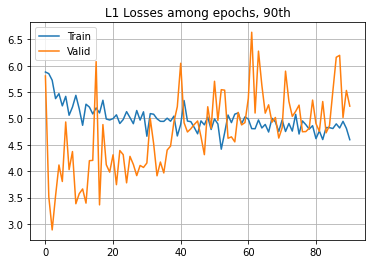

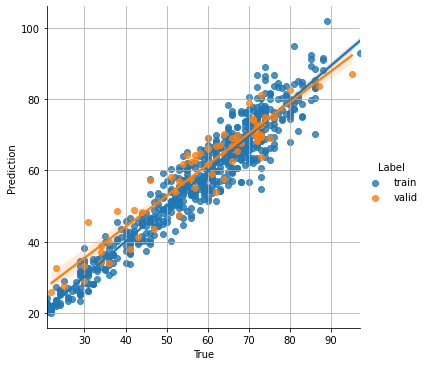

FOLD 1
EPOCHS 91
RMSE :: [TRAIN] 4.874 | [VALID] 5.466
CORR :: [TRAIN] 0.956 | [VALID] 0.942
FOLD 1
EPOCHS 92
RMSE :: [TRAIN] 4.883 | [VALID] 5.333
CORR :: [TRAIN] 0.955 | [VALID] 0.939
FOLD 1
EPOCHS 93
RMSE :: [TRAIN] 5.007 | [VALID] 5.340
CORR :: [TRAIN] 0.953 | [VALID] 0.943
FOLD 1
EPOCHS 94
RMSE :: [TRAIN] 4.910 | [VALID] 4.974
CORR :: [TRAIN] 0.955 | [VALID] 0.948
FOLD 1
EPOCHS 95
RMSE :: [TRAIN] 4.675 | [VALID] 5.432
CORR :: [TRAIN] 0.959 | [VALID] 0.938
FOLD 1
EPOCHS 96
RMSE :: [TRAIN] 4.702 | [VALID] 5.316
CORR :: [TRAIN] 0.959 | [VALID] 0.942
FOLD 1
EPOCHS 97
RMSE :: [TRAIN] 4.795 | [VALID] 5.098
CORR :: [TRAIN] 0.958 | [VALID] 0.947
FOLD 1
EPOCHS 98
RMSE :: [TRAIN] 4.947 | [VALID] 5.123
CORR :: [TRAIN] 0.954 | [VALID] 0.947
FOLD 1
EPOCHS 99
RMSE :: [TRAIN] 4.599 | [VALID] 5.652
CORR :: [TRAIN] 0.960 | [VALID] 0.940
FOLD 1
RMSE :: [TEST] 10.226
CORR :: [TEST] 0.780


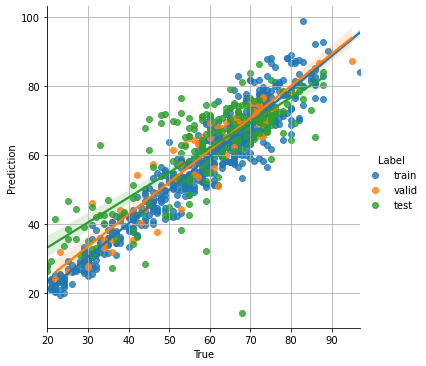

FOLD 2
EPOCHS 0
RMSE :: [TRAIN] 5.140 | [VALID] 6.541
CORR :: [TRAIN] 0.949 | [VALID] 0.986


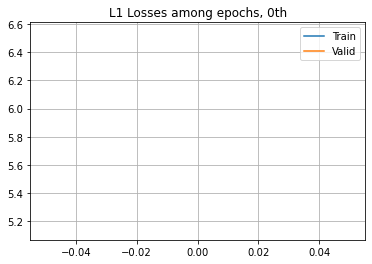

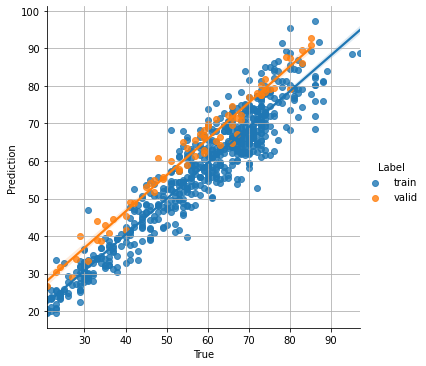

FOLD 2
EPOCHS 1
RMSE :: [TRAIN] 4.955 | [VALID] 6.267
CORR :: [TRAIN] 0.953 | [VALID] 0.991
FOLD 2
EPOCHS 2
RMSE :: [TRAIN] 5.002 | [VALID] 3.287
CORR :: [TRAIN] 0.951 | [VALID] 0.986
FOLD 2
EPOCHS 3
RMSE :: [TRAIN] 4.705 | [VALID] 5.741
CORR :: [TRAIN] 0.956 | [VALID] 0.987
FOLD 2
EPOCHS 4
RMSE :: [TRAIN] 4.834 | [VALID] 4.783
CORR :: [TRAIN] 0.956 | [VALID] 0.989
FOLD 2
EPOCHS 5
RMSE :: [TRAIN] 4.812 | [VALID] 4.268
CORR :: [TRAIN] 0.957 | [VALID] 0.992
FOLD 2
EPOCHS 6
RMSE :: [TRAIN] 4.898 | [VALID] 4.383
CORR :: [TRAIN] 0.954 | [VALID] 0.989
FOLD 2
EPOCHS 7
RMSE :: [TRAIN] 4.845 | [VALID] 4.342
CORR :: [TRAIN] 0.956 | [VALID] 0.986
FOLD 2
EPOCHS 8
RMSE :: [TRAIN] 4.837 | [VALID] 3.669
CORR :: [TRAIN] 0.956 | [VALID] 0.988
FOLD 2
EPOCHS 9
RMSE :: [TRAIN] 4.668 | [VALID] 3.736
CORR :: [TRAIN] 0.960 | [VALID] 0.983
FOLD 2
EPOCHS 10
RMSE :: [TRAIN] 4.825 | [VALID] 2.921
CORR :: [TRAIN] 0.956 | [VALID] 0.985


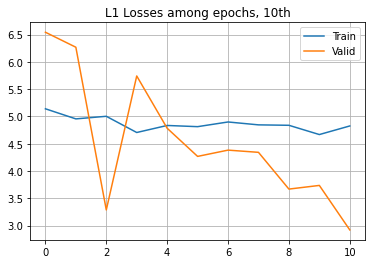

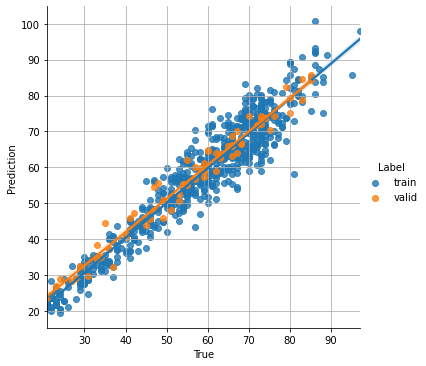

FOLD 2
EPOCHS 11
RMSE :: [TRAIN] 4.863 | [VALID] 4.635
CORR :: [TRAIN] 0.956 | [VALID] 0.990
FOLD 2
EPOCHS 12
RMSE :: [TRAIN] 4.605 | [VALID] 3.344
CORR :: [TRAIN] 0.960 | [VALID] 0.991
FOLD 2
EPOCHS 13
RMSE :: [TRAIN] 5.053 | [VALID] 4.318
CORR :: [TRAIN] 0.953 | [VALID] 0.987
FOLD 2
EPOCHS 14
RMSE :: [TRAIN] 4.868 | [VALID] 3.406
CORR :: [TRAIN] 0.956 | [VALID] 0.982
FOLD 2
EPOCHS 15
RMSE :: [TRAIN] 4.925 | [VALID] 3.436
CORR :: [TRAIN] 0.954 | [VALID] 0.986
FOLD 2
EPOCHS 16
RMSE :: [TRAIN] 4.390 | [VALID] 3.919
CORR :: [TRAIN] 0.964 | [VALID] 0.982
FOLD 2
EPOCHS 17
RMSE :: [TRAIN] 5.030 | [VALID] 3.806
CORR :: [TRAIN] 0.953 | [VALID] 0.988
FOLD 2
EPOCHS 18
RMSE :: [TRAIN] 5.129 | [VALID] 3.378
CORR :: [TRAIN] 0.951 | [VALID] 0.987
FOLD 2
EPOCHS 19
RMSE :: [TRAIN] 4.745 | [VALID] 3.040
CORR :: [TRAIN] 0.957 | [VALID] 0.986
FOLD 2
EPOCHS 20
RMSE :: [TRAIN] 5.101 | [VALID] 2.982
CORR :: [TRAIN] 0.950 | [VALID] 0.988


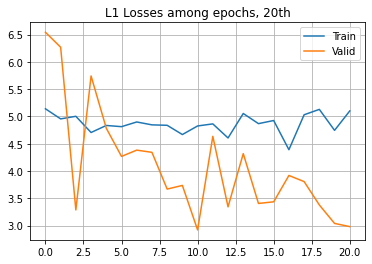

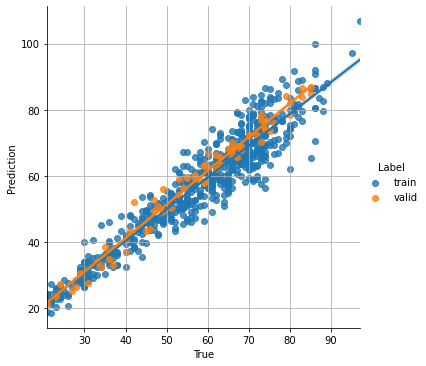

FOLD 2
EPOCHS 21
RMSE :: [TRAIN] 4.555 | [VALID] 2.577
CORR :: [TRAIN] 0.961 | [VALID] 0.989
FOLD 2
EPOCHS 22
RMSE :: [TRAIN] 4.716 | [VALID] 2.667
CORR :: [TRAIN] 0.958 | [VALID] 0.987
FOLD 2
EPOCHS 23
RMSE :: [TRAIN] 4.873 | [VALID] 3.048
CORR :: [TRAIN] 0.955 | [VALID] 0.986
FOLD 2
EPOCHS 24
RMSE :: [TRAIN] 4.896 | [VALID] 2.973
CORR :: [TRAIN] 0.955 | [VALID] 0.986
FOLD 2
EPOCHS 25
RMSE :: [TRAIN] 4.849 | [VALID] 3.130
CORR :: [TRAIN] 0.955 | [VALID] 0.983
FOLD 2
EPOCHS 26
RMSE :: [TRAIN] 4.643 | [VALID] 2.988
CORR :: [TRAIN] 0.960 | [VALID] 0.983
FOLD 2
EPOCHS 27
RMSE :: [TRAIN] 4.919 | [VALID] 3.074
CORR :: [TRAIN] 0.954 | [VALID] 0.983
FOLD 2
EPOCHS 28
RMSE :: [TRAIN] 4.627 | [VALID] 2.920
CORR :: [TRAIN] 0.960 | [VALID] 0.986
FOLD 2
EPOCHS 29
RMSE :: [TRAIN] 4.752 | [VALID] 2.955
CORR :: [TRAIN] 0.957 | [VALID] 0.984
FOLD 2
EPOCHS 30
RMSE :: [TRAIN] 4.943 | [VALID] 2.892
CORR :: [TRAIN] 0.954 | [VALID] 0.985


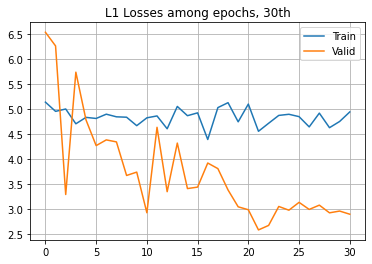

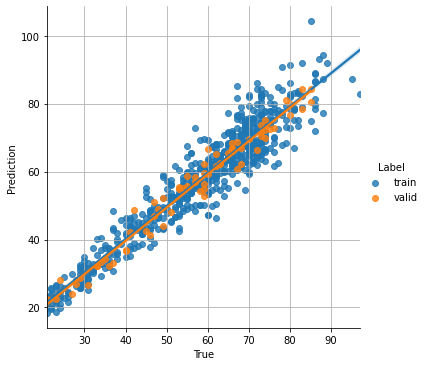

FOLD 2
EPOCHS 31
RMSE :: [TRAIN] 4.670 | [VALID] 2.830
CORR :: [TRAIN] 0.958 | [VALID] 0.985
FOLD 2
EPOCHS 32
RMSE :: [TRAIN] 4.625 | [VALID] 2.886
CORR :: [TRAIN] 0.960 | [VALID] 0.985
FOLD 2
EPOCHS 33
RMSE :: [TRAIN] 4.824 | [VALID] 3.539
CORR :: [TRAIN] 0.956 | [VALID] 0.985
FOLD 2
EPOCHS 34
RMSE :: [TRAIN] 4.836 | [VALID] 3.026
CORR :: [TRAIN] 0.957 | [VALID] 0.984
FOLD 2
EPOCHS 35
RMSE :: [TRAIN] 4.742 | [VALID] 2.945
CORR :: [TRAIN] 0.958 | [VALID] 0.986
FOLD 2
EPOCHS 36
RMSE :: [TRAIN] 4.779 | [VALID] 4.982
CORR :: [TRAIN] 0.957 | [VALID] 0.986
FOLD 2
EPOCHS 37
RMSE :: [TRAIN] 4.978 | [VALID] 3.360
CORR :: [TRAIN] 0.954 | [VALID] 0.987
FOLD 2
EPOCHS 38
RMSE :: [TRAIN] 4.886 | [VALID] 5.278
CORR :: [TRAIN] 0.955 | [VALID] 0.978
FOLD 2
EPOCHS 39
RMSE :: [TRAIN] 4.942 | [VALID] 4.761
CORR :: [TRAIN] 0.953 | [VALID] 0.982
FOLD 2
EPOCHS 40
RMSE :: [TRAIN] 4.601 | [VALID] 4.054
CORR :: [TRAIN] 0.960 | [VALID] 0.985


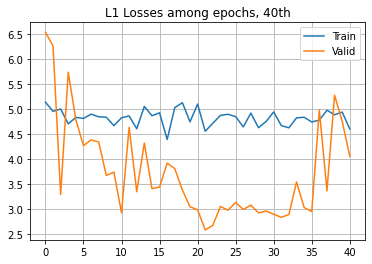

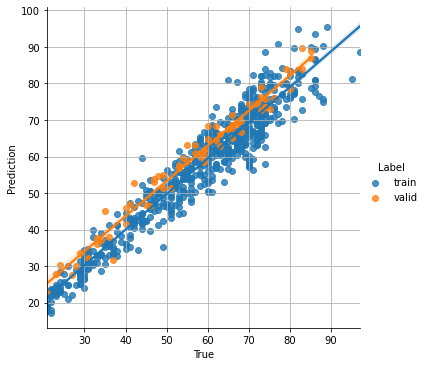

FOLD 2
EPOCHS 41
RMSE :: [TRAIN] 4.814 | [VALID] 3.262
CORR :: [TRAIN] 0.956 | [VALID] 0.984
FOLD 2
EPOCHS 42
RMSE :: [TRAIN] 4.699 | [VALID] 3.962
CORR :: [TRAIN] 0.958 | [VALID] 0.983
FOLD 2
EPOCHS 43
RMSE :: [TRAIN] 4.637 | [VALID] 3.054
CORR :: [TRAIN] 0.959 | [VALID] 0.987
FOLD 2
EPOCHS 44
RMSE :: [TRAIN] 4.780 | [VALID] 4.231
CORR :: [TRAIN] 0.958 | [VALID] 0.985
FOLD 2
EPOCHS 45
RMSE :: [TRAIN] 4.889 | [VALID] 4.005
CORR :: [TRAIN] 0.956 | [VALID] 0.981
FOLD 2
EPOCHS 46
RMSE :: [TRAIN] 4.784 | [VALID] 3.651
CORR :: [TRAIN] 0.956 | [VALID] 0.981
FOLD 2
EPOCHS 47
RMSE :: [TRAIN] 4.811 | [VALID] 4.409
CORR :: [TRAIN] 0.956 | [VALID] 0.983
FOLD 2
EPOCHS 48
RMSE :: [TRAIN] 4.685 | [VALID] 5.276
CORR :: [TRAIN] 0.959 | [VALID] 0.983
FOLD 2
EPOCHS 49
RMSE :: [TRAIN] 4.814 | [VALID] 3.197
CORR :: [TRAIN] 0.956 | [VALID] 0.987
FOLD 2
EPOCHS 50
RMSE :: [TRAIN] 4.746 | [VALID] 3.274
CORR :: [TRAIN] 0.958 | [VALID] 0.983


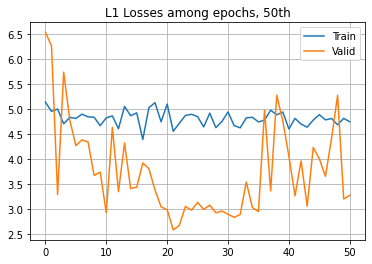

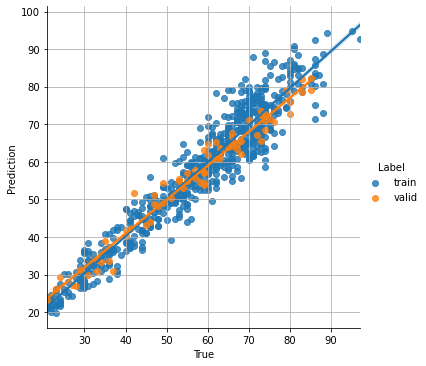

FOLD 2
EPOCHS 51
RMSE :: [TRAIN] 4.786 | [VALID] 3.680
CORR :: [TRAIN] 0.957 | [VALID] 0.977
FOLD 2
EPOCHS 52
RMSE :: [TRAIN] 4.629 | [VALID] 3.515
CORR :: [TRAIN] 0.960 | [VALID] 0.981
FOLD 2
EPOCHS 53
RMSE :: [TRAIN] 4.508 | [VALID] 4.117
CORR :: [TRAIN] 0.962 | [VALID] 0.976
FOLD 2
EPOCHS 54
RMSE :: [TRAIN] 4.628 | [VALID] 3.501
CORR :: [TRAIN] 0.960 | [VALID] 0.982
FOLD 2
EPOCHS 55
RMSE :: [TRAIN] 4.552 | [VALID] 3.589
CORR :: [TRAIN] 0.960 | [VALID] 0.982
FOLD 2
EPOCHS 56
RMSE :: [TRAIN] 4.508 | [VALID] 3.468
CORR :: [TRAIN] 0.962 | [VALID] 0.981
FOLD 2
EPOCHS 57
RMSE :: [TRAIN] 4.506 | [VALID] 3.305
CORR :: [TRAIN] 0.961 | [VALID] 0.980
FOLD 2
EPOCHS 58
RMSE :: [TRAIN] 4.780 | [VALID] 3.004
CORR :: [TRAIN] 0.956 | [VALID] 0.985
FOLD 2
EPOCHS 59
RMSE :: [TRAIN] 4.620 | [VALID] 3.649
CORR :: [TRAIN] 0.959 | [VALID] 0.979
FOLD 2
EPOCHS 60
RMSE :: [TRAIN] 4.629 | [VALID] 2.941
CORR :: [TRAIN] 0.960 | [VALID] 0.985


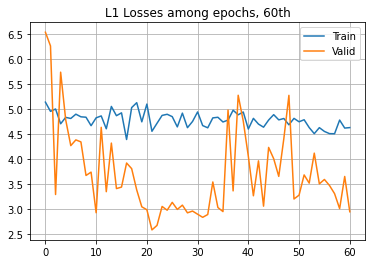

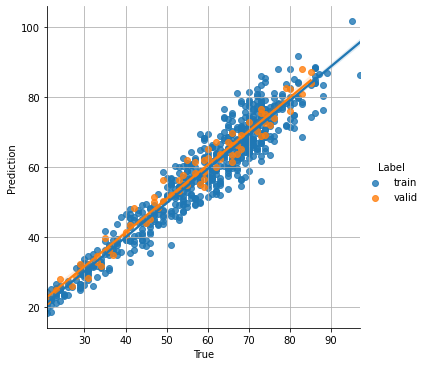

FOLD 2
EPOCHS 61
RMSE :: [TRAIN] 4.864 | [VALID] 2.994
CORR :: [TRAIN] 0.956 | [VALID] 0.983
FOLD 2
EPOCHS 62
RMSE :: [TRAIN] 4.587 | [VALID] 3.988
CORR :: [TRAIN] 0.960 | [VALID] 0.976
FOLD 2
EPOCHS 63
RMSE :: [TRAIN] 4.341 | [VALID] 3.753
CORR :: [TRAIN] 0.965 | [VALID] 0.975
FOLD 2
EPOCHS 64
RMSE :: [TRAIN] 4.652 | [VALID] 4.493
CORR :: [TRAIN] 0.958 | [VALID] 0.969
FOLD 2
EPOCHS 65
RMSE :: [TRAIN] 4.602 | [VALID] 3.551
CORR :: [TRAIN] 0.961 | [VALID] 0.980
FOLD 2
EPOCHS 66
RMSE :: [TRAIN] 4.673 | [VALID] 3.977
CORR :: [TRAIN] 0.958 | [VALID] 0.971
FOLD 2
EPOCHS 67
RMSE :: [TRAIN] 4.736 | [VALID] 3.588
CORR :: [TRAIN] 0.957 | [VALID] 0.983
FOLD 2
EPOCHS 68
RMSE :: [TRAIN] 4.545 | [VALID] 3.477
CORR :: [TRAIN] 0.961 | [VALID] 0.982
FOLD 2
EPOCHS 69
RMSE :: [TRAIN] 4.766 | [VALID] 3.618
CORR :: [TRAIN] 0.957 | [VALID] 0.977
FOLD 2
EPOCHS 70
RMSE :: [TRAIN] 4.715 | [VALID] 3.449
CORR :: [TRAIN] 0.958 | [VALID] 0.979


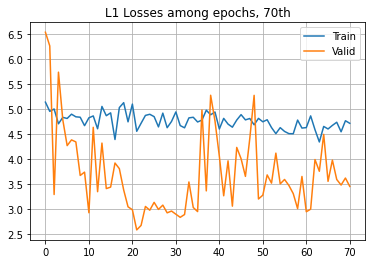

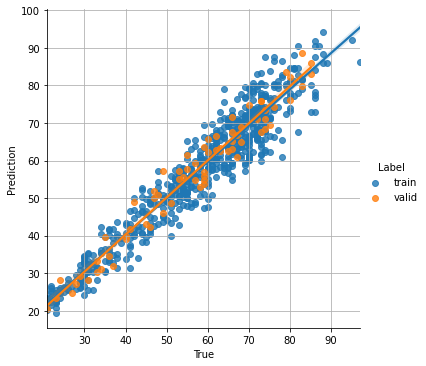

FOLD 2
EPOCHS 71
RMSE :: [TRAIN] 4.677 | [VALID] 3.414
CORR :: [TRAIN] 0.959 | [VALID] 0.979
FOLD 2
EPOCHS 72
RMSE :: [TRAIN] 4.621 | [VALID] 3.471
CORR :: [TRAIN] 0.960 | [VALID] 0.978
FOLD 2
EPOCHS 73
RMSE :: [TRAIN] 4.284 | [VALID] 3.172
CORR :: [TRAIN] 0.966 | [VALID] 0.983
FOLD 2
EPOCHS 74
RMSE :: [TRAIN] 4.874 | [VALID] 3.743
CORR :: [TRAIN] 0.956 | [VALID] 0.979
FOLD 2
EPOCHS 75
RMSE :: [TRAIN] 4.607 | [VALID] 2.935
CORR :: [TRAIN] 0.960 | [VALID] 0.985
FOLD 2
EPOCHS 76
RMSE :: [TRAIN] 4.746 | [VALID] 4.195
CORR :: [TRAIN] 0.958 | [VALID] 0.976
FOLD 2
EPOCHS 77
RMSE :: [TRAIN] 4.715 | [VALID] 4.215
CORR :: [TRAIN] 0.958 | [VALID] 0.972
FOLD 2
EPOCHS 78
RMSE :: [TRAIN] 4.623 | [VALID] 3.603
CORR :: [TRAIN] 0.959 | [VALID] 0.976
FOLD 2
EPOCHS 79
RMSE :: [TRAIN] 4.720 | [VALID] 3.524
CORR :: [TRAIN] 0.958 | [VALID] 0.978
FOLD 2
EPOCHS 80
RMSE :: [TRAIN] 4.863 | [VALID] 3.600
CORR :: [TRAIN] 0.957 | [VALID] 0.978


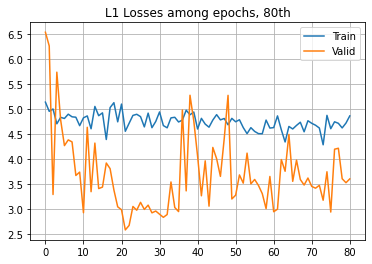

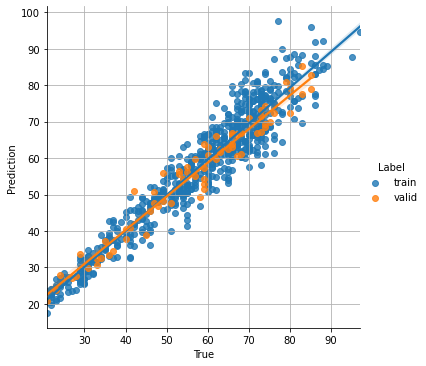

FOLD 2
EPOCHS 81
RMSE :: [TRAIN] 4.611 | [VALID] 3.783
CORR :: [TRAIN] 0.960 | [VALID] 0.976
FOLD 2
EPOCHS 82
RMSE :: [TRAIN] 4.588 | [VALID] 3.713
CORR :: [TRAIN] 0.961 | [VALID] 0.976
FOLD 2
EPOCHS 83
RMSE :: [TRAIN] 4.232 | [VALID] 3.849
CORR :: [TRAIN] 0.965 | [VALID] 0.976
FOLD 2
EPOCHS 84
RMSE :: [TRAIN] 4.580 | [VALID] 3.621
CORR :: [TRAIN] 0.960 | [VALID] 0.977
FOLD 2
EPOCHS 85
RMSE :: [TRAIN] 4.374 | [VALID] 3.293
CORR :: [TRAIN] 0.964 | [VALID] 0.982
FOLD 2
EPOCHS 86
RMSE :: [TRAIN] 4.721 | [VALID] 3.664
CORR :: [TRAIN] 0.958 | [VALID] 0.980
FOLD 2
EPOCHS 87
RMSE :: [TRAIN] 4.679 | [VALID] 3.449
CORR :: [TRAIN] 0.960 | [VALID] 0.984
FOLD 2
EPOCHS 88
RMSE :: [TRAIN] 4.374 | [VALID] 3.714
CORR :: [TRAIN] 0.963 | [VALID] 0.975
FOLD 2
EPOCHS 89
RMSE :: [TRAIN] 4.819 | [VALID] 3.991
CORR :: [TRAIN] 0.957 | [VALID] 0.978
FOLD 2
EPOCHS 90
RMSE :: [TRAIN] 4.705 | [VALID] 3.526
CORR :: [TRAIN] 0.958 | [VALID] 0.979


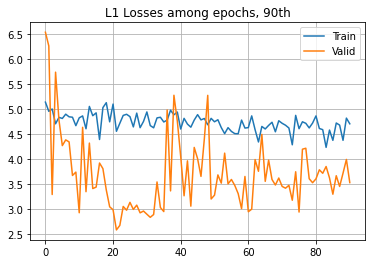

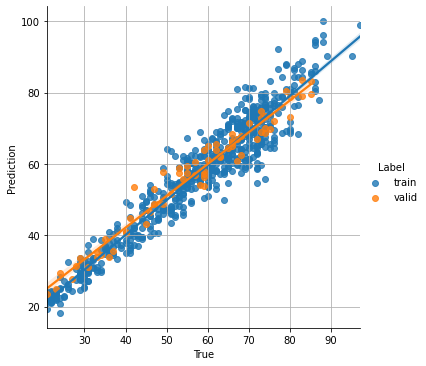

FOLD 2
EPOCHS 91
RMSE :: [TRAIN] 4.592 | [VALID] 4.184
CORR :: [TRAIN] 0.960 | [VALID] 0.968
FOLD 2
EPOCHS 92
RMSE :: [TRAIN] 4.405 | [VALID] 3.791
CORR :: [TRAIN] 0.963 | [VALID] 0.973
FOLD 2
EPOCHS 93
RMSE :: [TRAIN] 4.493 | [VALID] 3.746
CORR :: [TRAIN] 0.961 | [VALID] 0.976
FOLD 2
EPOCHS 94
RMSE :: [TRAIN] 4.679 | [VALID] 3.897
CORR :: [TRAIN] 0.960 | [VALID] 0.977
FOLD 2
EPOCHS 95
RMSE :: [TRAIN] 4.526 | [VALID] 4.591
CORR :: [TRAIN] 0.961 | [VALID] 0.972
FOLD 2
EPOCHS 96
RMSE :: [TRAIN] 4.581 | [VALID] 4.151
CORR :: [TRAIN] 0.961 | [VALID] 0.972
FOLD 2
EPOCHS 97
RMSE :: [TRAIN] 4.484 | [VALID] 4.359
CORR :: [TRAIN] 0.962 | [VALID] 0.969
FOLD 2
EPOCHS 98
RMSE :: [TRAIN] 4.714 | [VALID] 4.094
CORR :: [TRAIN] 0.958 | [VALID] 0.980
FOLD 2
EPOCHS 99
RMSE :: [TRAIN] 4.658 | [VALID] 4.223
CORR :: [TRAIN] 0.959 | [VALID] 0.975
FOLD 2
RMSE :: [TEST] 9.675
CORR :: [TEST] 0.786


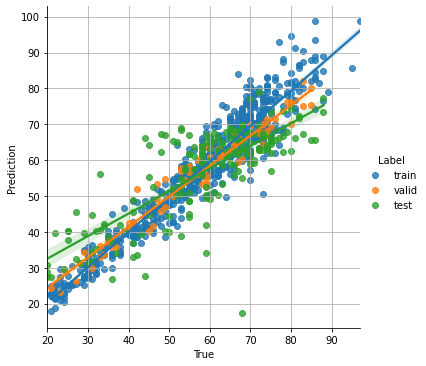

FOLD 3
EPOCHS 0
RMSE :: [TRAIN] 4.766 | [VALID] 3.078
CORR :: [TRAIN] 0.956 | [VALID] 0.992


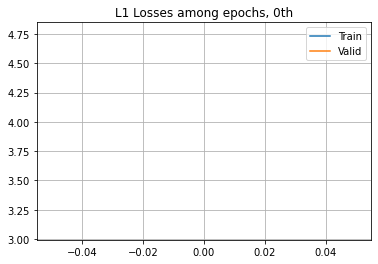

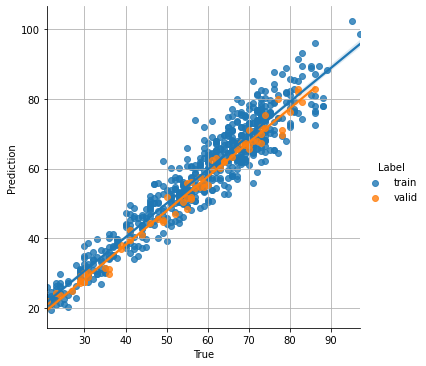

FOLD 3
EPOCHS 1
RMSE :: [TRAIN] 4.764 | [VALID] 2.669
CORR :: [TRAIN] 0.957 | [VALID] 0.990
FOLD 3
EPOCHS 2
RMSE :: [TRAIN] 4.948 | [VALID] 3.094
CORR :: [TRAIN] 0.955 | [VALID] 0.985
FOLD 3
EPOCHS 3
RMSE :: [TRAIN] 4.757 | [VALID] 3.678
CORR :: [TRAIN] 0.957 | [VALID] 0.990
FOLD 3
EPOCHS 4
RMSE :: [TRAIN] 4.507 | [VALID] 3.455
CORR :: [TRAIN] 0.960 | [VALID] 0.991
FOLD 3
EPOCHS 5
RMSE :: [TRAIN] 4.559 | [VALID] 2.797
CORR :: [TRAIN] 0.960 | [VALID] 0.992
FOLD 3
EPOCHS 6
RMSE :: [TRAIN] 4.951 | [VALID] 2.701
CORR :: [TRAIN] 0.952 | [VALID] 0.990
FOLD 3
EPOCHS 7
RMSE :: [TRAIN] 4.630 | [VALID] 2.717
CORR :: [TRAIN] 0.959 | [VALID] 0.990
FOLD 3
EPOCHS 8
RMSE :: [TRAIN] 4.628 | [VALID] 2.878
CORR :: [TRAIN] 0.959 | [VALID] 0.988
FOLD 3
EPOCHS 9
RMSE :: [TRAIN] 4.986 | [VALID] 2.750
CORR :: [TRAIN] 0.954 | [VALID] 0.993
FOLD 3
EPOCHS 10
RMSE :: [TRAIN] 4.553 | [VALID] 2.920
CORR :: [TRAIN] 0.960 | [VALID] 0.992


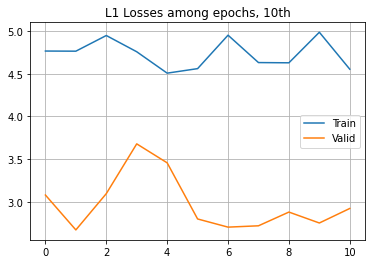

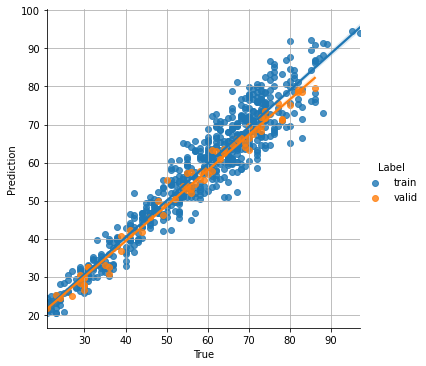

FOLD 3
EPOCHS 11
RMSE :: [TRAIN] 4.661 | [VALID] 2.495
CORR :: [TRAIN] 0.958 | [VALID] 0.990
FOLD 3
EPOCHS 12
RMSE :: [TRAIN] 4.809 | [VALID] 2.623
CORR :: [TRAIN] 0.955 | [VALID] 0.989
FOLD 3
EPOCHS 13
RMSE :: [TRAIN] 4.602 | [VALID] 2.182
CORR :: [TRAIN] 0.959 | [VALID] 0.992
FOLD 3
EPOCHS 14
RMSE :: [TRAIN] 4.435 | [VALID] 3.012
CORR :: [TRAIN] 0.962 | [VALID] 0.988
FOLD 3
EPOCHS 15
RMSE :: [TRAIN] 4.623 | [VALID] 3.781
CORR :: [TRAIN] 0.960 | [VALID] 0.990
FOLD 3
EPOCHS 16
RMSE :: [TRAIN] 4.696 | [VALID] 2.929
CORR :: [TRAIN] 0.957 | [VALID] 0.988
FOLD 3
EPOCHS 17
RMSE :: [TRAIN] 4.611 | [VALID] 2.685
CORR :: [TRAIN] 0.959 | [VALID] 0.992
FOLD 3
EPOCHS 18
RMSE :: [TRAIN] 4.578 | [VALID] 2.787
CORR :: [TRAIN] 0.960 | [VALID] 0.988
FOLD 3
EPOCHS 19
RMSE :: [TRAIN] 4.769 | [VALID] 3.050
CORR :: [TRAIN] 0.957 | [VALID] 0.990
FOLD 3
EPOCHS 20
RMSE :: [TRAIN] 4.649 | [VALID] 2.997
CORR :: [TRAIN] 0.959 | [VALID] 0.990


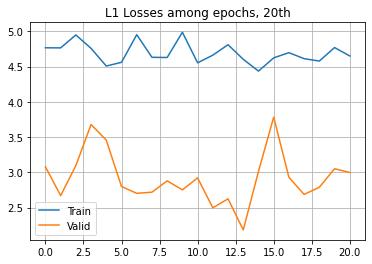

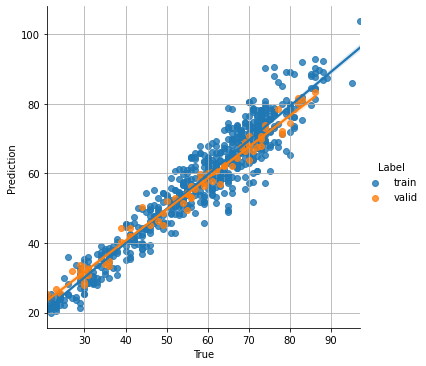

FOLD 3
EPOCHS 21
RMSE :: [TRAIN] 4.786 | [VALID] 2.789
CORR :: [TRAIN] 0.957 | [VALID] 0.990
FOLD 3
EPOCHS 22
RMSE :: [TRAIN] 4.539 | [VALID] 2.686
CORR :: [TRAIN] 0.960 | [VALID] 0.991
FOLD 3
EPOCHS 23
RMSE :: [TRAIN] 4.666 | [VALID] 3.181
CORR :: [TRAIN] 0.959 | [VALID] 0.987
FOLD 3
EPOCHS 24
RMSE :: [TRAIN] 4.772 | [VALID] 2.270
CORR :: [TRAIN] 0.956 | [VALID] 0.991
FOLD 3
EPOCHS 25
RMSE :: [TRAIN] 4.615 | [VALID] 2.791
CORR :: [TRAIN] 0.959 | [VALID] 0.988
FOLD 3
EPOCHS 26
RMSE :: [TRAIN] 4.426 | [VALID] 2.679
CORR :: [TRAIN] 0.961 | [VALID] 0.988
FOLD 3
EPOCHS 27
RMSE :: [TRAIN] 5.021 | [VALID] 2.801
CORR :: [TRAIN] 0.952 | [VALID] 0.988
FOLD 3
EPOCHS 28
RMSE :: [TRAIN] 4.447 | [VALID] 2.694
CORR :: [TRAIN] 0.962 | [VALID] 0.988
FOLD 3
EPOCHS 29
RMSE :: [TRAIN] 4.576 | [VALID] 2.319
CORR :: [TRAIN] 0.960 | [VALID] 0.992
FOLD 3
EPOCHS 30
RMSE :: [TRAIN] 4.739 | [VALID] 2.744
CORR :: [TRAIN] 0.957 | [VALID] 0.987


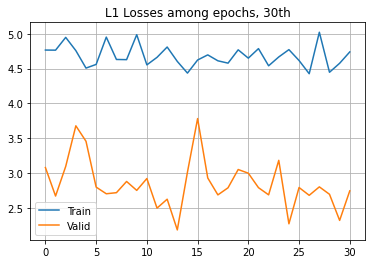

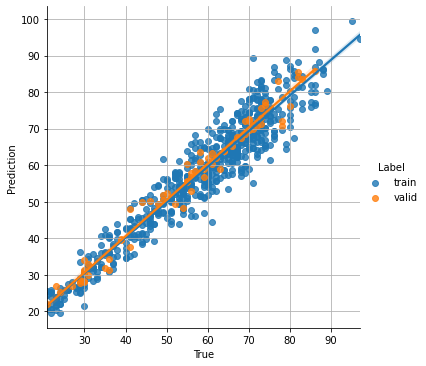

FOLD 3
EPOCHS 31
RMSE :: [TRAIN] 4.590 | [VALID] 3.239
CORR :: [TRAIN] 0.960 | [VALID] 0.989
FOLD 3
EPOCHS 32
RMSE :: [TRAIN] 4.648 | [VALID] 3.134
CORR :: [TRAIN] 0.959 | [VALID] 0.989
FOLD 3
EPOCHS 33
RMSE :: [TRAIN] 4.365 | [VALID] 2.791
CORR :: [TRAIN] 0.963 | [VALID] 0.990
FOLD 3
EPOCHS 34
RMSE :: [TRAIN] 4.604 | [VALID] 3.585
CORR :: [TRAIN] 0.959 | [VALID] 0.987
FOLD 3
EPOCHS 35
RMSE :: [TRAIN] 4.600 | [VALID] 3.141
CORR :: [TRAIN] 0.959 | [VALID] 0.985
FOLD 3
EPOCHS 36
RMSE :: [TRAIN] 4.537 | [VALID] 2.915
CORR :: [TRAIN] 0.961 | [VALID] 0.989
FOLD 3
EPOCHS 37
RMSE :: [TRAIN] 4.821 | [VALID] 2.949
CORR :: [TRAIN] 0.957 | [VALID] 0.989
FOLD 3
EPOCHS 38
RMSE :: [TRAIN] 4.587 | [VALID] 3.967
CORR :: [TRAIN] 0.960 | [VALID] 0.982
FOLD 3
EPOCHS 39
RMSE :: [TRAIN] 4.419 | [VALID] 3.355
CORR :: [TRAIN] 0.962 | [VALID] 0.988
FOLD 3
EPOCHS 40
RMSE :: [TRAIN] 4.498 | [VALID] 2.305
CORR :: [TRAIN] 0.961 | [VALID] 0.992


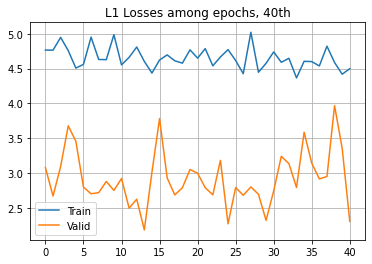

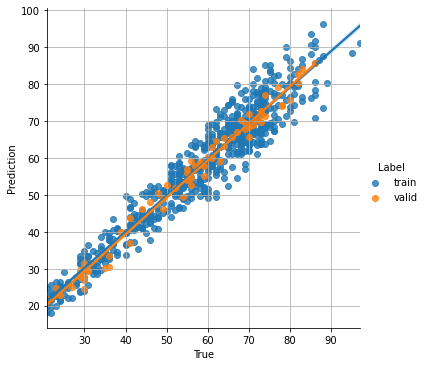

FOLD 3
EPOCHS 41
RMSE :: [TRAIN] 4.626 | [VALID] 3.365
CORR :: [TRAIN] 0.960 | [VALID] 0.986
FOLD 3
EPOCHS 42
RMSE :: [TRAIN] 4.530 | [VALID] 2.962
CORR :: [TRAIN] 0.961 | [VALID] 0.988
FOLD 3
EPOCHS 43
RMSE :: [TRAIN] 4.712 | [VALID] 2.959
CORR :: [TRAIN] 0.959 | [VALID] 0.985
FOLD 3
EPOCHS 44
RMSE :: [TRAIN] 4.198 | [VALID] 2.709
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 3
EPOCHS 45
RMSE :: [TRAIN] 4.301 | [VALID] 3.082
CORR :: [TRAIN] 0.965 | [VALID] 0.984
FOLD 3
EPOCHS 46
RMSE :: [TRAIN] 4.331 | [VALID] 2.688
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 3
EPOCHS 47
RMSE :: [TRAIN] 4.589 | [VALID] 3.078
CORR :: [TRAIN] 0.960 | [VALID] 0.985
FOLD 3
EPOCHS 48
RMSE :: [TRAIN] 4.366 | [VALID] 3.252
CORR :: [TRAIN] 0.963 | [VALID] 0.983
FOLD 3
EPOCHS 49
RMSE :: [TRAIN] 4.790 | [VALID] 3.233
CORR :: [TRAIN] 0.957 | [VALID] 0.987
FOLD 3
EPOCHS 50
RMSE :: [TRAIN] 4.398 | [VALID] 3.236
CORR :: [TRAIN] 0.963 | [VALID] 0.984


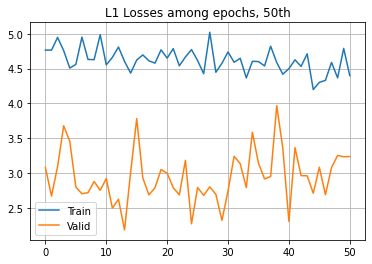

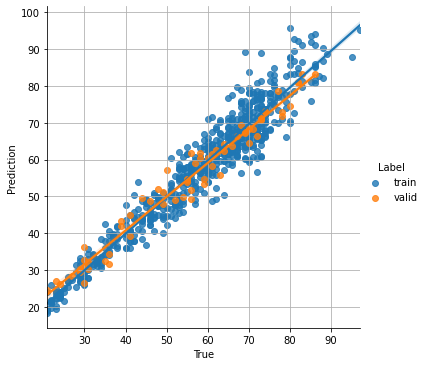

FOLD 3
EPOCHS 51
RMSE :: [TRAIN] 4.541 | [VALID] 3.464
CORR :: [TRAIN] 0.961 | [VALID] 0.989
FOLD 3
EPOCHS 52
RMSE :: [TRAIN] 4.476 | [VALID] 3.703
CORR :: [TRAIN] 0.961 | [VALID] 0.983
FOLD 3
EPOCHS 53
RMSE :: [TRAIN] 4.728 | [VALID] 3.021
CORR :: [TRAIN] 0.957 | [VALID] 0.987
FOLD 3
EPOCHS 54
RMSE :: [TRAIN] 4.151 | [VALID] 2.621
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 3
EPOCHS 55
RMSE :: [TRAIN] 4.529 | [VALID] 3.355
CORR :: [TRAIN] 0.961 | [VALID] 0.984
FOLD 3
EPOCHS 56
RMSE :: [TRAIN] 4.484 | [VALID] 3.732
CORR :: [TRAIN] 0.961 | [VALID] 0.982
FOLD 3
EPOCHS 57
RMSE :: [TRAIN] 4.492 | [VALID] 3.667
CORR :: [TRAIN] 0.961 | [VALID] 0.985
FOLD 3
EPOCHS 58
RMSE :: [TRAIN] 4.515 | [VALID] 3.453
CORR :: [TRAIN] 0.961 | [VALID] 0.988
FOLD 3
EPOCHS 59
RMSE :: [TRAIN] 4.512 | [VALID] 3.698
CORR :: [TRAIN] 0.961 | [VALID] 0.987
FOLD 3
EPOCHS 60
RMSE :: [TRAIN] 4.682 | [VALID] 3.186
CORR :: [TRAIN] 0.959 | [VALID] 0.985


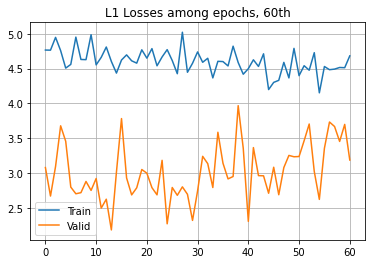

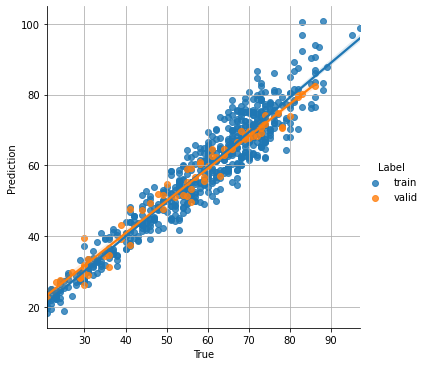

FOLD 3
EPOCHS 61
RMSE :: [TRAIN] 4.570 | [VALID] 3.576
CORR :: [TRAIN] 0.960 | [VALID] 0.980
FOLD 3
EPOCHS 62
RMSE :: [TRAIN] 4.676 | [VALID] 3.674
CORR :: [TRAIN] 0.959 | [VALID] 0.982
FOLD 3
EPOCHS 63
RMSE :: [TRAIN] 4.465 | [VALID] 3.605
CORR :: [TRAIN] 0.962 | [VALID] 0.980
FOLD 3
EPOCHS 64
RMSE :: [TRAIN] 4.725 | [VALID] 3.292
CORR :: [TRAIN] 0.957 | [VALID] 0.986
FOLD 3
EPOCHS 65
RMSE :: [TRAIN] 4.573 | [VALID] 3.096
CORR :: [TRAIN] 0.958 | [VALID] 0.984
FOLD 3
EPOCHS 66
RMSE :: [TRAIN] 4.818 | [VALID] 3.207
CORR :: [TRAIN] 0.956 | [VALID] 0.985
FOLD 3
EPOCHS 67
RMSE :: [TRAIN] 4.539 | [VALID] 2.938
CORR :: [TRAIN] 0.961 | [VALID] 0.985
FOLD 3
EPOCHS 68
RMSE :: [TRAIN] 4.456 | [VALID] 3.163
CORR :: [TRAIN] 0.962 | [VALID] 0.986
FOLD 3
EPOCHS 69
RMSE :: [TRAIN] 4.686 | [VALID] 3.399
CORR :: [TRAIN] 0.958 | [VALID] 0.984
FOLD 3
EPOCHS 70
RMSE :: [TRAIN] 4.334 | [VALID] 3.084
CORR :: [TRAIN] 0.965 | [VALID] 0.984


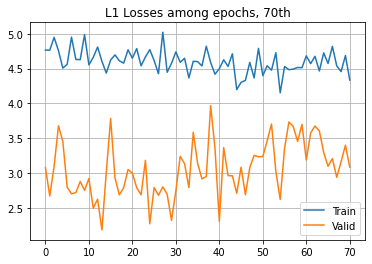

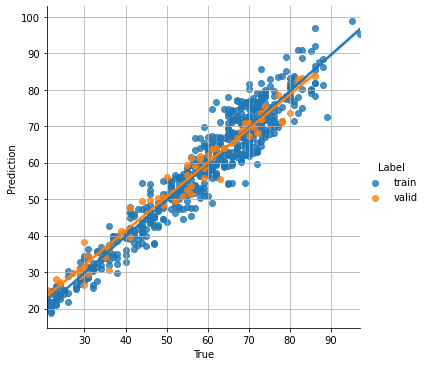

FOLD 3
EPOCHS 71
RMSE :: [TRAIN] 4.379 | [VALID] 3.624
CORR :: [TRAIN] 0.963 | [VALID] 0.982
FOLD 3
EPOCHS 72
RMSE :: [TRAIN] 4.185 | [VALID] 3.159
CORR :: [TRAIN] 0.967 | [VALID] 0.986
FOLD 3
EPOCHS 73
RMSE :: [TRAIN] 4.299 | [VALID] 3.163
CORR :: [TRAIN] 0.965 | [VALID] 0.984
FOLD 3
EPOCHS 74
RMSE :: [TRAIN] 4.675 | [VALID] 3.826
CORR :: [TRAIN] 0.959 | [VALID] 0.978
FOLD 3
EPOCHS 75
RMSE :: [TRAIN] 4.551 | [VALID] 3.937
CORR :: [TRAIN] 0.961 | [VALID] 0.984
FOLD 3
EPOCHS 76
RMSE :: [TRAIN] 4.669 | [VALID] 3.786
CORR :: [TRAIN] 0.960 | [VALID] 0.984
FOLD 3
EPOCHS 77
RMSE :: [TRAIN] 4.983 | [VALID] 4.346
CORR :: [TRAIN] 0.952 | [VALID] 0.976
FOLD 3
EPOCHS 78
RMSE :: [TRAIN] 4.433 | [VALID] 3.034
CORR :: [TRAIN] 0.963 | [VALID] 0.986
FOLD 3
EPOCHS 79
RMSE :: [TRAIN] 4.639 | [VALID] 3.112
CORR :: [TRAIN] 0.959 | [VALID] 0.987
FOLD 3
EPOCHS 80
RMSE :: [TRAIN] 4.229 | [VALID] 3.959
CORR :: [TRAIN] 0.966 | [VALID] 0.977


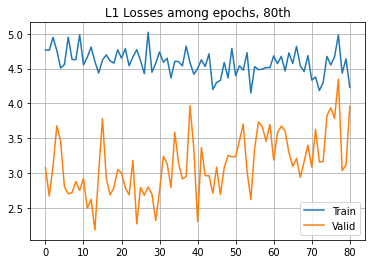

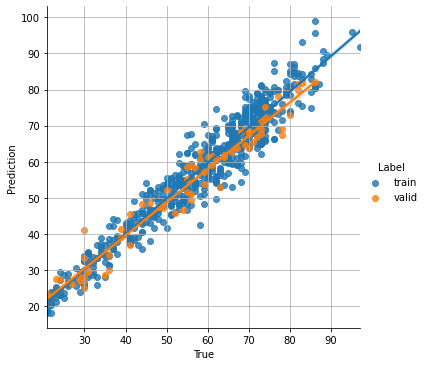

FOLD 3
EPOCHS 81
RMSE :: [TRAIN] 4.549 | [VALID] 3.643
CORR :: [TRAIN] 0.961 | [VALID] 0.983
FOLD 3
EPOCHS 82
RMSE :: [TRAIN] 4.406 | [VALID] 4.604
CORR :: [TRAIN] 0.963 | [VALID] 0.976
FOLD 3
EPOCHS 83
RMSE :: [TRAIN] 4.541 | [VALID] 3.336
CORR :: [TRAIN] 0.960 | [VALID] 0.984
FOLD 3
EPOCHS 84
RMSE :: [TRAIN] 4.478 | [VALID] 3.339
CORR :: [TRAIN] 0.963 | [VALID] 0.985
FOLD 3
EPOCHS 85
RMSE :: [TRAIN] 4.591 | [VALID] 3.463
CORR :: [TRAIN] 0.960 | [VALID] 0.983
FOLD 3
EPOCHS 86
RMSE :: [TRAIN] 4.479 | [VALID] 3.702
CORR :: [TRAIN] 0.962 | [VALID] 0.986
FOLD 3
EPOCHS 87
RMSE :: [TRAIN] 4.651 | [VALID] 3.457
CORR :: [TRAIN] 0.958 | [VALID] 0.984
FOLD 3
EPOCHS 88
RMSE :: [TRAIN] 4.758 | [VALID] 3.418
CORR :: [TRAIN] 0.957 | [VALID] 0.982
FOLD 3
EPOCHS 89
RMSE :: [TRAIN] 4.710 | [VALID] 3.362
CORR :: [TRAIN] 0.958 | [VALID] 0.982
FOLD 3
EPOCHS 90
RMSE :: [TRAIN] 4.504 | [VALID] 3.588
CORR :: [TRAIN] 0.961 | [VALID] 0.983


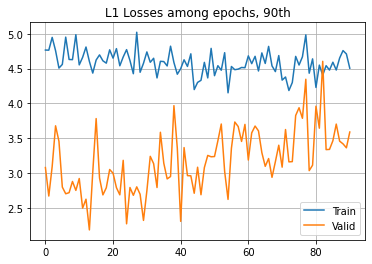

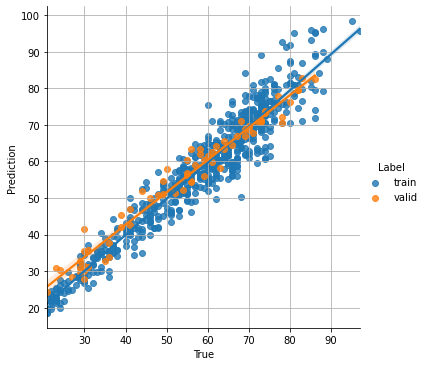

FOLD 3
EPOCHS 91
RMSE :: [TRAIN] 4.548 | [VALID] 3.853
CORR :: [TRAIN] 0.961 | [VALID] 0.980
FOLD 3
EPOCHS 92
RMSE :: [TRAIN] 4.632 | [VALID] 3.254
CORR :: [TRAIN] 0.959 | [VALID] 0.984
FOLD 3
EPOCHS 93
RMSE :: [TRAIN] 4.483 | [VALID] 4.081
CORR :: [TRAIN] 0.962 | [VALID] 0.977
FOLD 3
EPOCHS 94
RMSE :: [TRAIN] 4.385 | [VALID] 3.763
CORR :: [TRAIN] 0.963 | [VALID] 0.979
FOLD 3
EPOCHS 95
RMSE :: [TRAIN] 4.622 | [VALID] 4.523
CORR :: [TRAIN] 0.959 | [VALID] 0.980
FOLD 3
EPOCHS 96
RMSE :: [TRAIN] 4.527 | [VALID] 3.558
CORR :: [TRAIN] 0.961 | [VALID] 0.979
FOLD 3
EPOCHS 97
RMSE :: [TRAIN] 4.537 | [VALID] 3.550
CORR :: [TRAIN] 0.960 | [VALID] 0.980
FOLD 3
EPOCHS 98
RMSE :: [TRAIN] 4.480 | [VALID] 3.649
CORR :: [TRAIN] 0.961 | [VALID] 0.980
FOLD 3
EPOCHS 99
RMSE :: [TRAIN] 4.644 | [VALID] 3.289
CORR :: [TRAIN] 0.958 | [VALID] 0.982
FOLD 3
RMSE :: [TEST] 9.729
CORR :: [TEST] 0.783


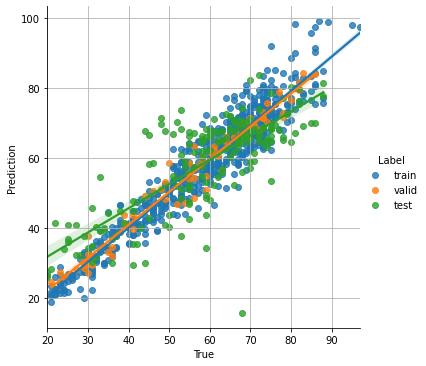

FOLD 4
EPOCHS 0
RMSE :: [TRAIN] 4.592 | [VALID] 2.500
CORR :: [TRAIN] 0.962 | [VALID] 0.988


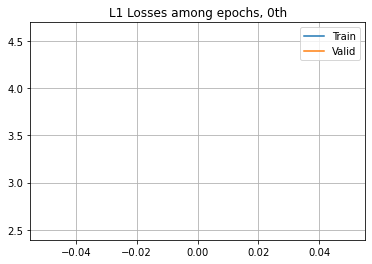

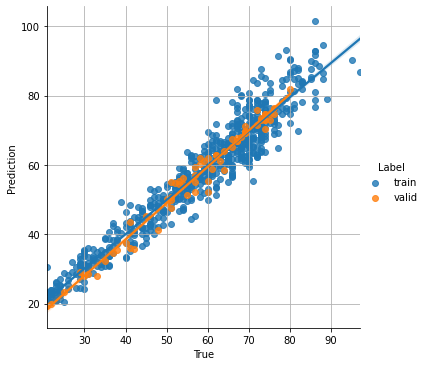

FOLD 4
EPOCHS 1
RMSE :: [TRAIN] 4.447 | [VALID] 1.923
CORR :: [TRAIN] 0.964 | [VALID] 0.992
FOLD 4
EPOCHS 2
RMSE :: [TRAIN] 4.482 | [VALID] 2.598
CORR :: [TRAIN] 0.963 | [VALID] 0.987
FOLD 4
EPOCHS 3
RMSE :: [TRAIN] 4.691 | [VALID] 2.072
CORR :: [TRAIN] 0.960 | [VALID] 0.991
FOLD 4
EPOCHS 4
RMSE :: [TRAIN] 4.586 | [VALID] 2.462
CORR :: [TRAIN] 0.960 | [VALID] 0.987
FOLD 4
EPOCHS 5
RMSE :: [TRAIN] 4.514 | [VALID] 2.302
CORR :: [TRAIN] 0.963 | [VALID] 0.988
FOLD 4
EPOCHS 6
RMSE :: [TRAIN] 4.582 | [VALID] 2.339
CORR :: [TRAIN] 0.961 | [VALID] 0.987
FOLD 4
EPOCHS 7
RMSE :: [TRAIN] 4.647 | [VALID] 2.388
CORR :: [TRAIN] 0.960 | [VALID] 0.988
FOLD 4
EPOCHS 8
RMSE :: [TRAIN] 4.329 | [VALID] 2.452
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 4
EPOCHS 9
RMSE :: [TRAIN] 4.606 | [VALID] 2.385
CORR :: [TRAIN] 0.961 | [VALID] 0.988
FOLD 4
EPOCHS 10
RMSE :: [TRAIN] 4.399 | [VALID] 2.426
CORR :: [TRAIN] 0.964 | [VALID] 0.987


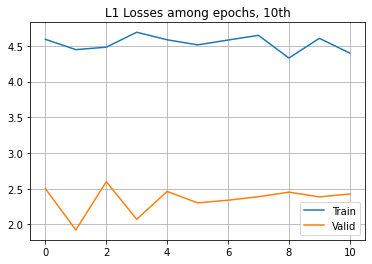

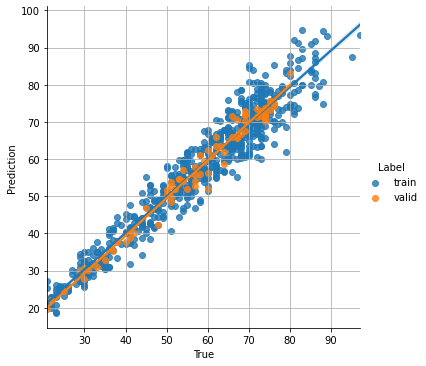

FOLD 4
EPOCHS 11
RMSE :: [TRAIN] 4.608 | [VALID] 2.469
CORR :: [TRAIN] 0.961 | [VALID] 0.987
FOLD 4
EPOCHS 12
RMSE :: [TRAIN] 4.523 | [VALID] 2.851
CORR :: [TRAIN] 0.962 | [VALID] 0.982
FOLD 4
EPOCHS 13
RMSE :: [TRAIN] 4.687 | [VALID] 2.491
CORR :: [TRAIN] 0.960 | [VALID] 0.988
FOLD 4
EPOCHS 14
RMSE :: [TRAIN] 4.619 | [VALID] 2.330
CORR :: [TRAIN] 0.961 | [VALID] 0.990
FOLD 4
EPOCHS 15
RMSE :: [TRAIN] 4.587 | [VALID] 3.471
CORR :: [TRAIN] 0.961 | [VALID] 0.985
FOLD 4
EPOCHS 16
RMSE :: [TRAIN] 4.548 | [VALID] 2.391
CORR :: [TRAIN] 0.962 | [VALID] 0.988
FOLD 4
EPOCHS 17
RMSE :: [TRAIN] 4.487 | [VALID] 4.159
CORR :: [TRAIN] 0.963 | [VALID] 0.984
FOLD 4
EPOCHS 18
RMSE :: [TRAIN] 4.581 | [VALID] 2.849
CORR :: [TRAIN] 0.960 | [VALID] 0.986
FOLD 4
EPOCHS 19
RMSE :: [TRAIN] 4.470 | [VALID] 3.212
CORR :: [TRAIN] 0.964 | [VALID] 0.983
FOLD 4
EPOCHS 20
RMSE :: [TRAIN] 4.556 | [VALID] 2.370
CORR :: [TRAIN] 0.961 | [VALID] 0.988


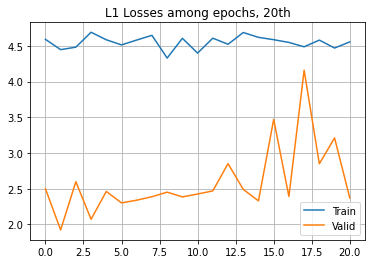

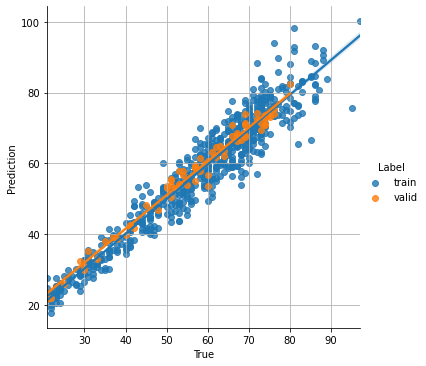

FOLD 4
EPOCHS 21
RMSE :: [TRAIN] 4.431 | [VALID] 2.807
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 4
EPOCHS 22
RMSE :: [TRAIN] 4.345 | [VALID] 2.525
CORR :: [TRAIN] 0.965 | [VALID] 0.985
FOLD 4
EPOCHS 23
RMSE :: [TRAIN] 4.018 | [VALID] 2.552
CORR :: [TRAIN] 0.969 | [VALID] 0.986
FOLD 4
EPOCHS 24
RMSE :: [TRAIN] 4.553 | [VALID] 2.867
CORR :: [TRAIN] 0.963 | [VALID] 0.988
FOLD 4
EPOCHS 25
RMSE :: [TRAIN] 4.616 | [VALID] 2.701
CORR :: [TRAIN] 0.961 | [VALID] 0.985
FOLD 4
EPOCHS 26
RMSE :: [TRAIN] 4.424 | [VALID] 2.585
CORR :: [TRAIN] 0.964 | [VALID] 0.984
FOLD 4
EPOCHS 27
RMSE :: [TRAIN] 4.688 | [VALID] 3.011
CORR :: [TRAIN] 0.959 | [VALID] 0.980
FOLD 4
EPOCHS 28
RMSE :: [TRAIN] 4.400 | [VALID] 2.449
CORR :: [TRAIN] 0.965 | [VALID] 0.986
FOLD 4
EPOCHS 29
RMSE :: [TRAIN] 4.638 | [VALID] 3.476
CORR :: [TRAIN] 0.961 | [VALID] 0.983
FOLD 4
EPOCHS 30
RMSE :: [TRAIN] 4.364 | [VALID] 2.685
CORR :: [TRAIN] 0.965 | [VALID] 0.984


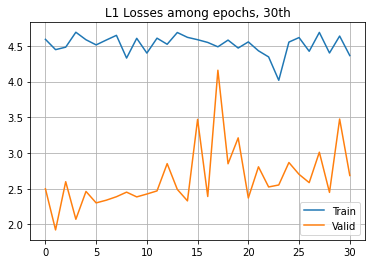

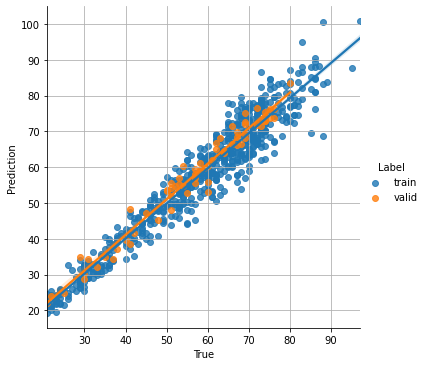

FOLD 4
EPOCHS 31
RMSE :: [TRAIN] 4.346 | [VALID] 2.656
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 4
EPOCHS 32
RMSE :: [TRAIN] 4.374 | [VALID] 3.351
CORR :: [TRAIN] 0.965 | [VALID] 0.986
FOLD 4
EPOCHS 33
RMSE :: [TRAIN] 4.246 | [VALID] 3.139
CORR :: [TRAIN] 0.967 | [VALID] 0.985
FOLD 4
EPOCHS 34
RMSE :: [TRAIN] 4.191 | [VALID] 2.642
CORR :: [TRAIN] 0.968 | [VALID] 0.985
FOLD 4
EPOCHS 35
RMSE :: [TRAIN] 4.339 | [VALID] 3.071
CORR :: [TRAIN] 0.964 | [VALID] 0.986
FOLD 4
EPOCHS 36
RMSE :: [TRAIN] 4.610 | [VALID] 2.447
CORR :: [TRAIN] 0.961 | [VALID] 0.986
FOLD 4
EPOCHS 37
RMSE :: [TRAIN] 4.526 | [VALID] 2.927
CORR :: [TRAIN] 0.962 | [VALID] 0.981
FOLD 4
EPOCHS 38
RMSE :: [TRAIN] 4.572 | [VALID] 2.737
CORR :: [TRAIN] 0.962 | [VALID] 0.984
FOLD 4
EPOCHS 39
RMSE :: [TRAIN] 4.555 | [VALID] 2.522
CORR :: [TRAIN] 0.963 | [VALID] 0.986
FOLD 4
EPOCHS 40
RMSE :: [TRAIN] 4.240 | [VALID] 3.433
CORR :: [TRAIN] 0.966 | [VALID] 0.983


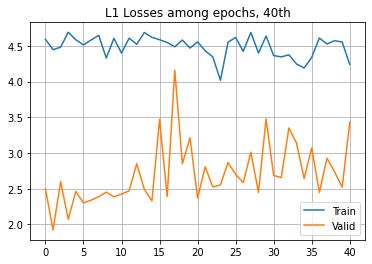

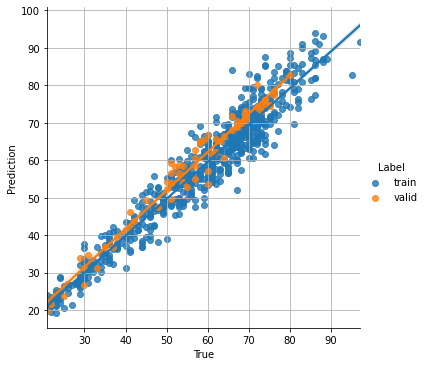

FOLD 4
EPOCHS 41
RMSE :: [TRAIN] 4.171 | [VALID] 2.898
CORR :: [TRAIN] 0.967 | [VALID] 0.985
FOLD 4
EPOCHS 42
RMSE :: [TRAIN] 4.287 | [VALID] 2.886
CORR :: [TRAIN] 0.966 | [VALID] 0.985
FOLD 4
EPOCHS 43
RMSE :: [TRAIN] 4.139 | [VALID] 2.794
CORR :: [TRAIN] 0.968 | [VALID] 0.984
FOLD 4
EPOCHS 44
RMSE :: [TRAIN] 4.457 | [VALID] 2.978
CORR :: [TRAIN] 0.964 | [VALID] 0.984
FOLD 4
EPOCHS 45
RMSE :: [TRAIN] 4.410 | [VALID] 2.674
CORR :: [TRAIN] 0.964 | [VALID] 0.983
FOLD 4
EPOCHS 46
RMSE :: [TRAIN] 4.388 | [VALID] 3.223
CORR :: [TRAIN] 0.965 | [VALID] 0.983
FOLD 4
EPOCHS 47
RMSE :: [TRAIN] 4.459 | [VALID] 3.459
CORR :: [TRAIN] 0.963 | [VALID] 0.978
FOLD 4
EPOCHS 48
RMSE :: [TRAIN] 4.355 | [VALID] 3.485
CORR :: [TRAIN] 0.966 | [VALID] 0.980
FOLD 4
EPOCHS 49
RMSE :: [TRAIN] 4.243 | [VALID] 3.143
CORR :: [TRAIN] 0.967 | [VALID] 0.983
FOLD 4
EPOCHS 50
RMSE :: [TRAIN] 4.414 | [VALID] 2.718
CORR :: [TRAIN] 0.964 | [VALID] 0.982


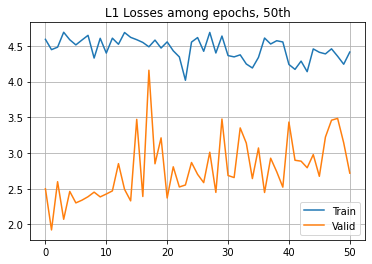

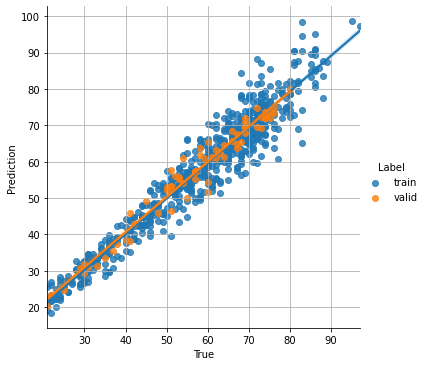

FOLD 4
EPOCHS 51
RMSE :: [TRAIN] 4.761 | [VALID] 2.940
CORR :: [TRAIN] 0.959 | [VALID] 0.982
FOLD 4
EPOCHS 52
RMSE :: [TRAIN] 3.944 | [VALID] 3.144
CORR :: [TRAIN] 0.971 | [VALID] 0.982
FOLD 4
EPOCHS 53
RMSE :: [TRAIN] 4.464 | [VALID] 3.728
CORR :: [TRAIN] 0.963 | [VALID] 0.978
FOLD 4
EPOCHS 54
RMSE :: [TRAIN] 4.418 | [VALID] 2.699
CORR :: [TRAIN] 0.963 | [VALID] 0.983
FOLD 4
EPOCHS 55
RMSE :: [TRAIN] 4.401 | [VALID] 3.317
CORR :: [TRAIN] 0.964 | [VALID] 0.976
FOLD 4
EPOCHS 56
RMSE :: [TRAIN] 4.501 | [VALID] 2.955
CORR :: [TRAIN] 0.962 | [VALID] 0.980
FOLD 4
EPOCHS 57
RMSE :: [TRAIN] 4.387 | [VALID] 3.035
CORR :: [TRAIN] 0.964 | [VALID] 0.986
FOLD 4
EPOCHS 58
RMSE :: [TRAIN] 4.567 | [VALID] 3.360
CORR :: [TRAIN] 0.962 | [VALID] 0.981
FOLD 4
EPOCHS 59
RMSE :: [TRAIN] 4.335 | [VALID] 2.775
CORR :: [TRAIN] 0.965 | [VALID] 0.982
FOLD 4
EPOCHS 60
RMSE :: [TRAIN] 4.337 | [VALID] 3.185
CORR :: [TRAIN] 0.965 | [VALID] 0.980


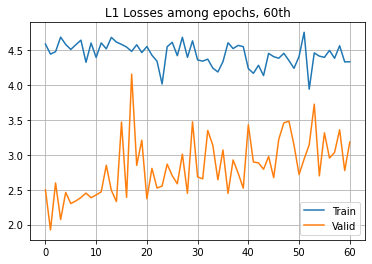

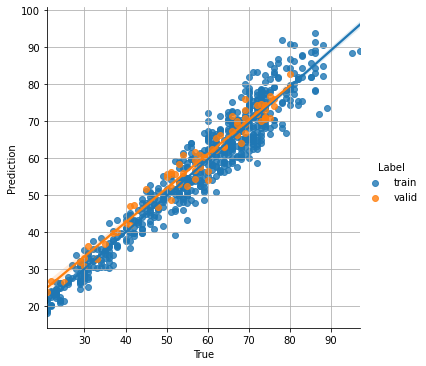

FOLD 4
EPOCHS 61
RMSE :: [TRAIN] 4.553 | [VALID] 2.892
CORR :: [TRAIN] 0.961 | [VALID] 0.980
FOLD 4
EPOCHS 62
RMSE :: [TRAIN] 4.417 | [VALID] 4.100
CORR :: [TRAIN] 0.965 | [VALID] 0.981
FOLD 4
EPOCHS 63
RMSE :: [TRAIN] 4.122 | [VALID] 3.518
CORR :: [TRAIN] 0.968 | [VALID] 0.980
FOLD 4
EPOCHS 64
RMSE :: [TRAIN] 4.666 | [VALID] 3.790
CORR :: [TRAIN] 0.960 | [VALID] 0.982
FOLD 4
EPOCHS 65
RMSE :: [TRAIN] 4.492 | [VALID] 4.298
CORR :: [TRAIN] 0.964 | [VALID] 0.977
FOLD 4
EPOCHS 66
RMSE :: [TRAIN] 4.408 | [VALID] 3.467
CORR :: [TRAIN] 0.964 | [VALID] 0.987
FOLD 4
EPOCHS 67
RMSE :: [TRAIN] 4.376 | [VALID] 2.590
CORR :: [TRAIN] 0.964 | [VALID] 0.984
FOLD 4
EPOCHS 68
RMSE :: [TRAIN] 4.779 | [VALID] 3.148
CORR :: [TRAIN] 0.957 | [VALID] 0.980
FOLD 4
EPOCHS 69
RMSE :: [TRAIN] 4.594 | [VALID] 2.987
CORR :: [TRAIN] 0.961 | [VALID] 0.983
FOLD 4
EPOCHS 70
RMSE :: [TRAIN] 4.158 | [VALID] 2.949
CORR :: [TRAIN] 0.968 | [VALID] 0.980


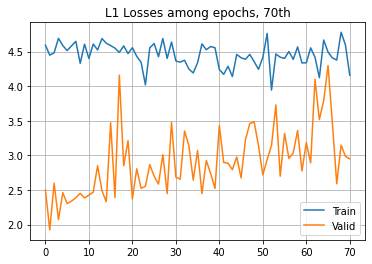

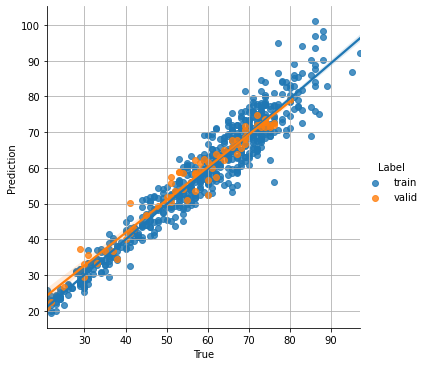

FOLD 4
EPOCHS 71
RMSE :: [TRAIN] 4.517 | [VALID] 3.070
CORR :: [TRAIN] 0.963 | [VALID] 0.982
FOLD 4
EPOCHS 72
RMSE :: [TRAIN] 4.347 | [VALID] 3.047
CORR :: [TRAIN] 0.965 | [VALID] 0.981
FOLD 4
EPOCHS 73
RMSE :: [TRAIN] 4.435 | [VALID] 3.816
CORR :: [TRAIN] 0.963 | [VALID] 0.972
FOLD 4
EPOCHS 74
RMSE :: [TRAIN] 4.278 | [VALID] 3.040
CORR :: [TRAIN] 0.966 | [VALID] 0.982
FOLD 4
EPOCHS 75
RMSE :: [TRAIN] 4.297 | [VALID] 3.382
CORR :: [TRAIN] 0.966 | [VALID] 0.978
FOLD 4
EPOCHS 76
RMSE :: [TRAIN] 4.553 | [VALID] 3.128
CORR :: [TRAIN] 0.963 | [VALID] 0.979
FOLD 4
EPOCHS 77
RMSE :: [TRAIN] 4.600 | [VALID] 3.484
CORR :: [TRAIN] 0.962 | [VALID] 0.977
FOLD 4
EPOCHS 78
RMSE :: [TRAIN] 4.415 | [VALID] 4.113
CORR :: [TRAIN] 0.965 | [VALID] 0.976
FOLD 4
EPOCHS 79
RMSE :: [TRAIN] 4.409 | [VALID] 3.684
CORR :: [TRAIN] 0.964 | [VALID] 0.975
FOLD 4
EPOCHS 80
RMSE :: [TRAIN] 4.425 | [VALID] 3.003
CORR :: [TRAIN] 0.964 | [VALID] 0.980


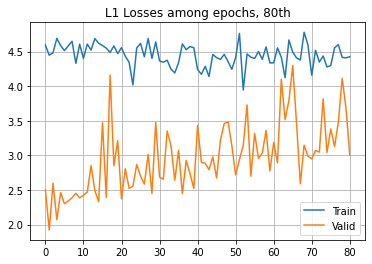

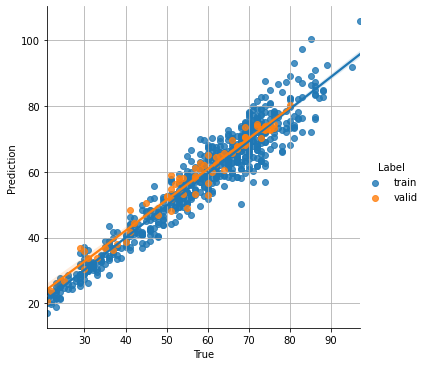

FOLD 4
EPOCHS 81
RMSE :: [TRAIN] 4.565 | [VALID] 2.896
CORR :: [TRAIN] 0.962 | [VALID] 0.980
FOLD 4
EPOCHS 82
RMSE :: [TRAIN] 4.384 | [VALID] 2.904
CORR :: [TRAIN] 0.964 | [VALID] 0.982
FOLD 4
EPOCHS 83
RMSE :: [TRAIN] 4.392 | [VALID] 3.284
CORR :: [TRAIN] 0.964 | [VALID] 0.981
FOLD 4
EPOCHS 84
RMSE :: [TRAIN] 4.427 | [VALID] 3.057
CORR :: [TRAIN] 0.964 | [VALID] 0.979
FOLD 4
EPOCHS 85
RMSE :: [TRAIN] 4.219 | [VALID] 2.921
CORR :: [TRAIN] 0.967 | [VALID] 0.981
FOLD 4
EPOCHS 86
RMSE :: [TRAIN] 4.479 | [VALID] 3.388
CORR :: [TRAIN] 0.963 | [VALID] 0.973
FOLD 4
EPOCHS 87
RMSE :: [TRAIN] 4.615 | [VALID] 4.100
CORR :: [TRAIN] 0.961 | [VALID] 0.978
FOLD 4
EPOCHS 88
RMSE :: [TRAIN] 4.343 | [VALID] 3.057
CORR :: [TRAIN] 0.966 | [VALID] 0.980
FOLD 4
EPOCHS 89
RMSE :: [TRAIN] 4.537 | [VALID] 3.854
CORR :: [TRAIN] 0.962 | [VALID] 0.977
FOLD 4
EPOCHS 90
RMSE :: [TRAIN] 4.150 | [VALID] 3.023
CORR :: [TRAIN] 0.968 | [VALID] 0.978


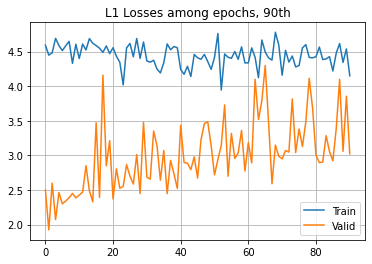

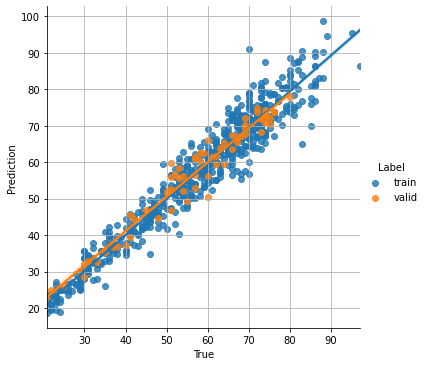

FOLD 4
EPOCHS 91
RMSE :: [TRAIN] 4.400 | [VALID] 3.610
CORR :: [TRAIN] 0.964 | [VALID] 0.969
FOLD 4
EPOCHS 92
RMSE :: [TRAIN] 4.189 | [VALID] 3.824
CORR :: [TRAIN] 0.967 | [VALID] 0.976
FOLD 4
EPOCHS 93
RMSE :: [TRAIN] 4.470 | [VALID] 3.051
CORR :: [TRAIN] 0.963 | [VALID] 0.982
FOLD 4
EPOCHS 94
RMSE :: [TRAIN] 4.210 | [VALID] 4.173
CORR :: [TRAIN] 0.967 | [VALID] 0.970
FOLD 4
EPOCHS 95
RMSE :: [TRAIN] 4.411 | [VALID] 3.834
CORR :: [TRAIN] 0.963 | [VALID] 0.971
FOLD 4
EPOCHS 96
RMSE :: [TRAIN] 4.400 | [VALID] 3.472
CORR :: [TRAIN] 0.965 | [VALID] 0.972
FOLD 4
EPOCHS 97
RMSE :: [TRAIN] 4.221 | [VALID] 4.308
CORR :: [TRAIN] 0.967 | [VALID] 0.978
FOLD 4
EPOCHS 98
RMSE :: [TRAIN] 4.545 | [VALID] 3.287
CORR :: [TRAIN] 0.962 | [VALID] 0.981
FOLD 4
EPOCHS 99
RMSE :: [TRAIN] 4.498 | [VALID] 3.703
CORR :: [TRAIN] 0.963 | [VALID] 0.972
FOLD 4
RMSE :: [TEST] 9.735
CORR :: [TEST] 0.781


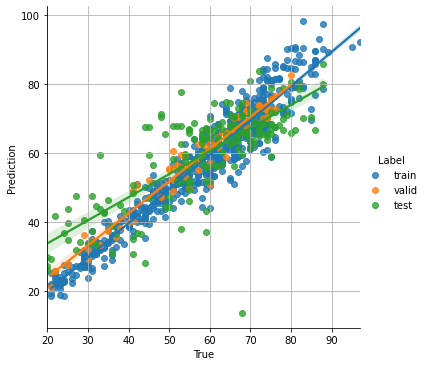

FOLD 5
EPOCHS 0
RMSE :: [TRAIN] 4.540 | [VALID] 3.264
CORR :: [TRAIN] 0.959 | [VALID] 0.988


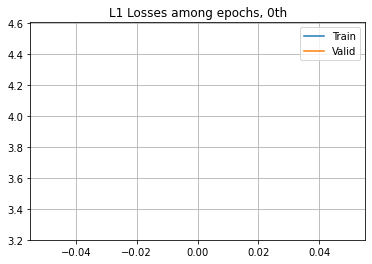

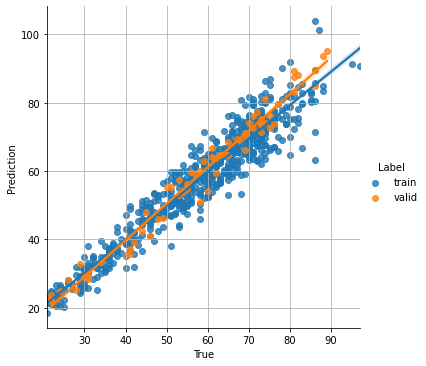

FOLD 5
EPOCHS 1
RMSE :: [TRAIN] 4.641 | [VALID] 2.477
CORR :: [TRAIN] 0.959 | [VALID] 0.991
FOLD 5
EPOCHS 2
RMSE :: [TRAIN] 4.512 | [VALID] 2.273
CORR :: [TRAIN] 0.961 | [VALID] 0.994
FOLD 5
EPOCHS 3
RMSE :: [TRAIN] 4.418 | [VALID] 3.168
CORR :: [TRAIN] 0.962 | [VALID] 0.992
FOLD 5
EPOCHS 4
RMSE :: [TRAIN] 4.491 | [VALID] 2.595
CORR :: [TRAIN] 0.961 | [VALID] 0.990
FOLD 5
EPOCHS 5
RMSE :: [TRAIN] 4.371 | [VALID] 2.335
CORR :: [TRAIN] 0.964 | [VALID] 0.992
FOLD 5
EPOCHS 6
RMSE :: [TRAIN] 4.677 | [VALID] 2.847
CORR :: [TRAIN] 0.957 | [VALID] 0.990
FOLD 5
EPOCHS 7
RMSE :: [TRAIN] 4.388 | [VALID] 2.986
CORR :: [TRAIN] 0.963 | [VALID] 0.993
FOLD 5
EPOCHS 8
RMSE :: [TRAIN] 4.385 | [VALID] 2.247
CORR :: [TRAIN] 0.962 | [VALID] 0.992
FOLD 5
EPOCHS 9
RMSE :: [TRAIN] 4.109 | [VALID] 3.353
CORR :: [TRAIN] 0.967 | [VALID] 0.989
FOLD 5
EPOCHS 10
RMSE :: [TRAIN] 4.570 | [VALID] 2.500
CORR :: [TRAIN] 0.960 | [VALID] 0.991


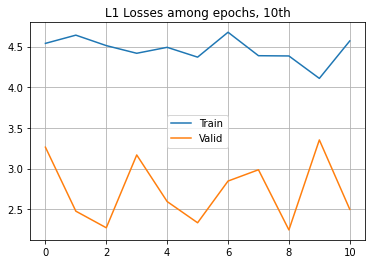

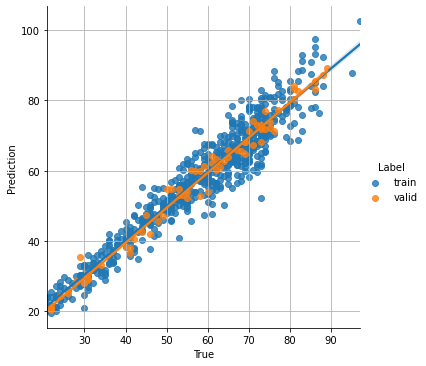

FOLD 5
EPOCHS 11
RMSE :: [TRAIN] 4.399 | [VALID] 2.477
CORR :: [TRAIN] 0.963 | [VALID] 0.994
FOLD 5
EPOCHS 12
RMSE :: [TRAIN] 4.397 | [VALID] 2.016
CORR :: [TRAIN] 0.962 | [VALID] 0.995
FOLD 5
EPOCHS 13
RMSE :: [TRAIN] 4.314 | [VALID] 2.307
CORR :: [TRAIN] 0.963 | [VALID] 0.993
FOLD 5
EPOCHS 14
RMSE :: [TRAIN] 4.379 | [VALID] 2.759
CORR :: [TRAIN] 0.964 | [VALID] 0.994
FOLD 5
EPOCHS 15
RMSE :: [TRAIN] 4.457 | [VALID] 2.451
CORR :: [TRAIN] 0.962 | [VALID] 0.993
FOLD 5
EPOCHS 16
RMSE :: [TRAIN] 4.509 | [VALID] 2.537
CORR :: [TRAIN] 0.962 | [VALID] 0.993
FOLD 5
EPOCHS 17
RMSE :: [TRAIN] 4.696 | [VALID] 2.669
CORR :: [TRAIN] 0.958 | [VALID] 0.992
FOLD 5
EPOCHS 18
RMSE :: [TRAIN] 4.114 | [VALID] 4.111
CORR :: [TRAIN] 0.968 | [VALID] 0.990
FOLD 5
EPOCHS 19
RMSE :: [TRAIN] 4.362 | [VALID] 2.884
CORR :: [TRAIN] 0.963 | [VALID] 0.994
FOLD 5
EPOCHS 20
RMSE :: [TRAIN] 4.292 | [VALID] 3.012
CORR :: [TRAIN] 0.964 | [VALID] 0.994


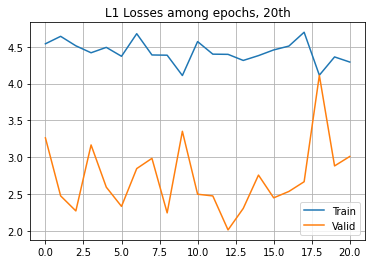

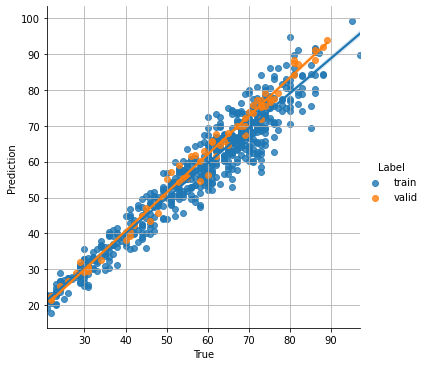

FOLD 5
EPOCHS 21
RMSE :: [TRAIN] 4.369 | [VALID] 2.925
CORR :: [TRAIN] 0.963 | [VALID] 0.991
FOLD 5
EPOCHS 22
RMSE :: [TRAIN] 4.643 | [VALID] 3.643
CORR :: [TRAIN] 0.959 | [VALID] 0.991
FOLD 5
EPOCHS 23
RMSE :: [TRAIN] 4.315 | [VALID] 2.880
CORR :: [TRAIN] 0.963 | [VALID] 0.993
FOLD 5
EPOCHS 24
RMSE :: [TRAIN] 4.203 | [VALID] 2.508
CORR :: [TRAIN] 0.966 | [VALID] 0.992
FOLD 5
EPOCHS 25
RMSE :: [TRAIN] 4.386 | [VALID] 2.967
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 5
EPOCHS 26
RMSE :: [TRAIN] 4.362 | [VALID] 3.097
CORR :: [TRAIN] 0.962 | [VALID] 0.991
FOLD 5
EPOCHS 27
RMSE :: [TRAIN] 4.328 | [VALID] 2.745
CORR :: [TRAIN] 0.964 | [VALID] 0.991
FOLD 5
EPOCHS 28
RMSE :: [TRAIN] 4.321 | [VALID] 2.583
CORR :: [TRAIN] 0.964 | [VALID] 0.991
FOLD 5
EPOCHS 29
RMSE :: [TRAIN] 4.171 | [VALID] 2.593
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 5
EPOCHS 30
RMSE :: [TRAIN] 4.299 | [VALID] 2.635
CORR :: [TRAIN] 0.964 | [VALID] 0.990


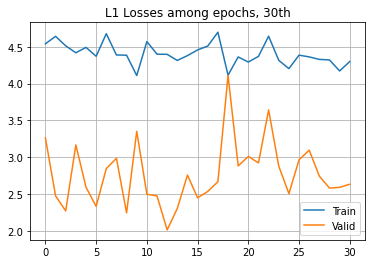

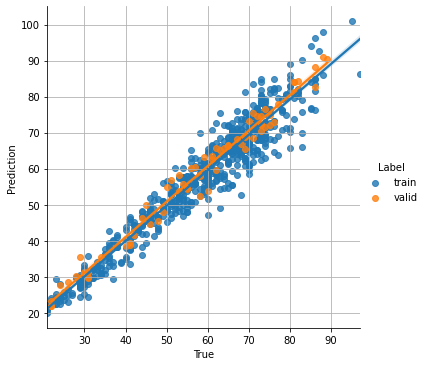

FOLD 5
EPOCHS 31
RMSE :: [TRAIN] 4.496 | [VALID] 2.476
CORR :: [TRAIN] 0.962 | [VALID] 0.991
FOLD 5
EPOCHS 32
RMSE :: [TRAIN] 4.131 | [VALID] 2.640
CORR :: [TRAIN] 0.967 | [VALID] 0.989
FOLD 5
EPOCHS 33
RMSE :: [TRAIN] 4.272 | [VALID] 2.666
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 5
EPOCHS 34
RMSE :: [TRAIN] 4.134 | [VALID] 2.584
CORR :: [TRAIN] 0.967 | [VALID] 0.990
FOLD 5
EPOCHS 35
RMSE :: [TRAIN] 4.307 | [VALID] 3.208
CORR :: [TRAIN] 0.964 | [VALID] 0.988
FOLD 5
EPOCHS 36
RMSE :: [TRAIN] 4.257 | [VALID] 2.633
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 5
EPOCHS 37
RMSE :: [TRAIN] 4.292 | [VALID] 2.543
CORR :: [TRAIN] 0.964 | [VALID] 0.994
FOLD 5
EPOCHS 38
RMSE :: [TRAIN] 4.428 | [VALID] 3.263
CORR :: [TRAIN] 0.963 | [VALID] 0.991
FOLD 5
EPOCHS 39
RMSE :: [TRAIN] 4.326 | [VALID] 2.556
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 5
EPOCHS 40
RMSE :: [TRAIN] 4.264 | [VALID] 2.705
CORR :: [TRAIN] 0.965 | [VALID] 0.990


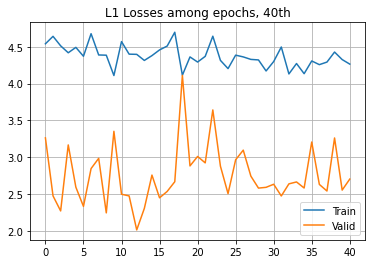

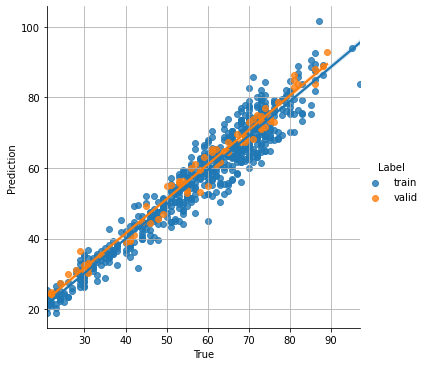

FOLD 5
EPOCHS 41
RMSE :: [TRAIN] 4.368 | [VALID] 2.314
CORR :: [TRAIN] 0.963 | [VALID] 0.992
FOLD 5
EPOCHS 42
RMSE :: [TRAIN] 4.260 | [VALID] 2.538
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 5
EPOCHS 43
RMSE :: [TRAIN] 4.342 | [VALID] 2.602
CORR :: [TRAIN] 0.965 | [VALID] 0.992
FOLD 5
EPOCHS 44
RMSE :: [TRAIN] 4.432 | [VALID] 2.929
CORR :: [TRAIN] 0.963 | [VALID] 0.990
FOLD 5
EPOCHS 45
RMSE :: [TRAIN] 4.115 | [VALID] 3.779
CORR :: [TRAIN] 0.967 | [VALID] 0.990
FOLD 5
EPOCHS 46
RMSE :: [TRAIN] 4.531 | [VALID] 3.577
CORR :: [TRAIN] 0.961 | [VALID] 0.992
FOLD 5
EPOCHS 47
RMSE :: [TRAIN] 4.390 | [VALID] 3.264
CORR :: [TRAIN] 0.962 | [VALID] 0.988
FOLD 5
EPOCHS 48
RMSE :: [TRAIN] 4.509 | [VALID] 3.554
CORR :: [TRAIN] 0.960 | [VALID] 0.990
FOLD 5
EPOCHS 49
RMSE :: [TRAIN] 4.312 | [VALID] 2.772
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 5
EPOCHS 50
RMSE :: [TRAIN] 4.542 | [VALID] 2.783
CORR :: [TRAIN] 0.960 | [VALID] 0.991


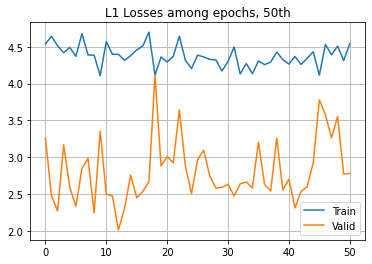

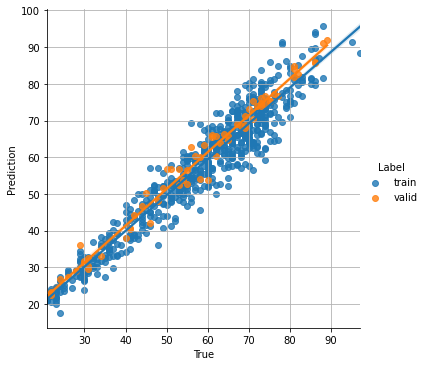

FOLD 5
EPOCHS 51
RMSE :: [TRAIN] 4.425 | [VALID] 3.368
CORR :: [TRAIN] 0.961 | [VALID] 0.991
FOLD 5
EPOCHS 52
RMSE :: [TRAIN] 4.419 | [VALID] 2.472
CORR :: [TRAIN] 0.963 | [VALID] 0.991
FOLD 5
EPOCHS 53
RMSE :: [TRAIN] 4.279 | [VALID] 2.825
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 5
EPOCHS 54
RMSE :: [TRAIN] 4.620 | [VALID] 3.121
CORR :: [TRAIN] 0.958 | [VALID] 0.987
FOLD 5
EPOCHS 55
RMSE :: [TRAIN] 4.619 | [VALID] 2.559
CORR :: [TRAIN] 0.959 | [VALID] 0.990
FOLD 5
EPOCHS 56
RMSE :: [TRAIN] 4.377 | [VALID] 2.881
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 5
EPOCHS 57
RMSE :: [TRAIN] 4.292 | [VALID] 2.599
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 5
EPOCHS 58
RMSE :: [TRAIN] 4.341 | [VALID] 2.174
CORR :: [TRAIN] 0.963 | [VALID] 0.993
FOLD 5
EPOCHS 59
RMSE :: [TRAIN] 4.267 | [VALID] 3.120
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 5
EPOCHS 60
RMSE :: [TRAIN] 4.210 | [VALID] 3.975
CORR :: [TRAIN] 0.964 | [VALID] 0.988


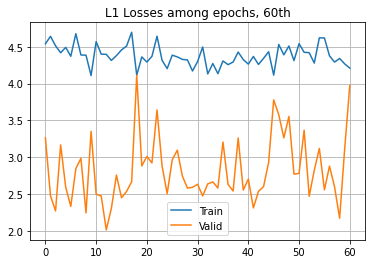

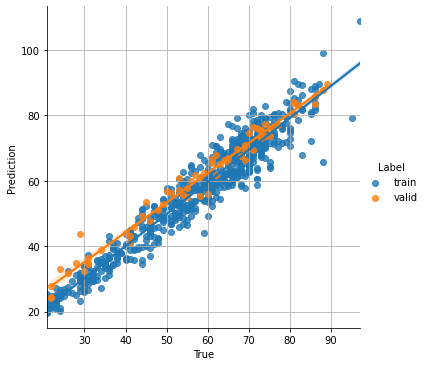

FOLD 5
EPOCHS 61
RMSE :: [TRAIN] 4.519 | [VALID] 2.876
CORR :: [TRAIN] 0.961 | [VALID] 0.992
FOLD 5
EPOCHS 62
RMSE :: [TRAIN] 4.216 | [VALID] 3.089
CORR :: [TRAIN] 0.967 | [VALID] 0.988
FOLD 5
EPOCHS 63
RMSE :: [TRAIN] 4.580 | [VALID] 2.608
CORR :: [TRAIN] 0.959 | [VALID] 0.990
FOLD 5
EPOCHS 64
RMSE :: [TRAIN] 4.609 | [VALID] 3.133
CORR :: [TRAIN] 0.959 | [VALID] 0.986
FOLD 5
EPOCHS 65
RMSE :: [TRAIN] 4.231 | [VALID] 2.516
CORR :: [TRAIN] 0.966 | [VALID] 0.992
FOLD 5
EPOCHS 66
RMSE :: [TRAIN] 4.318 | [VALID] 2.531
CORR :: [TRAIN] 0.964 | [VALID] 0.991
FOLD 5
EPOCHS 67
RMSE :: [TRAIN] 4.399 | [VALID] 3.244
CORR :: [TRAIN] 0.963 | [VALID] 0.990
FOLD 5
EPOCHS 68
RMSE :: [TRAIN] 4.392 | [VALID] 2.509
CORR :: [TRAIN] 0.963 | [VALID] 0.991
FOLD 5
EPOCHS 69
RMSE :: [TRAIN] 4.509 | [VALID] 2.944
CORR :: [TRAIN] 0.962 | [VALID] 0.988
FOLD 5
EPOCHS 70
RMSE :: [TRAIN] 4.070 | [VALID] 2.696
CORR :: [TRAIN] 0.968 | [VALID] 0.991


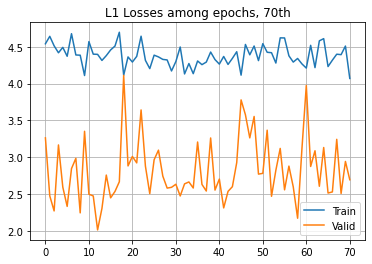

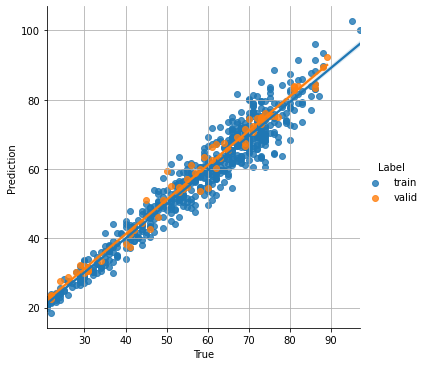

FOLD 5
EPOCHS 71
RMSE :: [TRAIN] 4.245 | [VALID] 2.810
CORR :: [TRAIN] 0.964 | [VALID] 0.989
FOLD 5
EPOCHS 72
RMSE :: [TRAIN] 4.299 | [VALID] 3.425
CORR :: [TRAIN] 0.965 | [VALID] 0.984
FOLD 5
EPOCHS 73
RMSE :: [TRAIN] 4.322 | [VALID] 3.619
CORR :: [TRAIN] 0.964 | [VALID] 0.984
FOLD 5
EPOCHS 74
RMSE :: [TRAIN] 4.452 | [VALID] 3.033
CORR :: [TRAIN] 0.962 | [VALID] 0.987
FOLD 5
EPOCHS 75
RMSE :: [TRAIN] 4.246 | [VALID] 3.129
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 5
EPOCHS 76
RMSE :: [TRAIN] 4.165 | [VALID] 3.385
CORR :: [TRAIN] 0.966 | [VALID] 0.986
FOLD 5
EPOCHS 77
RMSE :: [TRAIN] 4.369 | [VALID] 2.886
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 5
EPOCHS 78
RMSE :: [TRAIN] 4.214 | [VALID] 3.261
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 5
EPOCHS 79
RMSE :: [TRAIN] 4.021 | [VALID] 2.947
CORR :: [TRAIN] 0.968 | [VALID] 0.988
FOLD 5
EPOCHS 80
RMSE :: [TRAIN] 4.195 | [VALID] 3.337
CORR :: [TRAIN] 0.966 | [VALID] 0.987


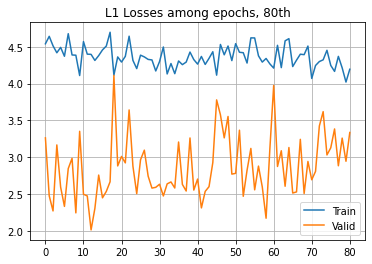

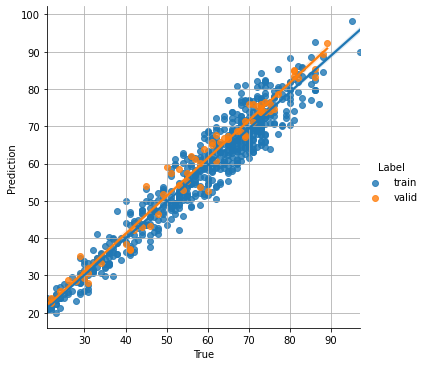

FOLD 5
EPOCHS 81
RMSE :: [TRAIN] 4.210 | [VALID] 3.045
CORR :: [TRAIN] 0.966 | [VALID] 0.987
FOLD 5
EPOCHS 82
RMSE :: [TRAIN] 4.126 | [VALID] 3.143
CORR :: [TRAIN] 0.967 | [VALID] 0.989
FOLD 5
EPOCHS 83
RMSE :: [TRAIN] 4.447 | [VALID] 3.216
CORR :: [TRAIN] 0.961 | [VALID] 0.985
FOLD 5
EPOCHS 84
RMSE :: [TRAIN] 4.376 | [VALID] 3.082
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 5
EPOCHS 85
RMSE :: [TRAIN] 4.129 | [VALID] 3.351
CORR :: [TRAIN] 0.968 | [VALID] 0.987
FOLD 5
EPOCHS 86
RMSE :: [TRAIN] 4.436 | [VALID] 3.081
CORR :: [TRAIN] 0.961 | [VALID] 0.988
FOLD 5
EPOCHS 87
RMSE :: [TRAIN] 4.441 | [VALID] 2.827
CORR :: [TRAIN] 0.962 | [VALID] 0.989
FOLD 5
EPOCHS 88
RMSE :: [TRAIN] 4.243 | [VALID] 3.115
CORR :: [TRAIN] 0.964 | [VALID] 0.985
FOLD 5
EPOCHS 89
RMSE :: [TRAIN] 4.551 | [VALID] 3.054
CORR :: [TRAIN] 0.959 | [VALID] 0.986
FOLD 5
EPOCHS 90
RMSE :: [TRAIN] 4.246 | [VALID] 2.924
CORR :: [TRAIN] 0.965 | [VALID] 0.989


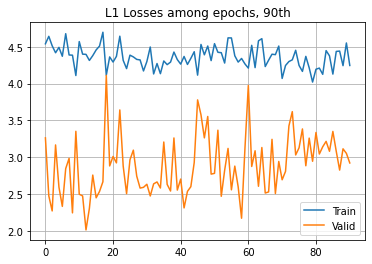

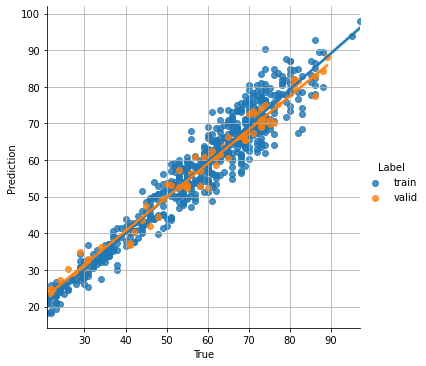

FOLD 5
EPOCHS 91
RMSE :: [TRAIN] 4.234 | [VALID] 3.424
CORR :: [TRAIN] 0.966 | [VALID] 0.983
FOLD 5
EPOCHS 92
RMSE :: [TRAIN] 4.125 | [VALID] 3.135
CORR :: [TRAIN] 0.968 | [VALID] 0.986
FOLD 5
EPOCHS 93
RMSE :: [TRAIN] 4.457 | [VALID] 2.886
CORR :: [TRAIN] 0.962 | [VALID] 0.988
FOLD 5
EPOCHS 94
RMSE :: [TRAIN] 4.163 | [VALID] 3.523
CORR :: [TRAIN] 0.967 | [VALID] 0.983
FOLD 5
EPOCHS 95
RMSE :: [TRAIN] 4.273 | [VALID] 3.637
CORR :: [TRAIN] 0.965 | [VALID] 0.982
FOLD 5
EPOCHS 96
RMSE :: [TRAIN] 4.251 | [VALID] 3.014
CORR :: [TRAIN] 0.964 | [VALID] 0.988
FOLD 5
EPOCHS 97
RMSE :: [TRAIN] 4.257 | [VALID] 2.920
CORR :: [TRAIN] 0.964 | [VALID] 0.988
FOLD 5
EPOCHS 98
RMSE :: [TRAIN] 4.397 | [VALID] 3.447
CORR :: [TRAIN] 0.964 | [VALID] 0.986
FOLD 5
EPOCHS 99
RMSE :: [TRAIN] 4.217 | [VALID] 3.452
CORR :: [TRAIN] 0.966 | [VALID] 0.983
FOLD 5
RMSE :: [TEST] 9.665
CORR :: [TEST] 0.782


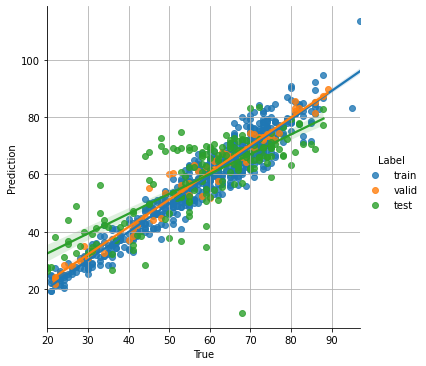

FOLD 6
EPOCHS 0
RMSE :: [TRAIN] 4.417 | [VALID] 1.929
CORR :: [TRAIN] 0.964 | [VALID] 0.993


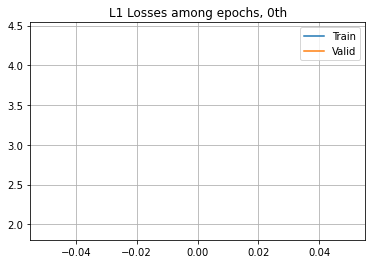

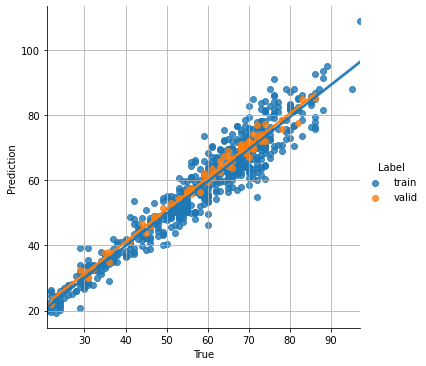

FOLD 6
EPOCHS 1
RMSE :: [TRAIN] 4.393 | [VALID] 2.275
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 6
EPOCHS 2
RMSE :: [TRAIN] 4.501 | [VALID] 1.912
CORR :: [TRAIN] 0.963 | [VALID] 0.992
FOLD 6
EPOCHS 3
RMSE :: [TRAIN] 4.367 | [VALID] 1.876
CORR :: [TRAIN] 0.966 | [VALID] 0.993
FOLD 6
EPOCHS 4
RMSE :: [TRAIN] 4.282 | [VALID] 1.825
CORR :: [TRAIN] 0.966 | [VALID] 0.992
FOLD 6
EPOCHS 5
RMSE :: [TRAIN] 4.263 | [VALID] 2.137
CORR :: [TRAIN] 0.966 | [VALID] 0.992
FOLD 6
EPOCHS 6
RMSE :: [TRAIN] 4.493 | [VALID] 2.418
CORR :: [TRAIN] 0.963 | [VALID] 0.992
FOLD 6
EPOCHS 7
RMSE :: [TRAIN] 4.132 | [VALID] 2.003
CORR :: [TRAIN] 0.968 | [VALID] 0.991
FOLD 6
EPOCHS 8
RMSE :: [TRAIN] 4.227 | [VALID] 1.953
CORR :: [TRAIN] 0.968 | [VALID] 0.991
FOLD 6
EPOCHS 9
RMSE :: [TRAIN] 4.394 | [VALID] 1.914
CORR :: [TRAIN] 0.965 | [VALID] 0.991
FOLD 6
EPOCHS 10
RMSE :: [TRAIN] 4.254 | [VALID] 2.677
CORR :: [TRAIN] 0.966 | [VALID] 0.990


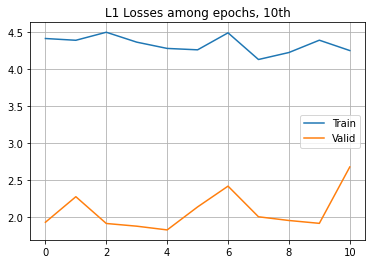

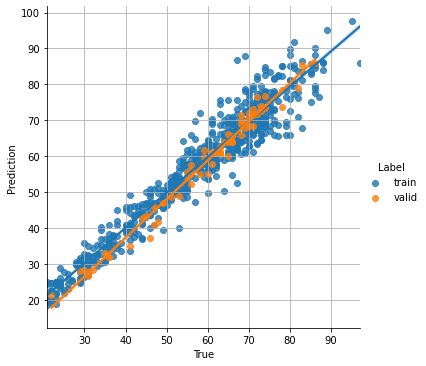

FOLD 6
EPOCHS 11
RMSE :: [TRAIN] 4.147 | [VALID] 1.797
CORR :: [TRAIN] 0.968 | [VALID] 0.992
FOLD 6
EPOCHS 12
RMSE :: [TRAIN] 4.338 | [VALID] 2.249
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 6
EPOCHS 13
RMSE :: [TRAIN] 4.209 | [VALID] 1.887
CORR :: [TRAIN] 0.967 | [VALID] 0.992
FOLD 6
EPOCHS 14
RMSE :: [TRAIN] 4.101 | [VALID] 2.012
CORR :: [TRAIN] 0.968 | [VALID] 0.990
FOLD 6
EPOCHS 15
RMSE :: [TRAIN] 4.086 | [VALID] 1.942
CORR :: [TRAIN] 0.969 | [VALID] 0.991
FOLD 6
EPOCHS 16
RMSE :: [TRAIN] 4.421 | [VALID] 1.717
CORR :: [TRAIN] 0.964 | [VALID] 0.994
FOLD 6
EPOCHS 17
RMSE :: [TRAIN] 4.464 | [VALID] 1.687
CORR :: [TRAIN] 0.963 | [VALID] 0.993
FOLD 6
EPOCHS 18
RMSE :: [TRAIN] 4.320 | [VALID] 2.162
CORR :: [TRAIN] 0.965 | [VALID] 0.993
FOLD 6
EPOCHS 19
RMSE :: [TRAIN] 4.213 | [VALID] 1.803
CORR :: [TRAIN] 0.968 | [VALID] 0.993
FOLD 6
EPOCHS 20
RMSE :: [TRAIN] 4.194 | [VALID] 1.774
CORR :: [TRAIN] 0.967 | [VALID] 0.993


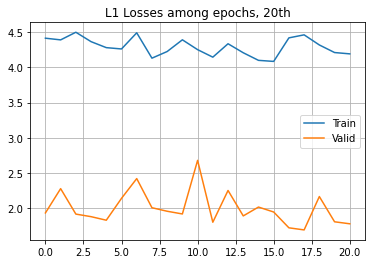

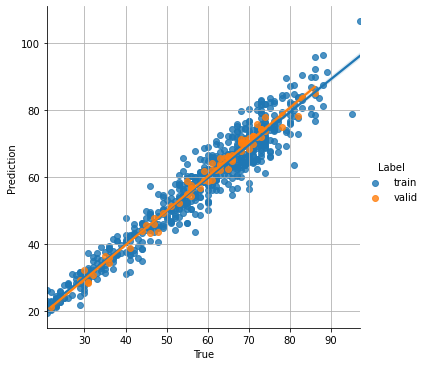

FOLD 6
EPOCHS 21
RMSE :: [TRAIN] 4.515 | [VALID] 2.135
CORR :: [TRAIN] 0.962 | [VALID] 0.991
FOLD 6
EPOCHS 22
RMSE :: [TRAIN] 4.335 | [VALID] 2.758
CORR :: [TRAIN] 0.966 | [VALID] 0.989
FOLD 6
EPOCHS 23
RMSE :: [TRAIN] 4.429 | [VALID] 2.194
CORR :: [TRAIN] 0.963 | [VALID] 0.989
FOLD 6
EPOCHS 24
RMSE :: [TRAIN] 4.529 | [VALID] 2.158
CORR :: [TRAIN] 0.963 | [VALID] 0.992
FOLD 6
EPOCHS 25
RMSE :: [TRAIN] 4.205 | [VALID] 1.836
CORR :: [TRAIN] 0.968 | [VALID] 0.993
FOLD 6
EPOCHS 26
RMSE :: [TRAIN] 4.483 | [VALID] 1.799
CORR :: [TRAIN] 0.963 | [VALID] 0.993
FOLD 6
EPOCHS 27
RMSE :: [TRAIN] 4.179 | [VALID] 1.729
CORR :: [TRAIN] 0.967 | [VALID] 0.993
FOLD 6
EPOCHS 28
RMSE :: [TRAIN] 4.412 | [VALID] 2.007
CORR :: [TRAIN] 0.964 | [VALID] 0.992
FOLD 6
EPOCHS 29
RMSE :: [TRAIN] 4.370 | [VALID] 1.920
CORR :: [TRAIN] 0.965 | [VALID] 0.991
FOLD 6
EPOCHS 30
RMSE :: [TRAIN] 4.449 | [VALID] 2.059
CORR :: [TRAIN] 0.964 | [VALID] 0.990


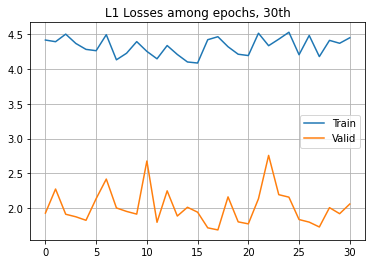

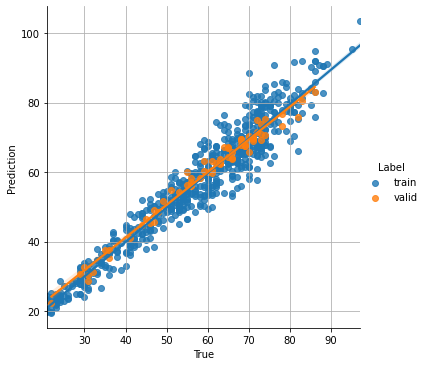

FOLD 6
EPOCHS 31
RMSE :: [TRAIN] 4.126 | [VALID] 2.530
CORR :: [TRAIN] 0.969 | [VALID] 0.991
FOLD 6
EPOCHS 32
RMSE :: [TRAIN] 4.444 | [VALID] 2.600
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 6
EPOCHS 33
RMSE :: [TRAIN] 4.274 | [VALID] 1.878
CORR :: [TRAIN] 0.966 | [VALID] 0.993
FOLD 6
EPOCHS 34
RMSE :: [TRAIN] 4.330 | [VALID] 3.319
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 6
EPOCHS 35
RMSE :: [TRAIN] 4.297 | [VALID] 1.889
CORR :: [TRAIN] 0.966 | [VALID] 0.991
FOLD 6
EPOCHS 36
RMSE :: [TRAIN] 4.255 | [VALID] 2.207
CORR :: [TRAIN] 0.967 | [VALID] 0.989
FOLD 6
EPOCHS 37
RMSE :: [TRAIN] 4.490 | [VALID] 2.249
CORR :: [TRAIN] 0.964 | [VALID] 0.991
FOLD 6
EPOCHS 38
RMSE :: [TRAIN] 4.046 | [VALID] 2.090
CORR :: [TRAIN] 0.970 | [VALID] 0.991
FOLD 6
EPOCHS 39
RMSE :: [TRAIN] 4.255 | [VALID] 1.789
CORR :: [TRAIN] 0.966 | [VALID] 0.993
FOLD 6
EPOCHS 40
RMSE :: [TRAIN] 4.180 | [VALID] 2.054
CORR :: [TRAIN] 0.967 | [VALID] 0.991


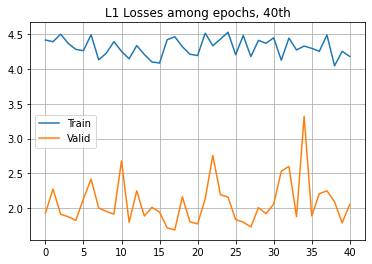

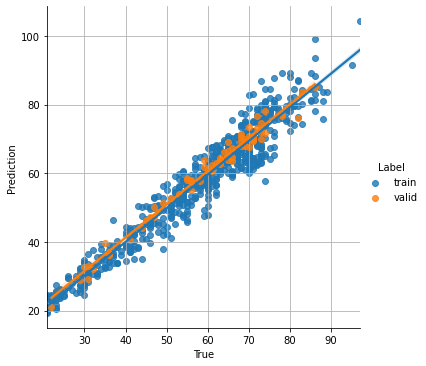

FOLD 6
EPOCHS 41
RMSE :: [TRAIN] 4.478 | [VALID] 1.857
CORR :: [TRAIN] 0.963 | [VALID] 0.993
FOLD 6
EPOCHS 42
RMSE :: [TRAIN] 4.357 | [VALID] 2.467
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 6
EPOCHS 43
RMSE :: [TRAIN] 4.424 | [VALID] 2.202
CORR :: [TRAIN] 0.964 | [VALID] 0.988
FOLD 6
EPOCHS 44
RMSE :: [TRAIN] 4.396 | [VALID] 2.722
CORR :: [TRAIN] 0.964 | [VALID] 0.987
FOLD 6
EPOCHS 45
RMSE :: [TRAIN] 4.473 | [VALID] 2.375
CORR :: [TRAIN] 0.963 | [VALID] 0.991
FOLD 6
EPOCHS 46
RMSE :: [TRAIN] 4.064 | [VALID] 1.829
CORR :: [TRAIN] 0.970 | [VALID] 0.992
FOLD 6
EPOCHS 47
RMSE :: [TRAIN] 4.429 | [VALID] 2.673
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 6
EPOCHS 48
RMSE :: [TRAIN] 4.261 | [VALID] 2.084
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 6
EPOCHS 49
RMSE :: [TRAIN] 4.345 | [VALID] 1.992
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 6
EPOCHS 50
RMSE :: [TRAIN] 4.387 | [VALID] 2.497
CORR :: [TRAIN] 0.966 | [VALID] 0.986


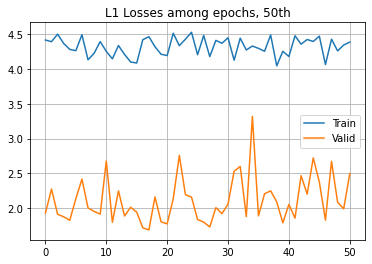

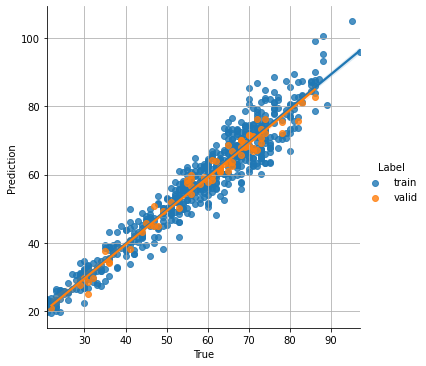

FOLD 6
EPOCHS 51
RMSE :: [TRAIN] 4.208 | [VALID] 2.400
CORR :: [TRAIN] 0.968 | [VALID] 0.986
FOLD 6
EPOCHS 52
RMSE :: [TRAIN] 4.256 | [VALID] 2.499
CORR :: [TRAIN] 0.967 | [VALID] 0.985
FOLD 6
EPOCHS 53
RMSE :: [TRAIN] 4.029 | [VALID] 2.247
CORR :: [TRAIN] 0.971 | [VALID] 0.988
FOLD 6
EPOCHS 54
RMSE :: [TRAIN] 4.249 | [VALID] 2.113
CORR :: [TRAIN] 0.967 | [VALID] 0.993
FOLD 6
EPOCHS 55
RMSE :: [TRAIN] 4.330 | [VALID] 2.320
CORR :: [TRAIN] 0.965 | [VALID] 0.988
FOLD 6
EPOCHS 56
RMSE :: [TRAIN] 4.187 | [VALID] 2.245
CORR :: [TRAIN] 0.968 | [VALID] 0.989
FOLD 6
EPOCHS 57
RMSE :: [TRAIN] 4.115 | [VALID] 2.350
CORR :: [TRAIN] 0.969 | [VALID] 0.987
FOLD 6
EPOCHS 58
RMSE :: [TRAIN] 4.220 | [VALID] 2.776
CORR :: [TRAIN] 0.968 | [VALID] 0.986
FOLD 6
EPOCHS 59
RMSE :: [TRAIN] 4.326 | [VALID] 1.984
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 6
EPOCHS 60
RMSE :: [TRAIN] 4.335 | [VALID] 2.192
CORR :: [TRAIN] 0.966 | [VALID] 0.988


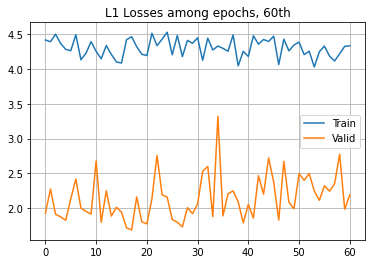

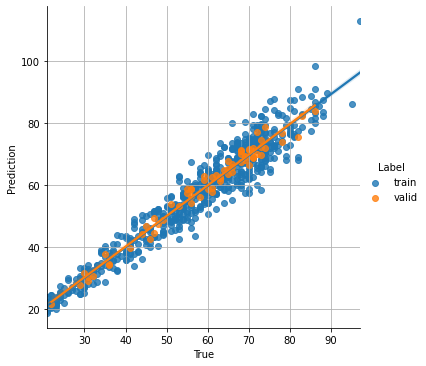

FOLD 6
EPOCHS 61
RMSE :: [TRAIN] 4.063 | [VALID] 2.366
CORR :: [TRAIN] 0.970 | [VALID] 0.989
FOLD 6
EPOCHS 62
RMSE :: [TRAIN] 4.518 | [VALID] 2.113
CORR :: [TRAIN] 0.963 | [VALID] 0.989
FOLD 6
EPOCHS 63
RMSE :: [TRAIN] 4.112 | [VALID] 2.025
CORR :: [TRAIN] 0.969 | [VALID] 0.990
FOLD 6
EPOCHS 64
RMSE :: [TRAIN] 4.260 | [VALID] 2.907
CORR :: [TRAIN] 0.968 | [VALID] 0.983
FOLD 6
EPOCHS 65
RMSE :: [TRAIN] 4.509 | [VALID] 2.140
CORR :: [TRAIN] 0.962 | [VALID] 0.990
FOLD 6
EPOCHS 66
RMSE :: [TRAIN] 4.137 | [VALID] 2.639
CORR :: [TRAIN] 0.968 | [VALID] 0.986
FOLD 6
EPOCHS 67
RMSE :: [TRAIN] 4.512 | [VALID] 2.649
CORR :: [TRAIN] 0.962 | [VALID] 0.984
FOLD 6
EPOCHS 68
RMSE :: [TRAIN] 4.285 | [VALID] 2.647
CORR :: [TRAIN] 0.967 | [VALID] 0.983
FOLD 6
EPOCHS 69
RMSE :: [TRAIN] 4.227 | [VALID] 2.480
CORR :: [TRAIN] 0.967 | [VALID] 0.986
FOLD 6
EPOCHS 70
RMSE :: [TRAIN] 4.023 | [VALID] 2.476
CORR :: [TRAIN] 0.970 | [VALID] 0.985


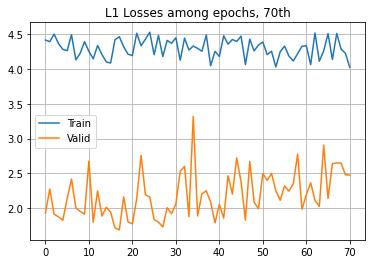

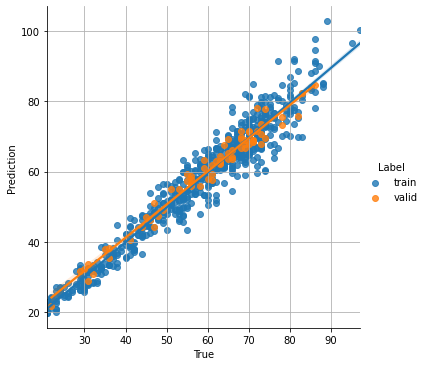

FOLD 6
EPOCHS 71
RMSE :: [TRAIN] 4.162 | [VALID] 2.280
CORR :: [TRAIN] 0.969 | [VALID] 0.987
FOLD 6
EPOCHS 72
RMSE :: [TRAIN] 4.214 | [VALID] 2.495
CORR :: [TRAIN] 0.968 | [VALID] 0.985
FOLD 6
EPOCHS 73
RMSE :: [TRAIN] 4.001 | [VALID] 2.501
CORR :: [TRAIN] 0.971 | [VALID] 0.986
FOLD 6
EPOCHS 74
RMSE :: [TRAIN] 4.262 | [VALID] 2.340
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 6
EPOCHS 75
RMSE :: [TRAIN] 4.243 | [VALID] 2.327
CORR :: [TRAIN] 0.967 | [VALID] 0.990
FOLD 6
EPOCHS 76
RMSE :: [TRAIN] 4.401 | [VALID] 2.471
CORR :: [TRAIN] 0.965 | [VALID] 0.985
FOLD 6
EPOCHS 77
RMSE :: [TRAIN] 4.142 | [VALID] 2.422
CORR :: [TRAIN] 0.968 | [VALID] 0.987
FOLD 6
EPOCHS 78
RMSE :: [TRAIN] 4.243 | [VALID] 2.505
CORR :: [TRAIN] 0.968 | [VALID] 0.985
FOLD 6
EPOCHS 79
RMSE :: [TRAIN] 4.341 | [VALID] 2.385
CORR :: [TRAIN] 0.965 | [VALID] 0.986
FOLD 6
EPOCHS 80
RMSE :: [TRAIN] 4.150 | [VALID] 2.428
CORR :: [TRAIN] 0.968 | [VALID] 0.988


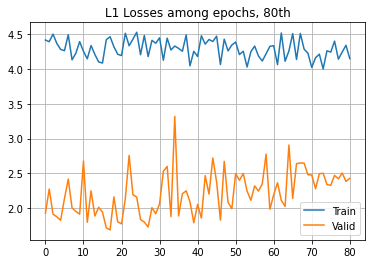

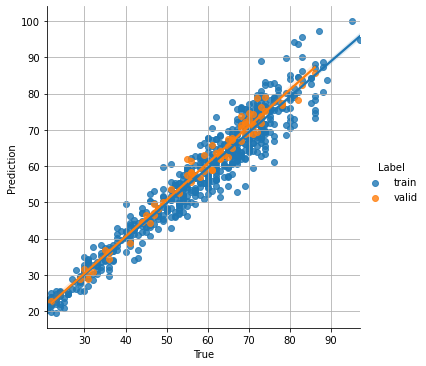

FOLD 6
EPOCHS 81
RMSE :: [TRAIN] 4.404 | [VALID] 2.688
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 6
EPOCHS 82
RMSE :: [TRAIN] 4.520 | [VALID] 2.839
CORR :: [TRAIN] 0.962 | [VALID] 0.987
FOLD 6
EPOCHS 83
RMSE :: [TRAIN] 4.189 | [VALID] 2.209
CORR :: [TRAIN] 0.968 | [VALID] 0.988
FOLD 6
EPOCHS 84
RMSE :: [TRAIN] 4.234 | [VALID] 2.314
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 6
EPOCHS 85
RMSE :: [TRAIN] 4.347 | [VALID] 3.312
CORR :: [TRAIN] 0.966 | [VALID] 0.984
FOLD 6
EPOCHS 86
RMSE :: [TRAIN] 4.272 | [VALID] 2.710
CORR :: [TRAIN] 0.967 | [VALID] 0.985
FOLD 6
EPOCHS 87
RMSE :: [TRAIN] 4.451 | [VALID] 2.249
CORR :: [TRAIN] 0.963 | [VALID] 0.988
FOLD 6
EPOCHS 88
RMSE :: [TRAIN] 4.266 | [VALID] 2.623
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 6
EPOCHS 89
RMSE :: [TRAIN] 4.358 | [VALID] 2.302
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 6
EPOCHS 90
RMSE :: [TRAIN] 4.611 | [VALID] 2.351
CORR :: [TRAIN] 0.960 | [VALID] 0.986


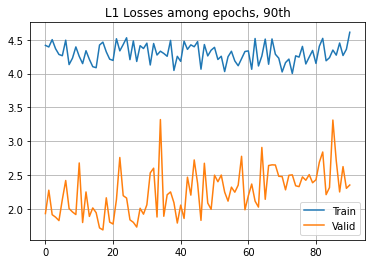

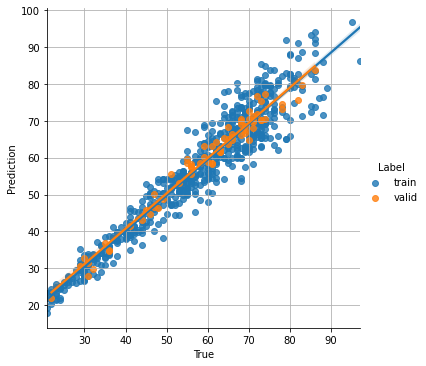

FOLD 6
EPOCHS 91
RMSE :: [TRAIN] 4.280 | [VALID] 2.209
CORR :: [TRAIN] 0.967 | [VALID] 0.988
FOLD 6
EPOCHS 92
RMSE :: [TRAIN] 4.347 | [VALID] 2.687
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 6
EPOCHS 93
RMSE :: [TRAIN] 4.371 | [VALID] 2.696
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 6
EPOCHS 94
RMSE :: [TRAIN] 4.028 | [VALID] 2.858
CORR :: [TRAIN] 0.970 | [VALID] 0.985
FOLD 6
EPOCHS 95
RMSE :: [TRAIN] 4.358 | [VALID] 2.993
CORR :: [TRAIN] 0.964 | [VALID] 0.982
FOLD 6
EPOCHS 96
RMSE :: [TRAIN] 4.267 | [VALID] 2.222
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 6
EPOCHS 97
RMSE :: [TRAIN] 4.236 | [VALID] 2.250
CORR :: [TRAIN] 0.968 | [VALID] 0.988
FOLD 6
EPOCHS 98
RMSE :: [TRAIN] 4.070 | [VALID] 2.456
CORR :: [TRAIN] 0.969 | [VALID] 0.988
FOLD 6
EPOCHS 99
RMSE :: [TRAIN] 4.354 | [VALID] 2.601
CORR :: [TRAIN] 0.966 | [VALID] 0.985
FOLD 6
RMSE :: [TEST] 9.490
CORR :: [TEST] 0.790


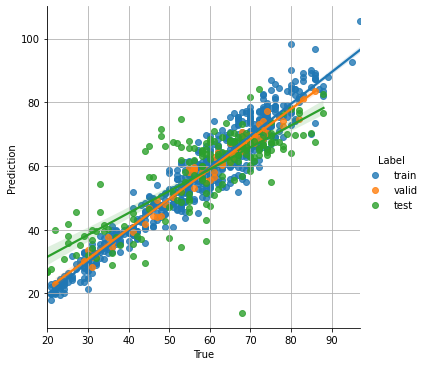

FOLD 7
EPOCHS 0
RMSE :: [TRAIN] 4.248 | [VALID] 2.188
CORR :: [TRAIN] 0.965 | [VALID] 0.991


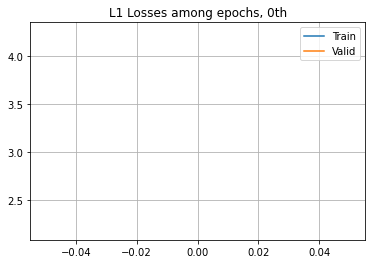

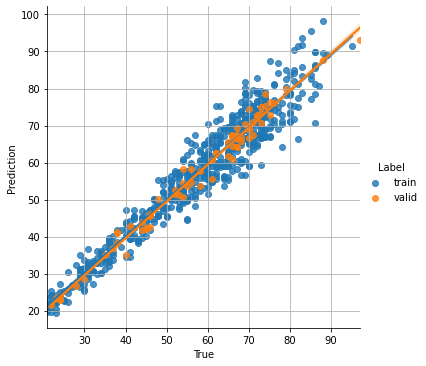

FOLD 7
EPOCHS 1
RMSE :: [TRAIN] 3.966 | [VALID] 2.688
CORR :: [TRAIN] 0.971 | [VALID] 0.989
FOLD 7
EPOCHS 2
RMSE :: [TRAIN] 4.224 | [VALID] 2.355
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 7
EPOCHS 3
RMSE :: [TRAIN] 4.076 | [VALID] 2.417
CORR :: [TRAIN] 0.969 | [VALID] 0.990
FOLD 7
EPOCHS 4
RMSE :: [TRAIN] 4.205 | [VALID] 2.412
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 7
EPOCHS 5
RMSE :: [TRAIN] 4.147 | [VALID] 2.504
CORR :: [TRAIN] 0.968 | [VALID] 0.991
FOLD 7
EPOCHS 6
RMSE :: [TRAIN] 4.341 | [VALID] 2.617
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 7
EPOCHS 7
RMSE :: [TRAIN] 4.619 | [VALID] 2.508
CORR :: [TRAIN] 0.959 | [VALID] 0.990
FOLD 7
EPOCHS 8
RMSE :: [TRAIN] 4.129 | [VALID] 2.783
CORR :: [TRAIN] 0.968 | [VALID] 0.987
FOLD 7
EPOCHS 9
RMSE :: [TRAIN] 4.238 | [VALID] 3.131
CORR :: [TRAIN] 0.966 | [VALID] 0.987
FOLD 7
EPOCHS 10
RMSE :: [TRAIN] 4.462 | [VALID] 2.478
CORR :: [TRAIN] 0.962 | [VALID] 0.989


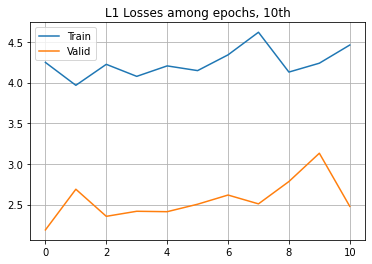

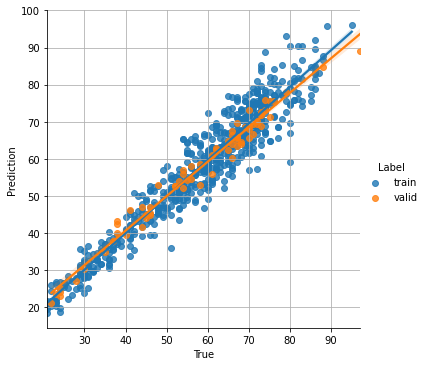

FOLD 7
EPOCHS 11
RMSE :: [TRAIN] 4.520 | [VALID] 2.695
CORR :: [TRAIN] 0.962 | [VALID] 0.989
FOLD 7
EPOCHS 12
RMSE :: [TRAIN] 4.369 | [VALID] 2.356
CORR :: [TRAIN] 0.963 | [VALID] 0.991
FOLD 7
EPOCHS 13
RMSE :: [TRAIN] 4.306 | [VALID] 2.352
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 7
EPOCHS 14
RMSE :: [TRAIN] 4.305 | [VALID] 2.186
CORR :: [TRAIN] 0.966 | [VALID] 0.992
FOLD 7
EPOCHS 15
RMSE :: [TRAIN] 4.391 | [VALID] 2.523
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 7
EPOCHS 16
RMSE :: [TRAIN] 4.221 | [VALID] 2.321
CORR :: [TRAIN] 0.967 | [VALID] 0.990
FOLD 7
EPOCHS 17
RMSE :: [TRAIN] 4.353 | [VALID] 2.562
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 7
EPOCHS 18
RMSE :: [TRAIN] 4.064 | [VALID] 2.208
CORR :: [TRAIN] 0.969 | [VALID] 0.990
FOLD 7
EPOCHS 19
RMSE :: [TRAIN] 4.135 | [VALID] 3.345
CORR :: [TRAIN] 0.969 | [VALID] 0.984
FOLD 7
EPOCHS 20
RMSE :: [TRAIN] 4.398 | [VALID] 2.665
CORR :: [TRAIN] 0.964 | [VALID] 0.988


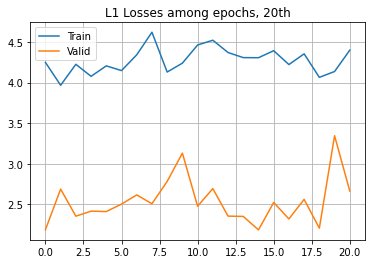

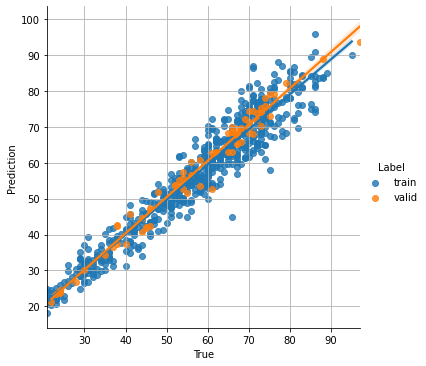

FOLD 7
EPOCHS 21
RMSE :: [TRAIN] 4.095 | [VALID] 2.416
CORR :: [TRAIN] 0.968 | [VALID] 0.990
FOLD 7
EPOCHS 22
RMSE :: [TRAIN] 4.397 | [VALID] 2.397
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 7
EPOCHS 23
RMSE :: [TRAIN] 4.429 | [VALID] 2.295
CORR :: [TRAIN] 0.963 | [VALID] 0.991
FOLD 7
EPOCHS 24
RMSE :: [TRAIN] 4.162 | [VALID] 2.377
CORR :: [TRAIN] 0.967 | [VALID] 0.990
FOLD 7
EPOCHS 25
RMSE :: [TRAIN] 4.199 | [VALID] 3.093
CORR :: [TRAIN] 0.966 | [VALID] 0.987
FOLD 7
EPOCHS 26
RMSE :: [TRAIN] 4.466 | [VALID] 2.760
CORR :: [TRAIN] 0.964 | [VALID] 0.987
FOLD 7
EPOCHS 27
RMSE :: [TRAIN] 4.105 | [VALID] 3.217
CORR :: [TRAIN] 0.969 | [VALID] 0.988
FOLD 7
EPOCHS 28
RMSE :: [TRAIN] 4.178 | [VALID] 2.583
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 7
EPOCHS 29
RMSE :: [TRAIN] 4.322 | [VALID] 2.450
CORR :: [TRAIN] 0.964 | [VALID] 0.989
FOLD 7
EPOCHS 30
RMSE :: [TRAIN] 4.307 | [VALID] 2.402
CORR :: [TRAIN] 0.965 | [VALID] 0.990


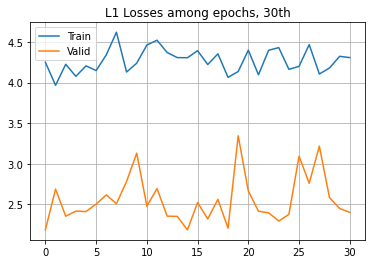

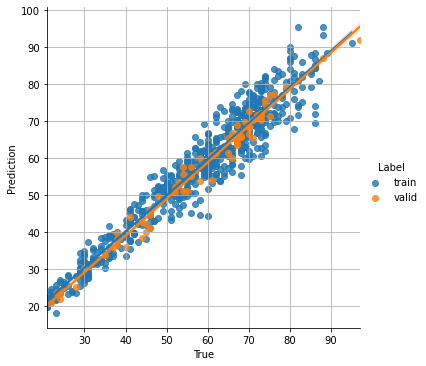

FOLD 7
EPOCHS 31
RMSE :: [TRAIN] 4.331 | [VALID] 2.422
CORR :: [TRAIN] 0.965 | [VALID] 0.991
FOLD 7
EPOCHS 32
RMSE :: [TRAIN] 4.260 | [VALID] 2.340
CORR :: [TRAIN] 0.966 | [VALID] 0.989
FOLD 7
EPOCHS 33
RMSE :: [TRAIN] 4.274 | [VALID] 2.455
CORR :: [TRAIN] 0.967 | [VALID] 0.989
FOLD 7
EPOCHS 34
RMSE :: [TRAIN] 4.297 | [VALID] 2.481
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 7
EPOCHS 35
RMSE :: [TRAIN] 4.285 | [VALID] 2.779
CORR :: [TRAIN] 0.965 | [VALID] 0.988
FOLD 7
EPOCHS 36
RMSE :: [TRAIN] 4.348 | [VALID] 2.469
CORR :: [TRAIN] 0.965 | [VALID] 0.988
FOLD 7
EPOCHS 37
RMSE :: [TRAIN] 4.150 | [VALID] 2.396
CORR :: [TRAIN] 0.968 | [VALID] 0.989
FOLD 7
EPOCHS 38
RMSE :: [TRAIN] 4.339 | [VALID] 2.455
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 7
EPOCHS 39
RMSE :: [TRAIN] 4.362 | [VALID] 2.458
CORR :: [TRAIN] 0.963 | [VALID] 0.990
FOLD 7
EPOCHS 40
RMSE :: [TRAIN] 4.348 | [VALID] 2.885
CORR :: [TRAIN] 0.965 | [VALID] 0.987


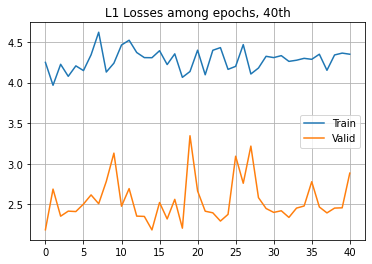

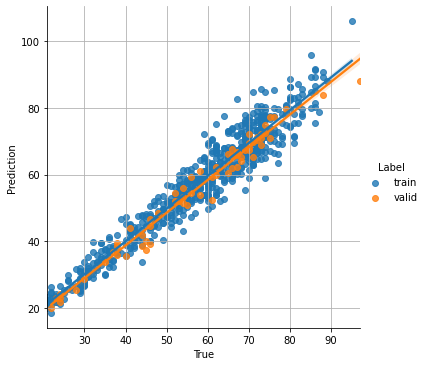

FOLD 7
EPOCHS 41
RMSE :: [TRAIN] 4.398 | [VALID] 2.470
CORR :: [TRAIN] 0.964 | [VALID] 0.989
FOLD 7
EPOCHS 42
RMSE :: [TRAIN] 4.218 | [VALID] 2.290
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 7
EPOCHS 43
RMSE :: [TRAIN] 4.286 | [VALID] 2.425
CORR :: [TRAIN] 0.964 | [VALID] 0.989
FOLD 7
EPOCHS 44
RMSE :: [TRAIN] 4.251 | [VALID] 2.648
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 7
EPOCHS 45
RMSE :: [TRAIN] 4.300 | [VALID] 2.579
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 7
EPOCHS 46
RMSE :: [TRAIN] 4.293 | [VALID] 2.874
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 7
EPOCHS 47
RMSE :: [TRAIN] 4.165 | [VALID] 2.483
CORR :: [TRAIN] 0.967 | [VALID] 0.988
FOLD 7
EPOCHS 48
RMSE :: [TRAIN] 4.192 | [VALID] 2.654
CORR :: [TRAIN] 0.966 | [VALID] 0.987
FOLD 7
EPOCHS 49
RMSE :: [TRAIN] 4.180 | [VALID] 2.911
CORR :: [TRAIN] 0.967 | [VALID] 0.985
FOLD 7
EPOCHS 50
RMSE :: [TRAIN] 4.154 | [VALID] 3.038
CORR :: [TRAIN] 0.968 | [VALID] 0.985


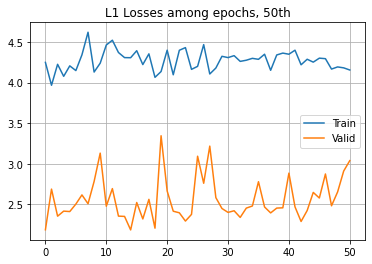

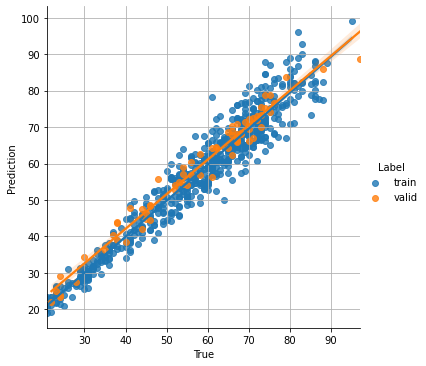

FOLD 7
EPOCHS 51
RMSE :: [TRAIN] 4.463 | [VALID] 2.691
CORR :: [TRAIN] 0.963 | [VALID] 0.987
FOLD 7
EPOCHS 52
RMSE :: [TRAIN] 4.384 | [VALID] 2.725
CORR :: [TRAIN] 0.964 | [VALID] 0.986
FOLD 7
EPOCHS 53
RMSE :: [TRAIN] 4.237 | [VALID] 2.751
CORR :: [TRAIN] 0.966 | [VALID] 0.985
FOLD 7
EPOCHS 54
RMSE :: [TRAIN] 4.145 | [VALID] 2.618
CORR :: [TRAIN] 0.968 | [VALID] 0.988
FOLD 7
EPOCHS 55
RMSE :: [TRAIN] 4.597 | [VALID] 2.712
CORR :: [TRAIN] 0.961 | [VALID] 0.988
FOLD 7
EPOCHS 56
RMSE :: [TRAIN] 4.365 | [VALID] 2.574
CORR :: [TRAIN] 0.965 | [VALID] 0.988
FOLD 7
EPOCHS 57
RMSE :: [TRAIN] 4.425 | [VALID] 2.602
CORR :: [TRAIN] 0.963 | [VALID] 0.987
FOLD 7
EPOCHS 58
RMSE :: [TRAIN] 4.033 | [VALID] 2.793
CORR :: [TRAIN] 0.969 | [VALID] 0.988
FOLD 7
EPOCHS 59
RMSE :: [TRAIN] 4.440 | [VALID] 2.573
CORR :: [TRAIN] 0.963 | [VALID] 0.987
FOLD 7
EPOCHS 60
RMSE :: [TRAIN] 4.509 | [VALID] 2.552
CORR :: [TRAIN] 0.962 | [VALID] 0.987


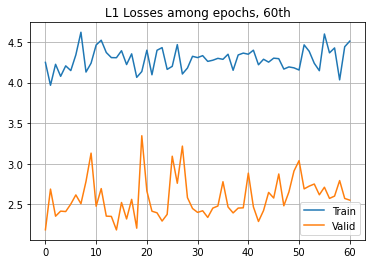

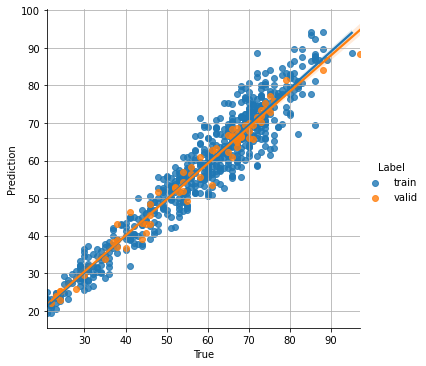

FOLD 7
EPOCHS 61
RMSE :: [TRAIN] 4.139 | [VALID] 2.414
CORR :: [TRAIN] 0.968 | [VALID] 0.988
FOLD 7
EPOCHS 62
RMSE :: [TRAIN] 4.456 | [VALID] 2.903
CORR :: [TRAIN] 0.963 | [VALID] 0.985
FOLD 7
EPOCHS 63
RMSE :: [TRAIN] 4.252 | [VALID] 2.665
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 7
EPOCHS 64
RMSE :: [TRAIN] 4.123 | [VALID] 3.437
CORR :: [TRAIN] 0.968 | [VALID] 0.986
FOLD 7
EPOCHS 65
RMSE :: [TRAIN] 4.246 | [VALID] 3.028
CORR :: [TRAIN] 0.965 | [VALID] 0.986
FOLD 7
EPOCHS 66
RMSE :: [TRAIN] 4.262 | [VALID] 2.806
CORR :: [TRAIN] 0.966 | [VALID] 0.984
FOLD 7
EPOCHS 67
RMSE :: [TRAIN] 4.233 | [VALID] 2.513
CORR :: [TRAIN] 0.967 | [VALID] 0.988
FOLD 7
EPOCHS 68
RMSE :: [TRAIN] 4.184 | [VALID] 2.708
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 7
EPOCHS 69
RMSE :: [TRAIN] 4.321 | [VALID] 2.365
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 7
EPOCHS 70
RMSE :: [TRAIN] 4.568 | [VALID] 2.843
CORR :: [TRAIN] 0.960 | [VALID] 0.984


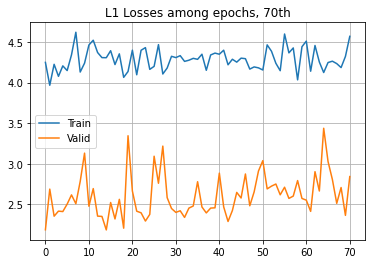

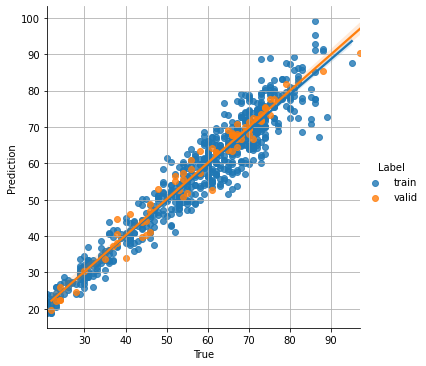

FOLD 7
EPOCHS 71
RMSE :: [TRAIN] 4.097 | [VALID] 2.751
CORR :: [TRAIN] 0.968 | [VALID] 0.985
FOLD 7
EPOCHS 72
RMSE :: [TRAIN] 4.161 | [VALID] 2.617
CORR :: [TRAIN] 0.967 | [VALID] 0.986
FOLD 7
EPOCHS 73
RMSE :: [TRAIN] 4.372 | [VALID] 2.532
CORR :: [TRAIN] 0.964 | [VALID] 0.987
FOLD 7
EPOCHS 74
RMSE :: [TRAIN] 4.324 | [VALID] 3.294
CORR :: [TRAIN] 0.965 | [VALID] 0.985
FOLD 7
EPOCHS 75
RMSE :: [TRAIN] 4.270 | [VALID] 2.779
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 7
EPOCHS 76
RMSE :: [TRAIN] 4.083 | [VALID] 2.788
CORR :: [TRAIN] 0.969 | [VALID] 0.984
FOLD 7
EPOCHS 77
RMSE :: [TRAIN] 4.314 | [VALID] 2.994
CORR :: [TRAIN] 0.965 | [VALID] 0.986
FOLD 7
EPOCHS 78
RMSE :: [TRAIN] 4.301 | [VALID] 3.116
CORR :: [TRAIN] 0.965 | [VALID] 0.984
FOLD 7
EPOCHS 79
RMSE :: [TRAIN] 3.976 | [VALID] 2.968
CORR :: [TRAIN] 0.969 | [VALID] 0.984
FOLD 7
EPOCHS 80
RMSE :: [TRAIN] 4.548 | [VALID] 3.141
CORR :: [TRAIN] 0.962 | [VALID] 0.985


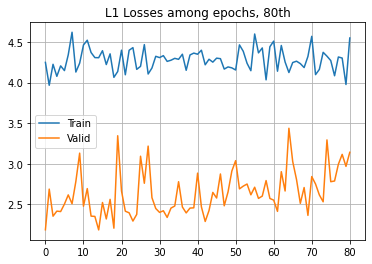

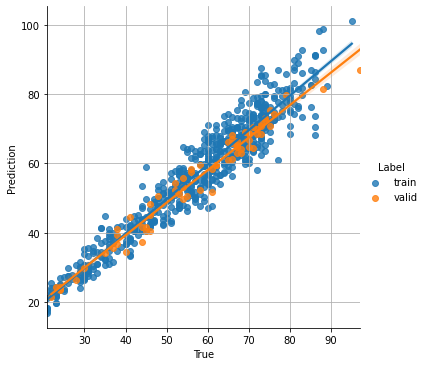

FOLD 7
EPOCHS 81
RMSE :: [TRAIN] 4.226 | [VALID] 3.377
CORR :: [TRAIN] 0.967 | [VALID] 0.985
FOLD 7
EPOCHS 82
RMSE :: [TRAIN] 4.313 | [VALID] 3.416
CORR :: [TRAIN] 0.966 | [VALID] 0.984
FOLD 7
EPOCHS 83
RMSE :: [TRAIN] 4.230 | [VALID] 2.865
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 7
EPOCHS 84
RMSE :: [TRAIN] 4.336 | [VALID] 2.792
CORR :: [TRAIN] 0.965 | [VALID] 0.985
FOLD 7
EPOCHS 85
RMSE :: [TRAIN] 4.316 | [VALID] 2.884
CORR :: [TRAIN] 0.965 | [VALID] 0.986
FOLD 7
EPOCHS 86
RMSE :: [TRAIN] 4.304 | [VALID] 3.001
CORR :: [TRAIN] 0.966 | [VALID] 0.986
FOLD 7
EPOCHS 87
RMSE :: [TRAIN] 4.362 | [VALID] 2.746
CORR :: [TRAIN] 0.964 | [VALID] 0.988
FOLD 7
EPOCHS 88
RMSE :: [TRAIN] 4.284 | [VALID] 2.779
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 7
EPOCHS 89
RMSE :: [TRAIN] 4.293 | [VALID] 2.801
CORR :: [TRAIN] 0.965 | [VALID] 0.988
FOLD 7
EPOCHS 90
RMSE :: [TRAIN] 4.303 | [VALID] 3.236
CORR :: [TRAIN] 0.966 | [VALID] 0.985


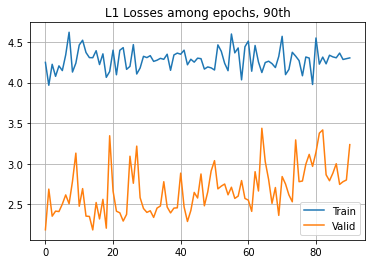

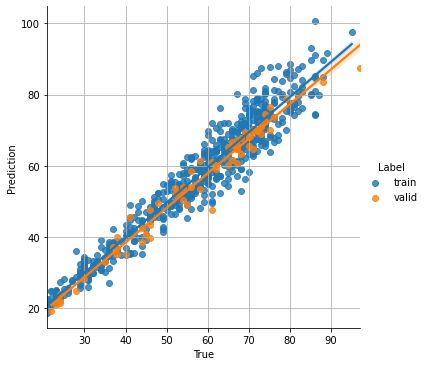

FOLD 7
EPOCHS 91
RMSE :: [TRAIN] 4.213 | [VALID] 3.151
CORR :: [TRAIN] 0.967 | [VALID] 0.986
FOLD 7
EPOCHS 92
RMSE :: [TRAIN] 4.257 | [VALID] 2.945
CORR :: [TRAIN] 0.966 | [VALID] 0.983
FOLD 7
EPOCHS 93
RMSE :: [TRAIN] 4.279 | [VALID] 2.723
CORR :: [TRAIN] 0.966 | [VALID] 0.985
FOLD 7
EPOCHS 94
RMSE :: [TRAIN] 4.106 | [VALID] 2.737
CORR :: [TRAIN] 0.968 | [VALID] 0.985
FOLD 7
EPOCHS 95
RMSE :: [TRAIN] 4.332 | [VALID] 2.838
CORR :: [TRAIN] 0.964 | [VALID] 0.985
FOLD 7
EPOCHS 96
RMSE :: [TRAIN] 4.268 | [VALID] 2.978
CORR :: [TRAIN] 0.966 | [VALID] 0.986
FOLD 7
EPOCHS 97
RMSE :: [TRAIN] 4.564 | [VALID] 3.426
CORR :: [TRAIN] 0.962 | [VALID] 0.983
FOLD 7
EPOCHS 98
RMSE :: [TRAIN] 4.246 | [VALID] 3.058
CORR :: [TRAIN] 0.966 | [VALID] 0.984
FOLD 7
EPOCHS 99
RMSE :: [TRAIN] 4.018 | [VALID] 3.477
CORR :: [TRAIN] 0.969 | [VALID] 0.983
FOLD 7
RMSE :: [TEST] 9.465
CORR :: [TEST] 0.791


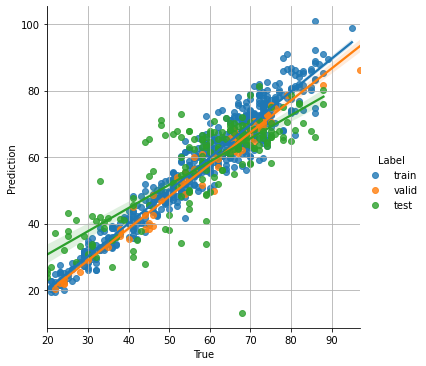

FOLD 8
EPOCHS 0
RMSE :: [TRAIN] 4.215 | [VALID] 2.940
CORR :: [TRAIN] 0.967 | [VALID] 0.989


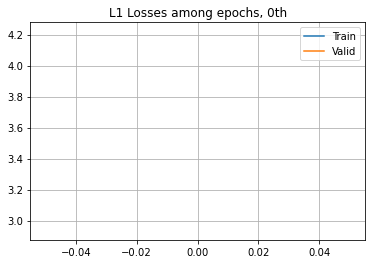

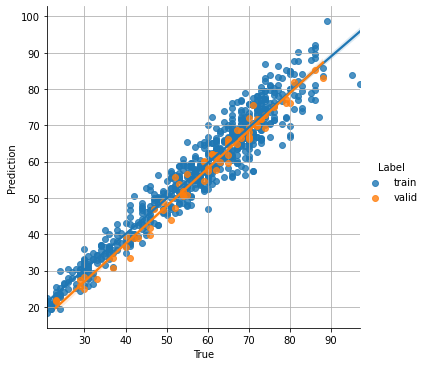

FOLD 8
EPOCHS 1
RMSE :: [TRAIN] 4.126 | [VALID] 2.195
CORR :: [TRAIN] 0.968 | [VALID] 0.992
FOLD 8
EPOCHS 2
RMSE :: [TRAIN] 4.261 | [VALID] 2.058
CORR :: [TRAIN] 0.966 | [VALID] 0.991
FOLD 8
EPOCHS 3
RMSE :: [TRAIN] 4.272 | [VALID] 2.370
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 8
EPOCHS 4
RMSE :: [TRAIN] 4.253 | [VALID] 2.144
CORR :: [TRAIN] 0.966 | [VALID] 0.991
FOLD 8
EPOCHS 5
RMSE :: [TRAIN] 4.121 | [VALID] 2.312
CORR :: [TRAIN] 0.969 | [VALID] 0.990
FOLD 8
EPOCHS 6
RMSE :: [TRAIN] 4.374 | [VALID] 2.176
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 8
EPOCHS 7
RMSE :: [TRAIN] 4.205 | [VALID] 2.314
CORR :: [TRAIN] 0.967 | [VALID] 0.990
FOLD 8
EPOCHS 8
RMSE :: [TRAIN] 4.315 | [VALID] 2.646
CORR :: [TRAIN] 0.966 | [VALID] 0.986
FOLD 8
EPOCHS 9
RMSE :: [TRAIN] 4.048 | [VALID] 2.379
CORR :: [TRAIN] 0.969 | [VALID] 0.989
FOLD 8
EPOCHS 10
RMSE :: [TRAIN] 4.263 | [VALID] 2.382
CORR :: [TRAIN] 0.967 | [VALID] 0.990


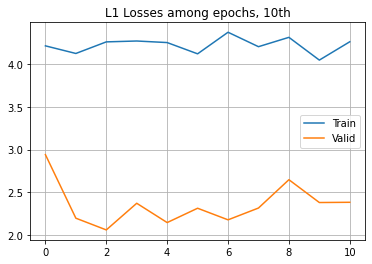

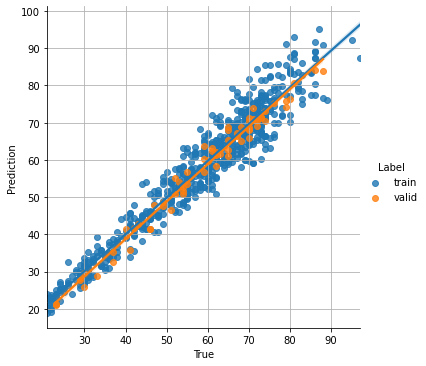

FOLD 8
EPOCHS 11
RMSE :: [TRAIN] 4.336 | [VALID] 2.408
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 8
EPOCHS 12
RMSE :: [TRAIN] 4.338 | [VALID] 2.357
CORR :: [TRAIN] 0.966 | [VALID] 0.989
FOLD 8
EPOCHS 13
RMSE :: [TRAIN] 4.002 | [VALID] 2.124
CORR :: [TRAIN] 0.970 | [VALID] 0.991
FOLD 8
EPOCHS 14
RMSE :: [TRAIN] 4.119 | [VALID] 2.576
CORR :: [TRAIN] 0.969 | [VALID] 0.986
FOLD 8
EPOCHS 15
RMSE :: [TRAIN] 4.381 | [VALID] 2.293
CORR :: [TRAIN] 0.964 | [VALID] 0.988
FOLD 8
EPOCHS 16
RMSE :: [TRAIN] 4.321 | [VALID] 3.216
CORR :: [TRAIN] 0.966 | [VALID] 0.985
FOLD 8
EPOCHS 17
RMSE :: [TRAIN] 4.350 | [VALID] 2.161
CORR :: [TRAIN] 0.965 | [VALID] 0.990
FOLD 8
EPOCHS 18
RMSE :: [TRAIN] 4.141 | [VALID] 2.075
CORR :: [TRAIN] 0.968 | [VALID] 0.989
FOLD 8
EPOCHS 19
RMSE :: [TRAIN] 4.176 | [VALID] 2.451
CORR :: [TRAIN] 0.969 | [VALID] 0.989
FOLD 8
EPOCHS 20
RMSE :: [TRAIN] 4.188 | [VALID] 2.273
CORR :: [TRAIN] 0.968 | [VALID] 0.988


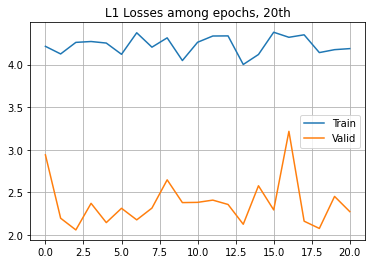

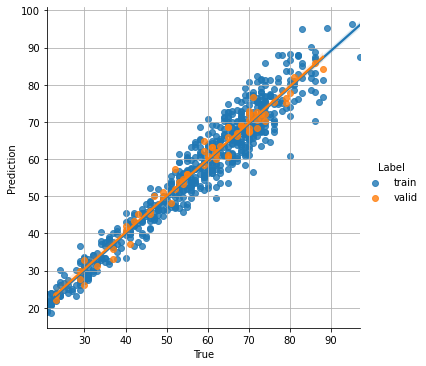

FOLD 8
EPOCHS 21
RMSE :: [TRAIN] 4.303 | [VALID] 2.663
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 8
EPOCHS 22
RMSE :: [TRAIN] 4.187 | [VALID] 2.377
CORR :: [TRAIN] 0.967 | [VALID] 0.988
FOLD 8
EPOCHS 23
RMSE :: [TRAIN] 4.337 | [VALID] 2.479
CORR :: [TRAIN] 0.965 | [VALID] 0.988
FOLD 8
EPOCHS 24
RMSE :: [TRAIN] 4.296 | [VALID] 2.743
CORR :: [TRAIN] 0.965 | [VALID] 0.986
FOLD 8
EPOCHS 25
RMSE :: [TRAIN] 4.190 | [VALID] 2.398
CORR :: [TRAIN] 0.967 | [VALID] 0.989
FOLD 8
EPOCHS 26
RMSE :: [TRAIN] 4.133 | [VALID] 2.428
CORR :: [TRAIN] 0.969 | [VALID] 0.987
FOLD 8
EPOCHS 27
RMSE :: [TRAIN] 4.206 | [VALID] 2.490
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 8
EPOCHS 28
RMSE :: [TRAIN] 4.276 | [VALID] 2.478
CORR :: [TRAIN] 0.966 | [VALID] 0.987
FOLD 8
EPOCHS 29
RMSE :: [TRAIN] 4.393 | [VALID] 2.263
CORR :: [TRAIN] 0.964 | [VALID] 0.990
FOLD 8
EPOCHS 30
RMSE :: [TRAIN] 4.317 | [VALID] 2.001
CORR :: [TRAIN] 0.966 | [VALID] 0.991


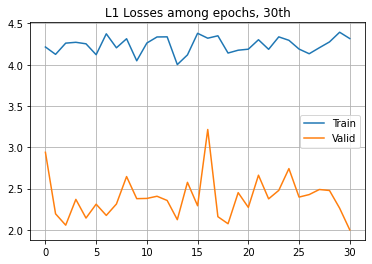

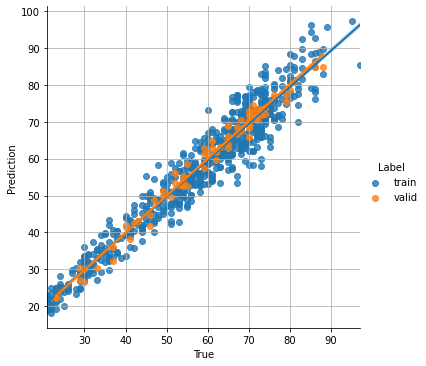

FOLD 8
EPOCHS 31
RMSE :: [TRAIN] 4.041 | [VALID] 2.357
CORR :: [TRAIN] 0.970 | [VALID] 0.990
FOLD 8
EPOCHS 32
RMSE :: [TRAIN] 4.170 | [VALID] 2.465
CORR :: [TRAIN] 0.968 | [VALID] 0.988
FOLD 8
EPOCHS 33
RMSE :: [TRAIN] 4.178 | [VALID] 2.208
CORR :: [TRAIN] 0.967 | [VALID] 0.989
FOLD 8
EPOCHS 34
RMSE :: [TRAIN] 4.220 | [VALID] 2.303
CORR :: [TRAIN] 0.967 | [VALID] 0.988
FOLD 8
EPOCHS 35
RMSE :: [TRAIN] 4.155 | [VALID] 2.635
CORR :: [TRAIN] 0.969 | [VALID] 0.987
FOLD 8
EPOCHS 36
RMSE :: [TRAIN] 4.267 | [VALID] 2.303
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 8
EPOCHS 37
RMSE :: [TRAIN] 4.062 | [VALID] 2.369
CORR :: [TRAIN] 0.969 | [VALID] 0.987
FOLD 8
EPOCHS 38
RMSE :: [TRAIN] 3.868 | [VALID] 2.369
CORR :: [TRAIN] 0.973 | [VALID] 0.987
FOLD 8
EPOCHS 39
RMSE :: [TRAIN] 4.195 | [VALID] 2.108
CORR :: [TRAIN] 0.967 | [VALID] 0.989
FOLD 8
EPOCHS 40
RMSE :: [TRAIN] 4.380 | [VALID] 2.419
CORR :: [TRAIN] 0.965 | [VALID] 0.989


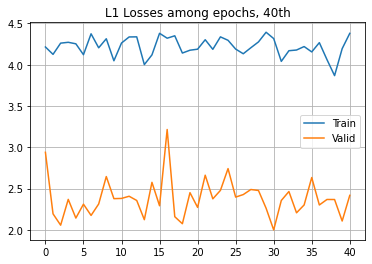

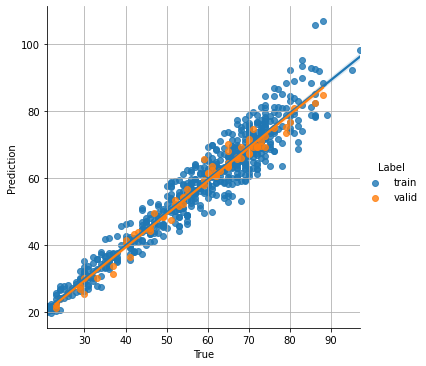

FOLD 8
EPOCHS 41
RMSE :: [TRAIN] 4.230 | [VALID] 2.048
CORR :: [TRAIN] 0.966 | [VALID] 0.990
FOLD 8
EPOCHS 42
RMSE :: [TRAIN] 4.396 | [VALID] 2.480
CORR :: [TRAIN] 0.964 | [VALID] 0.987
FOLD 8
EPOCHS 43
RMSE :: [TRAIN] 4.320 | [VALID] 2.396
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 8
EPOCHS 44
RMSE :: [TRAIN] 4.362 | [VALID] 2.565
CORR :: [TRAIN] 0.965 | [VALID] 0.986
FOLD 8
EPOCHS 45
RMSE :: [TRAIN] 3.956 | [VALID] 2.101
CORR :: [TRAIN] 0.971 | [VALID] 0.991
FOLD 8
EPOCHS 46
RMSE :: [TRAIN] 4.380 | [VALID] 2.256
CORR :: [TRAIN] 0.965 | [VALID] 0.989
FOLD 8
EPOCHS 47
RMSE :: [TRAIN] 4.185 | [VALID] 2.462
CORR :: [TRAIN] 0.969 | [VALID] 0.986
FOLD 8
EPOCHS 48
RMSE :: [TRAIN] 4.109 | [VALID] 2.192
CORR :: [TRAIN] 0.968 | [VALID] 0.988
FOLD 8
EPOCHS 49
RMSE :: [TRAIN] 4.401 | [VALID] 2.304
CORR :: [TRAIN] 0.964 | [VALID] 0.988
FOLD 8
EPOCHS 50
RMSE :: [TRAIN] 4.338 | [VALID] 2.356
CORR :: [TRAIN] 0.965 | [VALID] 0.987


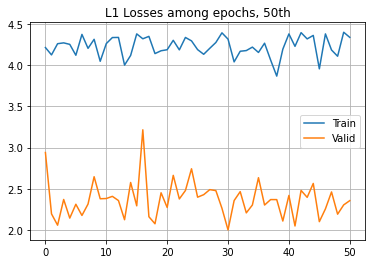

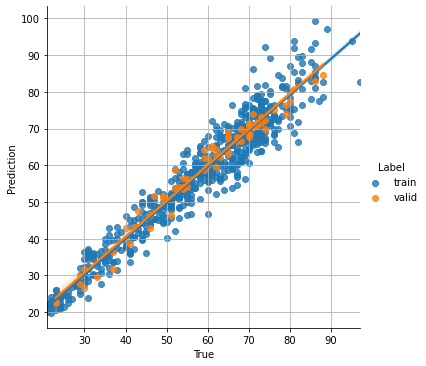

FOLD 8
EPOCHS 51
RMSE :: [TRAIN] 4.154 | [VALID] 2.414
CORR :: [TRAIN] 0.968 | [VALID] 0.987
FOLD 8
EPOCHS 52
RMSE :: [TRAIN] 4.155 | [VALID] 2.661
CORR :: [TRAIN] 0.968 | [VALID] 0.984
FOLD 8
EPOCHS 53
RMSE :: [TRAIN] 4.018 | [VALID] 2.317
CORR :: [TRAIN] 0.970 | [VALID] 0.987
FOLD 8
EPOCHS 54
RMSE :: [TRAIN] 4.089 | [VALID] 2.293
CORR :: [TRAIN] 0.970 | [VALID] 0.988
FOLD 8
EPOCHS 55
RMSE :: [TRAIN] 4.213 | [VALID] 2.562
CORR :: [TRAIN] 0.968 | [VALID] 0.987
FOLD 8
EPOCHS 56
RMSE :: [TRAIN] 4.265 | [VALID] 2.560
CORR :: [TRAIN] 0.966 | [VALID] 0.987
FOLD 8
EPOCHS 57
RMSE :: [TRAIN] 4.484 | [VALID] 2.561
CORR :: [TRAIN] 0.963 | [VALID] 0.987
FOLD 8
EPOCHS 58
RMSE :: [TRAIN] 3.871 | [VALID] 2.550
CORR :: [TRAIN] 0.972 | [VALID] 0.986
FOLD 8
EPOCHS 59
RMSE :: [TRAIN] 4.483 | [VALID] 2.755
CORR :: [TRAIN] 0.963 | [VALID] 0.985
FOLD 8
EPOCHS 60
RMSE :: [TRAIN] 4.093 | [VALID] 2.531
CORR :: [TRAIN] 0.969 | [VALID] 0.986


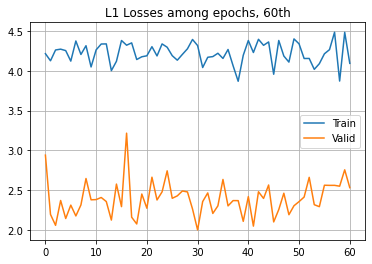

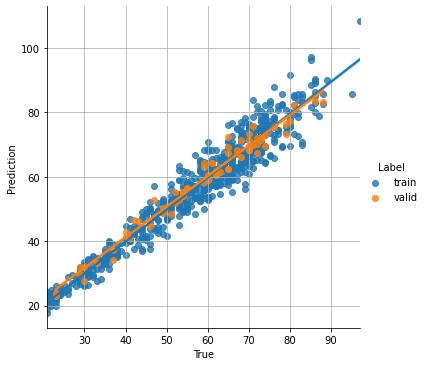

FOLD 8
EPOCHS 61
RMSE :: [TRAIN] 4.197 | [VALID] 2.779
CORR :: [TRAIN] 0.967 | [VALID] 0.985
FOLD 8
EPOCHS 62
RMSE :: [TRAIN] 4.244 | [VALID] 2.367
CORR :: [TRAIN] 0.966 | [VALID] 0.988
FOLD 8
EPOCHS 63
RMSE :: [TRAIN] 4.149 | [VALID] 2.729
CORR :: [TRAIN] 0.968 | [VALID] 0.986
FOLD 8
EPOCHS 64
RMSE :: [TRAIN] 4.063 | [VALID] 2.263
CORR :: [TRAIN] 0.969 | [VALID] 0.988
FOLD 8
EPOCHS 65
RMSE :: [TRAIN] 4.245 | [VALID] 2.382
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 8
EPOCHS 66
RMSE :: [TRAIN] 4.197 | [VALID] 2.375
CORR :: [TRAIN] 0.967 | [VALID] 0.987
FOLD 8
EPOCHS 67
RMSE :: [TRAIN] 4.303 | [VALID] 2.596
CORR :: [TRAIN] 0.965 | [VALID] 0.986
FOLD 8
EPOCHS 68
RMSE :: [TRAIN] 4.444 | [VALID] 2.430
CORR :: [TRAIN] 0.965 | [VALID] 0.987
FOLD 8
EPOCHS 69
RMSE :: [TRAIN] 4.166 | [VALID] 2.584
CORR :: [TRAIN] 0.968 | [VALID] 0.986
FOLD 8
EPOCHS 70
RMSE :: [TRAIN] 4.338 | [VALID] 2.495
CORR :: [TRAIN] 0.966 | [VALID] 0.986


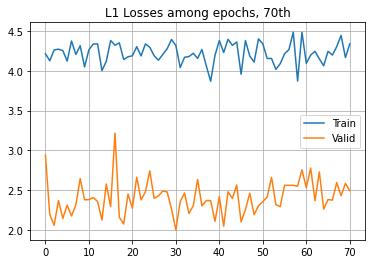

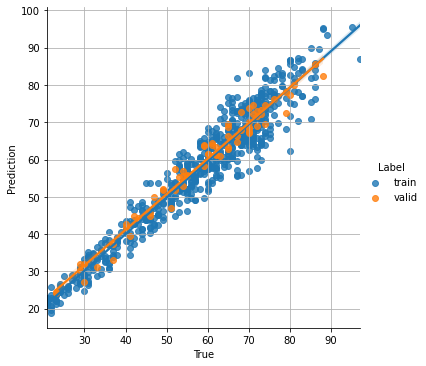

FOLD 8
EPOCHS 71
RMSE :: [TRAIN] 4.088 | [VALID] 2.667
CORR :: [TRAIN] 0.970 | [VALID] 0.985
FOLD 8
EPOCHS 72
RMSE :: [TRAIN] 4.126 | [VALID] 2.430
CORR :: [TRAIN] 0.968 | [VALID] 0.987
FOLD 8
EPOCHS 73
RMSE :: [TRAIN] 4.179 | [VALID] 2.643
CORR :: [TRAIN] 0.967 | [VALID] 0.984
FOLD 8
EPOCHS 74
RMSE :: [TRAIN] 4.160 | [VALID] 2.414
CORR :: [TRAIN] 0.968 | [VALID] 0.987
FOLD 8
EPOCHS 75
RMSE :: [TRAIN] 4.292 | [VALID] 2.932
CORR :: [TRAIN] 0.966 | [VALID] 0.985
FOLD 8
EPOCHS 76
RMSE :: [TRAIN] 4.258 | [VALID] 2.249
CORR :: [TRAIN] 0.967 | [VALID] 0.988
FOLD 8
EPOCHS 77
RMSE :: [TRAIN] 4.043 | [VALID] 2.709
CORR :: [TRAIN] 0.970 | [VALID] 0.986
FOLD 8
EPOCHS 78
RMSE :: [TRAIN] 3.909 | [VALID] 2.862
CORR :: [TRAIN] 0.971 | [VALID] 0.984
FOLD 8
EPOCHS 79
RMSE :: [TRAIN] 3.966 | [VALID] 2.687
CORR :: [TRAIN] 0.971 | [VALID] 0.985
FOLD 8
EPOCHS 80
RMSE :: [TRAIN] 4.223 | [VALID] 2.636
CORR :: [TRAIN] 0.967 | [VALID] 0.986


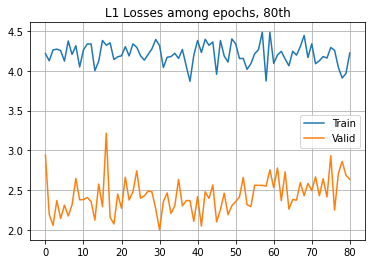

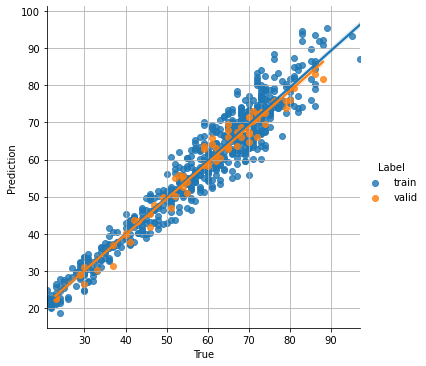

FOLD 8
EPOCHS 81
RMSE :: [TRAIN] 4.517 | [VALID] 3.150
CORR :: [TRAIN] 0.963 | [VALID] 0.983
FOLD 8
EPOCHS 82
RMSE :: [TRAIN] 4.112 | [VALID] 2.743
CORR :: [TRAIN] 0.969 | [VALID] 0.986
FOLD 8
EPOCHS 83
RMSE :: [TRAIN] 3.903 | [VALID] 2.573
CORR :: [TRAIN] 0.972 | [VALID] 0.985
FOLD 8
EPOCHS 84
RMSE :: [TRAIN] 4.324 | [VALID] 2.912
CORR :: [TRAIN] 0.965 | [VALID] 0.987


In [ ]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []
for fold in folds:
    
    train_dset = MyDataset(task_type='age', fold=fold)
    test_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    trn_losses, tst_losses = [], []
    for e in epochs:

        # TRAIN
        trn_bth_loss = 0
        trn_trues, trn_preds = [], []
        model.train()
        for i, (x, y) in enumerate(train_loader):

            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            y_pred = model.forward(x).to(device)

            trn_trues.append(y.to('cpu'))
            trn_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            loss.backward()
            optimizer.step()
            if scheduler: scheduler.step()

            trn_bth_loss += loss.item()

        torch.cuda.empty_cache()

        ### loss
        trn_losses.append(trn_bth_loss / len(train_loader))

        ### collect trues/predictions
        trn_trues = list(chain(*trn_trues))
        trn_preds = list(chain(*trn_preds))


        # TEST
        tst_bth_loss = 0
        model.eval()
        tst_trues, tst_preds = [], []
        with torch.no_grad(): # to not give loads on GPU... :(
            for i, (x, y) in enumerate(test_loader):
                if resize:
                    x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

                else:
                    x, y = x.to(device), y.to(device)

                y_pred = model.forward(x).to(device)

                tst_trues.append(y.to('cpu'))
                tst_preds.append(y_pred.to('cpu'))

                loss = loss_fn(y_pred.squeeze(1), y)
                del x, y, y_pred

                tst_bth_loss += loss.item()

        torch.cuda.empty_cache()
        ### loss
        tst_losses.append(tst_bth_loss / len(test_loader))

        ### collect trues/predictions
        tst_trues = list(chain(*tst_trues))
        tst_preds = list(chain(*tst_preds))

        reg_df = pd.DataFrame({
            'True': list(map(float, trn_trues + tst_trues)),
            'Prediction': list(map(float, trn_preds + tst_preds)),
            'Label': ['train'] * len(trn_trues) + ['valid'] * len(tst_trues)
        })

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        tst_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        print(f'FOLD {fold}')
        print(f'EPOCHS {e}')
        print(f'RMSE :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
        print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')

        if e % 10 == 0:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(tst_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold_losses.append(trn_losses)
    trn_fold_corrs.append(trn_corr)
    tst_fold_losses.append(tst_losses)
    tst_fold_corrs.append(tst_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    tst_bth_loss = 0
    model.eval()
    tst_trues, tst_preds = [], []
    with torch.no_grad(): # to not give loads on GPU... :(
        for i, (x, y) in enumerate(test_loader):
            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            y_pred = model.forward(x).to(device)

            tst_trues.append(y.to('cpu'))
            tst_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            tst_bth_loss += loss.item()

    torch.cuda.empty_cache()
    ### loss
    tst_loss = tst_bth_loss / len(test_loader)

    ### collect trues/predictions
    tst_trues = list(chain(*tst_trues))
    tst_preds = list(chain(*tst_preds))
    
    tst_df = pd.DataFrame({
        'True': list(map(float, tst_trues)),
        'Prediction': list(map(float, tst_preds)),
        'Label': ['test'] * len(tst_trues)
    })
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    print(f'FOLD {fold}')
    print(f'RMSE :: [TEST] {tst_loss:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()

In [ ]:
trn_fold_losses_np = np.array(trn_fold_losses)
tst_fold_losses_np = np.array(tst_fold_losses)

trn_loss_avg = np.average(trn_fold_losses_np, axis=0)
trn_loss_std = np.std(trn_fold_losses_np, axis=0)

tst_loss_avg = np.average(tst_fold_losses_np, axis=0)
tst_loss_std = np.std(tst_fold_losses_np, axis=0)

plt.figure(figsize=(7, 4))
plt.title('Train/Valid Loss Among Epochs 100, Fold 10')
9
plt.plot(trn_loss_avg, label='Train')
plt.fill_between(range(100), trn_loss_avg-trn_loss_std, trn_loss_avg+trn_loss_std, alpha=.2)
plt.plot(tst_loss_avg, label='Valid')
plt.fill_between(range(100), tst_loss_avg-trn_loss_std, tst_loss_avg+trn_loss_std, alpha=.2)

plt.xlabel('Epochs')
plt.ylabel('RMSE loss')

plt.legend()
plt.ylim(0, 5)
plt.grid()

In [ ]:
trn_fold_corrs_np = np.array(trn_fold_corrs)
tst_fold_corrs_np = np.array(tst_fold_corrs)

trn_corr_avg = np.average(trn_fold_corrs_np, axis=0)
trn_corr_std = np.std(trn_fold_corrs_np, axis=0)

tst_corr_avg = np.average(tst_fold_corrs_np, axis=0)
tst_corr_std = np.std(tst_fold_corrs_np, axis=0)

plt.figure(figsize=(7, 4))
plt.title('Train/Valid Correlations Among Epochs 100, Fold 10')

plt.plot(trn_corr_avg, label='Train')
# plt.fill_between(range(100), trn_corr_avg-trn_corr_std, trn_corr_avg+trn_corr_std, alpha=.2)
plt.plot(tst_corr_avg, label='Valid')
# plt.fill_between(range(100), tst_corr_avg-trn_corr_std, tst_corr_avg+trn_corr_std, alpha=.2)

plt.xlabel('Epochs')
plt.ylabel('Pearson Correlation')

plt.legend()
plt.ylim(0.8, 1.2)
plt.grid()

In [ ]:
# trn_losses, tst_losses = [], []
# best_loss = 10

# for e in range(300):

#     # TRAIN
#     trn_bth_loss = 0
#     trn_trues, trn_preds = [], []
#     model.train()
#     for i, (x, y) in enumerate(train_loader):

#         if resize:
#             x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#         else:
#             x, y = x.to(device), y.to(device)

#         optimizer.zero_grad()

#         y_pred = model.forward(x).to(device)

#         trn_trues.append(y.to('cpu'))
#         trn_preds.append(y_pred.to('cpu'))

#         loss = torch.sqrt(loss_fn(y_pred.squeeze(1), y)) # <- for MSE -> RMSE
# #         loss = loss_fn(y_pred.squeeze(1), y)
#         del x, y, y_pred

#         loss.backward()
#         optimizer.step()
#         if scheduler: scheduler.step()

#         trn_bth_loss += loss.item()

#     torch.cuda.empty_cache()
    
#     ### loss
#     trn_losses.append(trn_bth_loss / len(train_loader))

#     ### collect trues/predictions
#     trn_trues = list(chain(*trn_trues))
#     trn_preds = list(chain(*trn_preds))

        
#     # TEST
#     tst_bth_loss = 0
#     model.eval()
#     tst_trues, tst_preds = [], []
#     with torch.no_grad(): # to not give loads on GPU... :(
#         for i, (x, y) in enumerate(test_loader):
#             if resize:
#                 x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#             else:
#                 x, y = x.to(device), y.to(device)

#             y_pred = model.forward(x).to(device)

#             tst_trues.append(y.to('cpu'))
#             tst_preds.append(y_pred.to('cpu'))

#             loss = torch.sqrt(loss_fn(y_pred.squeeze(1), y)) # <- for MSE -> RMSE
# #             loss = loss_fn(y_pred.squeeze(1), y)
#             del x, y, y_pred

#             tst_bth_loss += loss.item()

#     torch.cuda.empty_cache()
#     ### loss
#     tst_losses.append(tst_bth_loss / len(test_loader))

#     ### collect trues/predictions
#     tst_trues = list(chain(*tst_trues))
#     tst_preds = list(chain(*tst_preds))
    
#     reg_df = pd.DataFrame({
#         'True': list(map(float, trn_trues + tst_trues)),
#         'Prediction': list(map(float, trn_preds + tst_preds)),
#         'Label': ['train'] * len(trn_trues) + ['test'] * len(tst_trues)
#     })
    
#     trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
#     tst_corr = reg_df[reg_df['Label'] == 'test' ].corr().Prediction['True']

#     print(f'EPOCHS {e}')
#     print(f'RMSE :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
#     print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')
    
#     sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
#     plt.grid()
#     plt.show()
    
#     if best_loss - .02 > tst_losses[-1]:
        
#         date = f'{datetime.now().strftime("%Y-%m-%d_%H%M")}'
#         fname = f"./models/{date}_{tst_losses[-1]:.3f}_model.pth"
#         torch.save(model, fname)
#         best_loss = min(tst_losses[-1], best_loss)
        
#     summary.add_scalars('loss/RMSE_loss',
#                          {'Train Loss': trn_losses[-1],
#                           'Valid Loss': tst_losses[-1]}, e)
#     summary.add_scalars('corr',
#                        {'Train Correlation': trn_corr,
#                         'Valid Correlation': tst_corr,
#                         'Total Correlation': reg_df.corr().Prediction['True']}, e)
    
#     if e % 20 == 0:
#         plt.plot(trn_losses, label='Train')
#         plt.plot(tst_losses, label='Valid')
#         plt.title(f"L1 Losses among epochs, {e}th")
#         #plt.ylim(0, 500)
#         plt.grid()
#         plt.legend()

In [ ]:
# %load ../2d_slice/src/slice_viewer.py

In [ ]:
# SliceViewer(np.array(train_dset[0][0][0])).triple_view()